In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from itertools import combinations

In [2]:
df = pd.read_csv('heart_disease.csv')
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  
0      18.0      15.0       1.0  0.0   9.0        4.0     3.0  
1       0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2      30.0      30.0       1.0  0.0   9.0        4.0     8.0  
3       0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4       3.0       0.0       0.0  0.0  11.0        5.0     4.0  

[5 rows x 22 columns]

In [3]:
# Iterate over columns of DataFrame
for col in df.columns:
    # Convert float values to integers using round() function
    df[col] = df[col].apply(lambda x: round(x))
    
df.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                     0       1         1          1   40       1       0   
1                     0       0         0          0   25       1       0   
2                     0       1         1          1   28       0       0   
3                     0       1         0          1   27       0       0   
4                     0       1         1          1   24       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  
0        18        15         1    0    9          4       3  
1         0         0         0    0    7          6       1  
2        30        30         1    0    9          4       8  
3         0         0         0    0   11          3       6  
4         3         0         0    0   11          5       4  

[5 rows x 22 columns]

In [4]:
df_copy = df.copy()

# define the bin edges and labels
bins = [0, 18.5, 24.9, 29.9, float("inf")]
labels = [1, 2, 3, 4]

menbins = [0, 1, 7, 14, 21, float('inf')]
menlabs = [0, 1, 2, 3, 4]

phybins = [0, 1, 7, 14, 21, float('inf')]
phylabs = [0, 1, 2, 3, 4]

# categorize the BMI column into 4 levels
df_copy["BMI"] = pd.cut(df_copy["BMI"], bins=bins, labels=labels)
df_copy["MentHlth"] = pd.cut(df_copy["MentHlth"], bins=menbins, labels=menlabs, include_lowest=True)
df_copy["PhysHlth"] = pd.cut(df_copy["PhysHlth"], bins=phybins, labels=phylabs, include_lowest=True)


df_copy.head()

HeartDiseaseorAttack  HighBP  HighChol  CholCheck BMI  Smoker  Stroke  \
0                     0       1         1          1   4       1       0   
1                     0       0         0          0   3       1       0   
2                     0       1         1          1   3       0       0   
3                     0       1         0          1   3       0       0   
4                     0       1         1          1   2       0       0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0         0             0       0  ...              1            0        5   
1         0             1       0  ...              0            1        3   
2         0             0       1  ...              1            1        5   
3         0             1       1  ...              1            0        2   
4         0             1       1  ...              1            0        2   

   MentHlth  PhysHlth DiffWalk Sex  Age  Education  Income  
0         3         3        1   0    9          4       3  
1         0         0        0   0    7          6       1  
2         4         4        1   0    9          4       8  
3         0         0        0   0   11          3       6  
4         1         0        0   0   11          5       4  

[5 rows x 22 columns]

In [5]:
lst_col = df_copy.drop("HeartDiseaseorAttack", axis=1).columns

data_dict = {}
for i, col1 in enumerate(lst_col[:-1]):
    for j, col2 in enumerate(lst_col[i+1:], i+1):
        col_name = f"{col1}_{col2}"
        data_dict[col_name] = [f"{x},{y}" for x, y in zip(df_copy[col1], df_copy[col2])]

n_df = pd.DataFrame(data_dict)

In [6]:
n_df.to_csv('pairs.csv', index=False)

In [97]:
n_df = pd.read_csv('pairs.csv')
n_df.columns

Index(['HighBP_HighChol', 'HighBP_CholCheck', 'HighBP_BMI', 'HighBP_Smoker',
       'HighBP_Stroke', 'HighBP_Diabetes', 'HighBP_PhysActivity',
       'HighBP_Fruits', 'HighBP_Veggies', 'HighBP_HvyAlcoholConsump',
       ...
       'DiffWalk_Sex', 'DiffWalk_Age', 'DiffWalk_Education', 'DiffWalk_Income',
       'Sex_Age', 'Sex_Education', 'Sex_Income', 'Age_Education', 'Age_Income',
       'Education_Income'],
      dtype='object', length=210)

In [7]:
n_df.head()

HighBP_HighChol HighBP_CholCheck HighBP_BMI HighBP_Smoker HighBP_Stroke  \
0             1,1              1,1        1,4           1,1           1,0   
1             0,0              0,0        0,3           0,1           0,0   
2             1,1              1,1        1,3           1,0           1,0   
3             1,0              1,1        1,3           1,0           1,0   
4             1,1              1,1        1,2           1,0           1,0   

  HighBP_Diabetes HighBP_PhysActivity HighBP_Fruits HighBP_Veggies  \
0             1,0                 1,0           1,0            1,1   
1             0,0                 0,1           0,0            0,0   
2             1,0                 1,0           1,1            1,0   
3             1,0                 1,1           1,1            1,1   
4             1,0                 1,1           1,1            1,1   

  HighBP_HvyAlcoholConsump  ... DiffWalk_Sex DiffWalk_Age DiffWalk_Education  \
0                      1,0  ...          1,0          1,9                1,4   
1                      0,0  ...          0,0          0,7                0,6   
2                      1,0  ...          1,0          1,9                1,4   
3                      1,0  ...          0,0         0,11                0,3   
4                      1,0  ...          0,0         0,11                0,5   

  DiffWalk_Income Sex_Age Sex_Education Sex_Income Age_Education Age_Income  \
0             1,3     0,9           0,4        0,3           9,4        9,3   
1             0,1     0,7           0,6        0,1           7,6        7,1   
2             1,8     0,9           0,4        0,8           9,4        9,8   
3             0,6    0,11           0,3        0,6          11,3       11,6   
4             0,4    0,11           0,5        0,4          11,5       11,4   

  Education_Income  
0              4,3  
1              6,1  
2              4,8  
3              3,6  
4              5,4  

[5 rows x 210 columns]

In [8]:
# Define custom sorting function
def custom_sort(label):
    parts = label.split(',')
    return int(parts[0]), int(parts[1])

In [63]:
table = pd.crosstab(df_age["Diabetes_Age"],df['HeartDiseaseorAttack'], normalize='index')
table

HeartDiseaseorAttack         0         1
Diabetes_Age                            
0,1                   0.995358  0.004642
0,10                  0.897510  0.102490
0,11                  0.864306  0.135694
0,12                  0.834899  0.165101
0,13                  0.785344  0.214656
0,2                   0.993922  0.006078
0,3                   0.989569  0.010431
0,4                   0.988434  0.011566
0,5                   0.982935  0.017065
0,6                   0.974444  0.025556
0,7                   0.960102  0.039898
0,8                   0.944694  0.055306
0,9                   0.923720  0.076280
1,1                   1.000000  0.000000
1,10                  0.852224  0.147776
1,11                  0.838870  0.161130
1,12                  0.775281  0.224719
1,13                  0.715232  0.284768
1,2                   0.981481  0.018519
1,3                   0.972222  0.027778
1,4                   0.971831  0.028169
1,5                   0.920245  0.079755
1,6                   0.923077  0.076923
1,7                   0.909091  0.090909
1,8                   0.883636  0.116364
1,9                   0.873219  0.126781
2,1                   0.961538  0.038462
2,10                  0.766087  0.233913
2,11                  0.720677  0.279323
2,12                  0.709080  0.290920
2,13                  0.660642  0.339358
2,2                   0.942857  0.057143
2,3                   0.961783  0.038217
2,4                   0.939297  0.060703
2,5                   0.921028  0.078972
2,6                   0.865672  0.134328
2,7                   0.845531  0.154469
2,8                   0.824068  0.175932
2,9                   0.786499  0.213501

In [64]:
indname = table.index.astype(str)
indname

Index(['0,1', '0,10', '0,11', '0,12', '0,13', '0,2', '0,3', '0,4', '0,5',
       '0,6', '0,7', '0,8', '0,9', '1,1', '1,10', '1,11', '1,12', '1,13',
       '1,2', '1,3', '1,4', '1,5', '1,6', '1,7', '1,8', '1,9', '2,1', '2,10',
       '2,11', '2,12', '2,13', '2,2', '2,3', '2,4', '2,5', '2,6', '2,7', '2,8',
       '2,9'],
      dtype='object', name='Diabetes_Age')

In [65]:
lists = [list(map(int, s.split(","))) for s in indname]

# Sort the list of lists by the first element and then the second element
sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))

# Convert the sorted list of tuples back to a list of lists
sorted_strings = [list(map(str, t)) for t in sorted_lists]

# Join each list of strings with a comma to get the final sorted list of strings
result = [",".join(s) for s in sorted_strings]

print(result)  # Output: ['0,1', '0,2', '0,3']

['0,1', '0,2', '0,3', '0,4', '0,5', '0,6', '0,7', '0,8', '0,9', '0,10', '0,11', '0,12', '0,13', '1,1', '1,2', '1,3', '1,4', '1,5', '1,6', '1,7', '1,8', '1,9', '1,10', '1,11', '1,12', '1,13', '2,1', '2,2', '2,3', '2,4', '2,5', '2,6', '2,7', '2,8', '2,9', '2,10', '2,11', '2,12', '2,13']


In [66]:
# Sort the DataFrame by the desired order of the index
sorted_table = table.reindex(result)

sorted_table.T

Diabetes_Age               0,1       0,2       0,3       0,4       0,5  \
HeartDiseaseorAttack                                                     
0                     0.995358  0.993922  0.989569  0.988434  0.982935   
1                     0.004642  0.006078  0.010431  0.011566  0.017065   

Diabetes_Age               0,6       0,7       0,8      0,9     0,10  ...  \
HeartDiseaseorAttack                                                  ...   
0                     0.974444  0.960102  0.944694  0.92372  0.89751  ...   
1                     0.025556  0.039898  0.055306  0.07628  0.10249  ...   

Diabetes_Age               2,4       2,5       2,6       2,7       2,8  \
HeartDiseaseorAttack                                                     
0                     0.939297  0.921028  0.865672  0.845531  0.824068   
1                     0.060703  0.078972  0.134328  0.154469  0.175932   

Diabetes_Age               2,9      2,10      2,11     2,12      2,13  
HeartDiseaseorAttack                                                   
0                     0.786499  0.766087  0.720677  0.70908  0.660642  
1                     0.213501  0.233913  0.279323  0.29092  0.339358  

[2 rows x 39 columns]

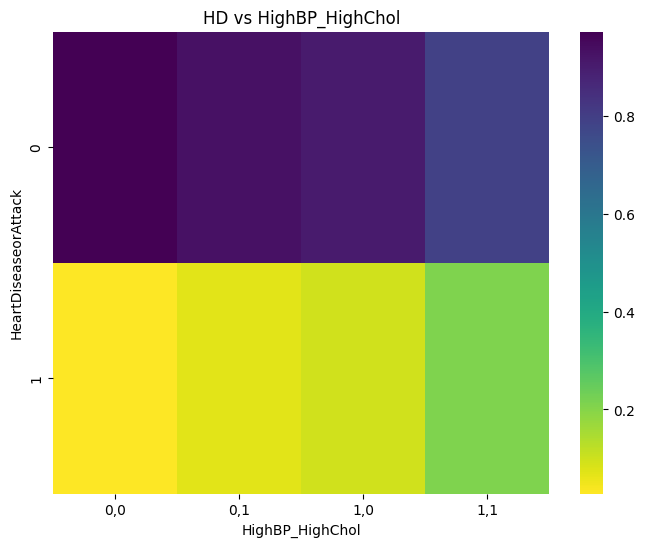

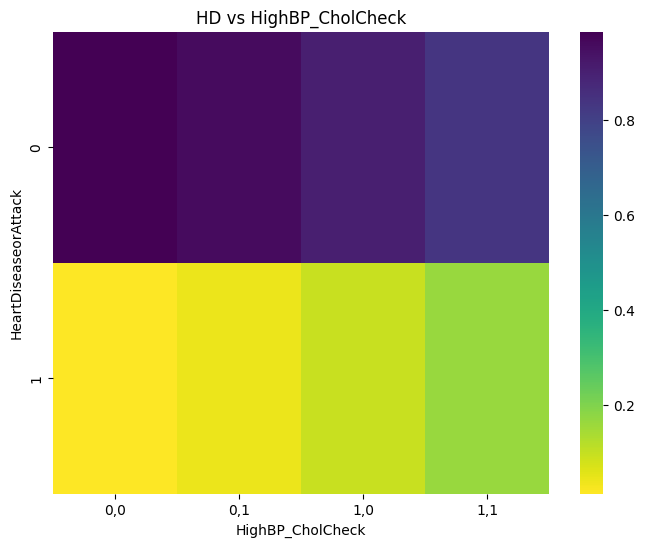

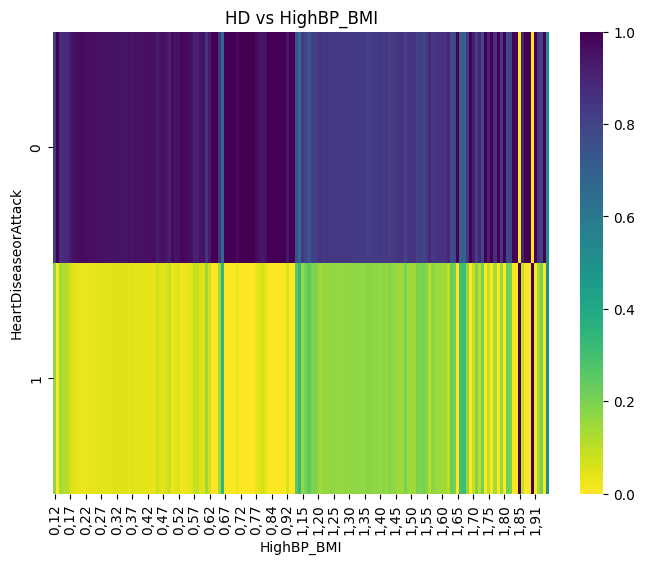

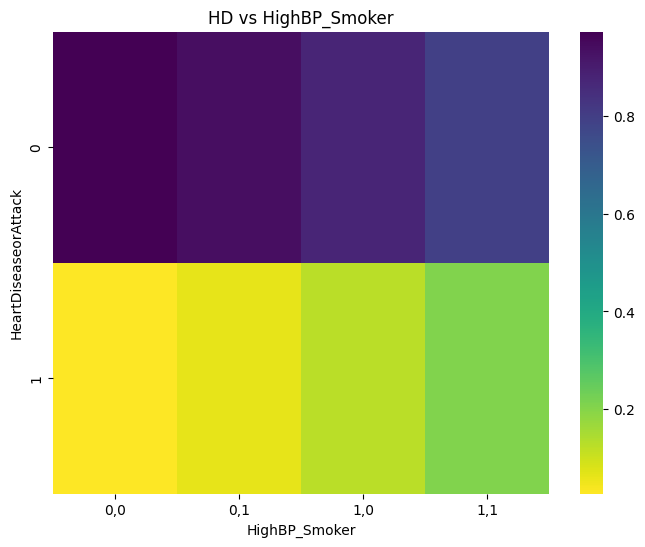

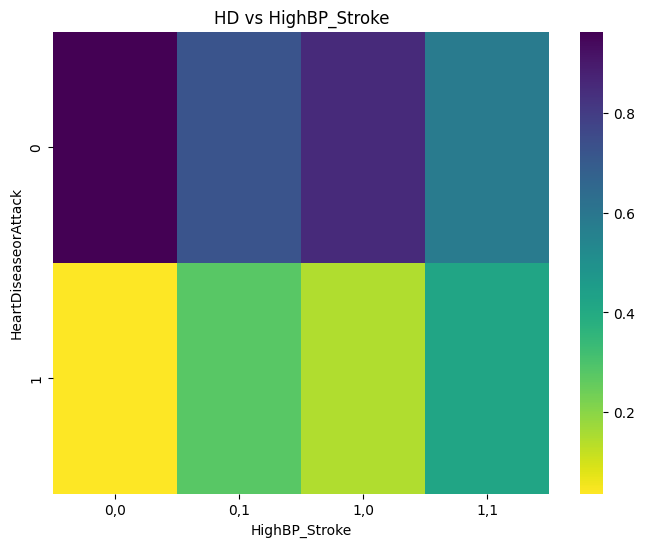

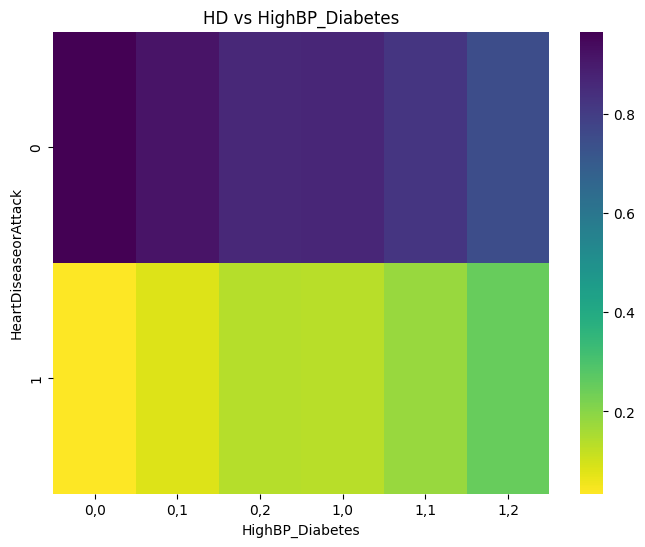

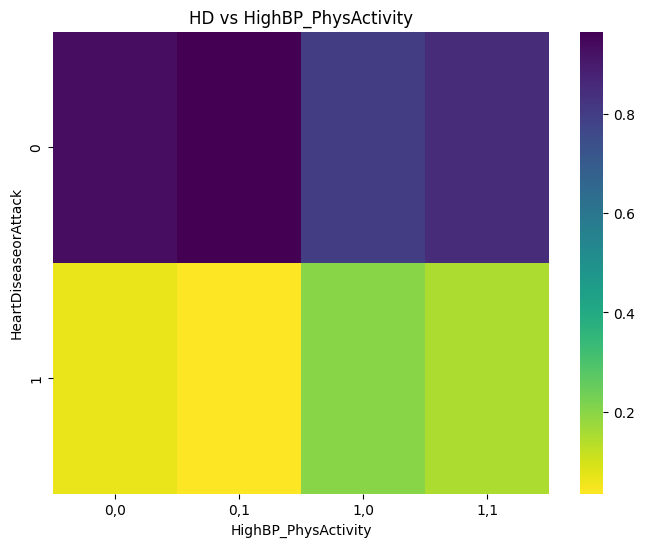

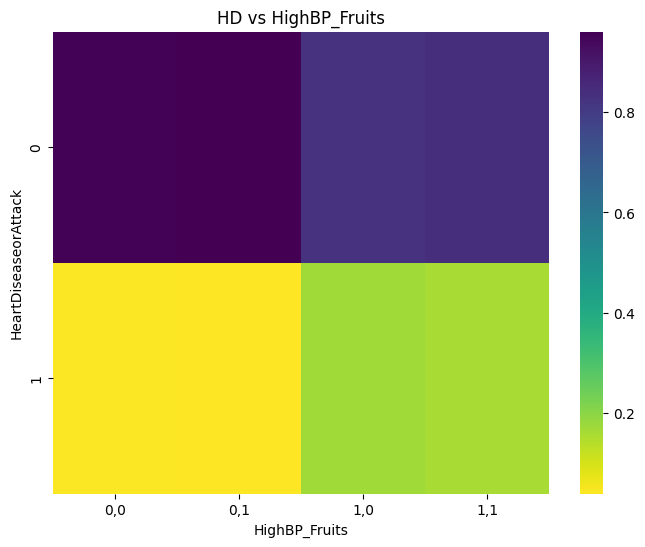

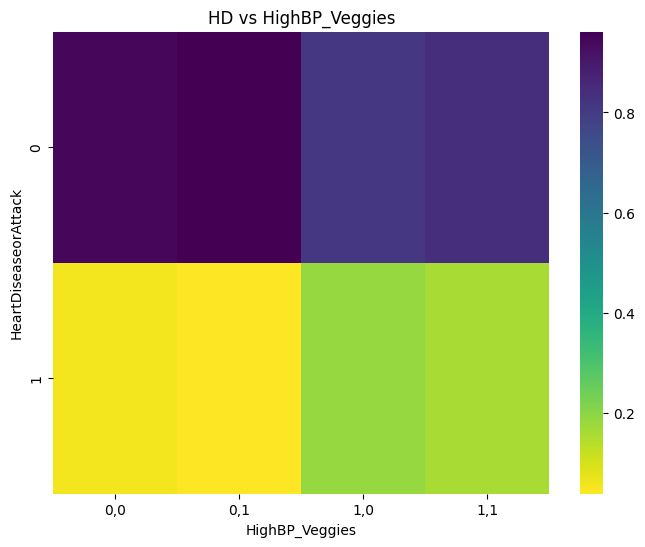

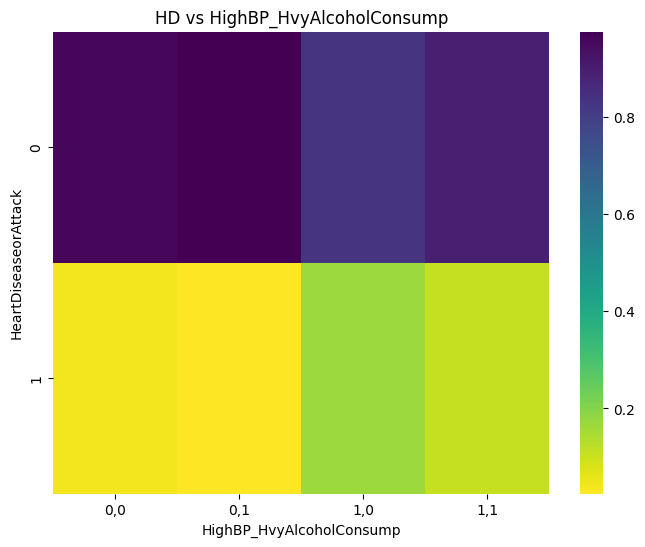

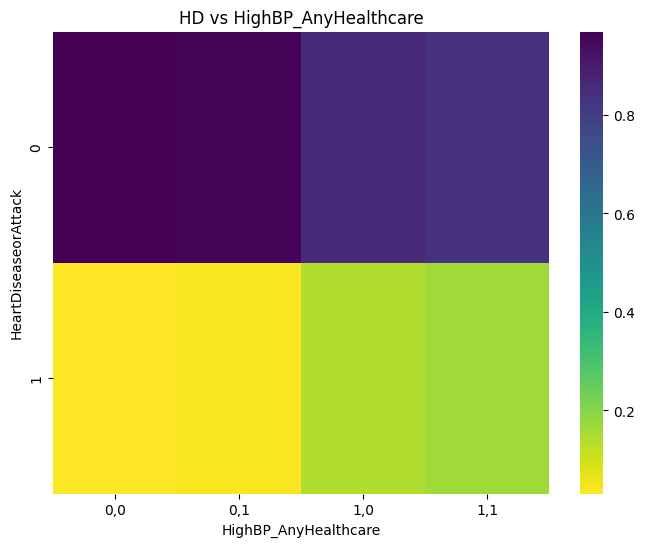

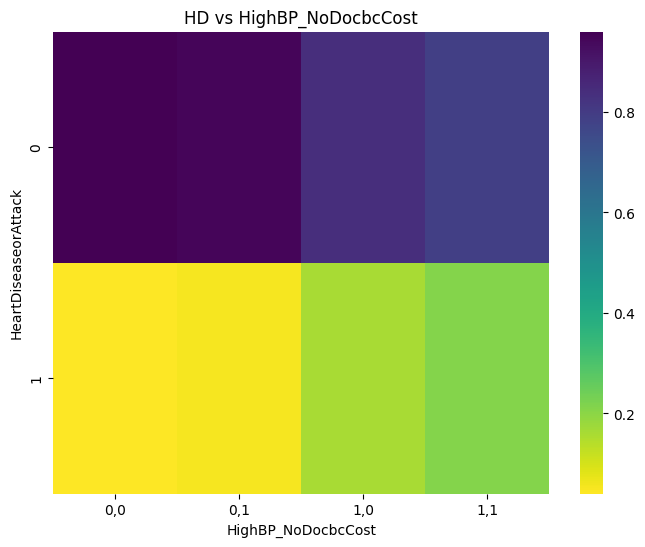

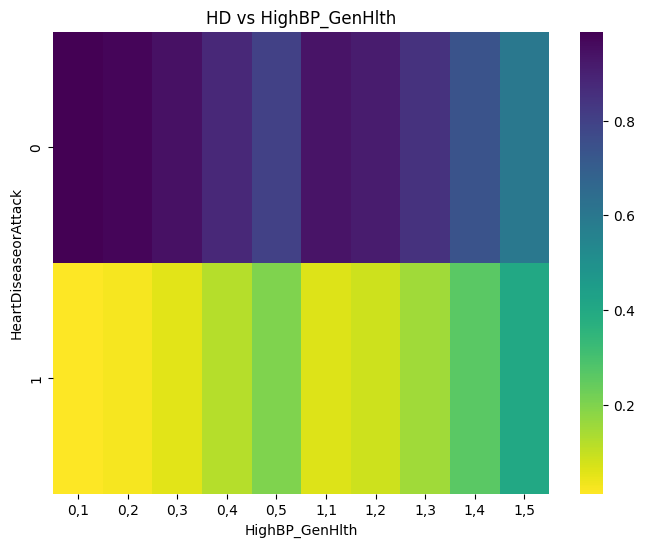

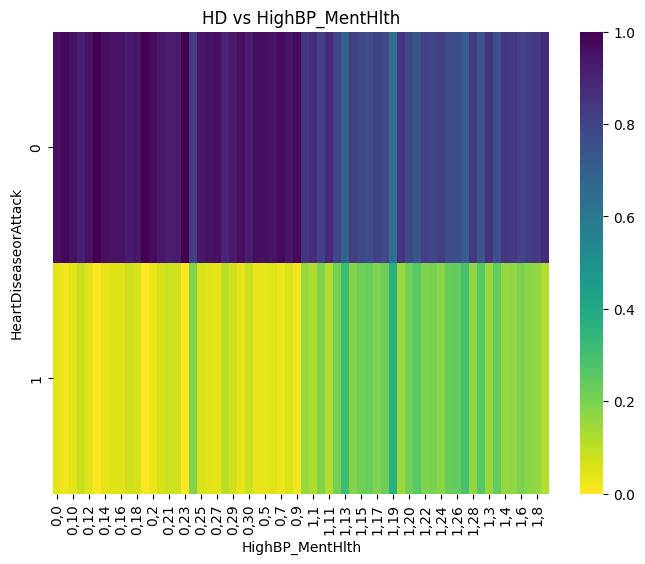

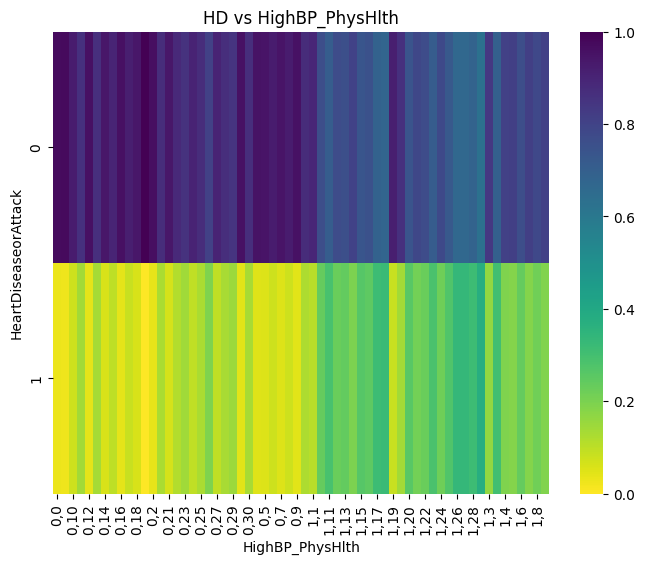

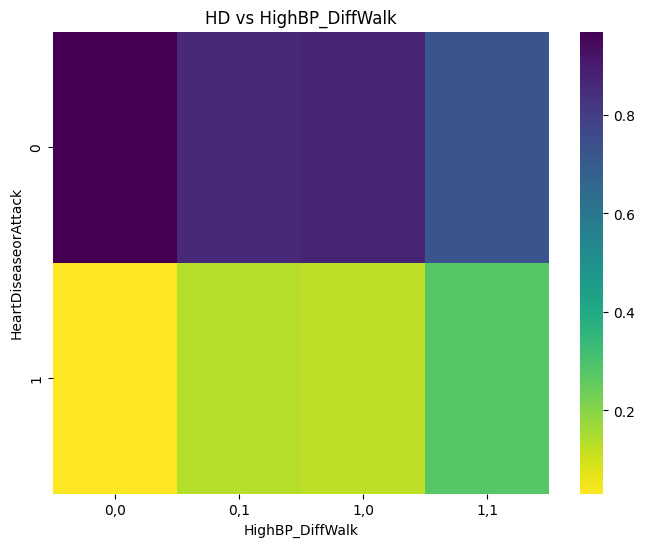

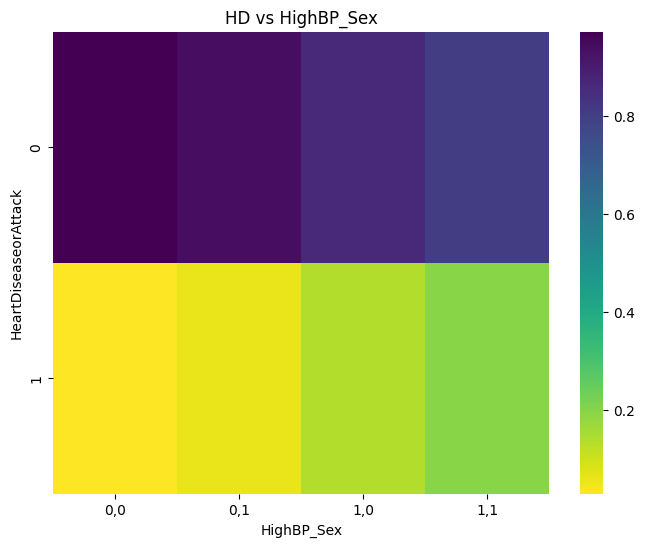

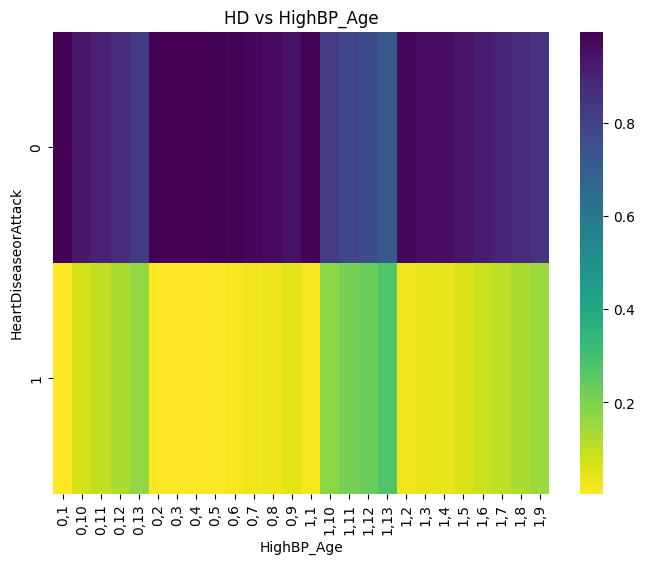

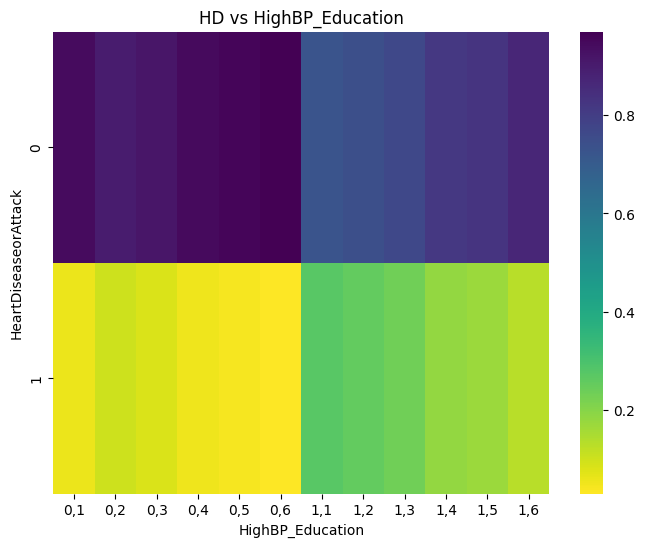

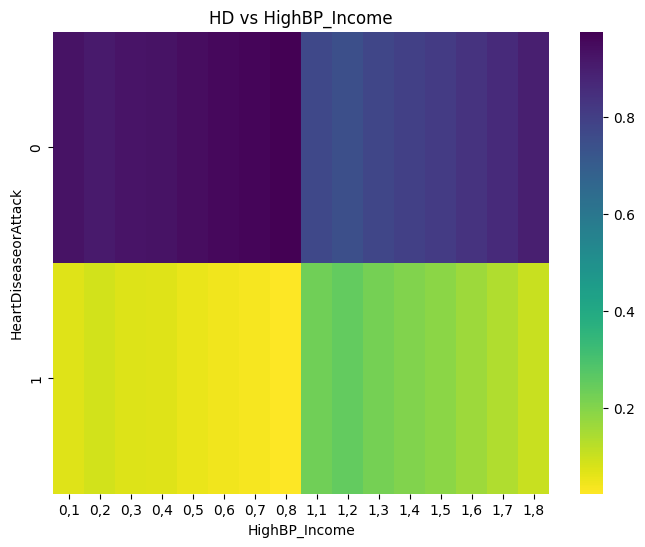

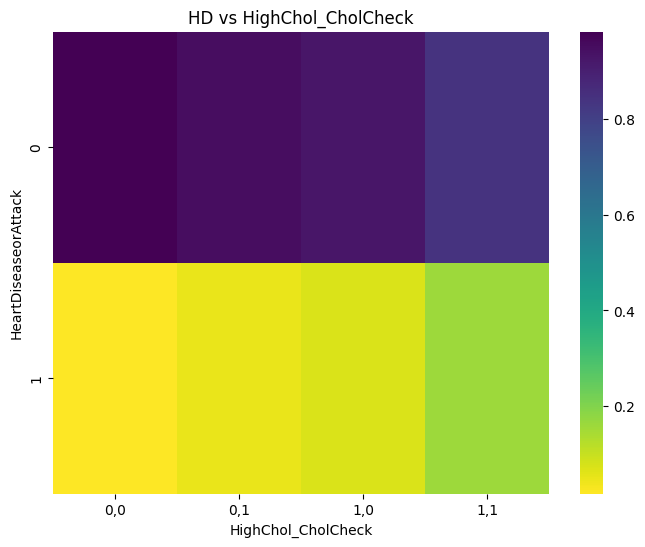

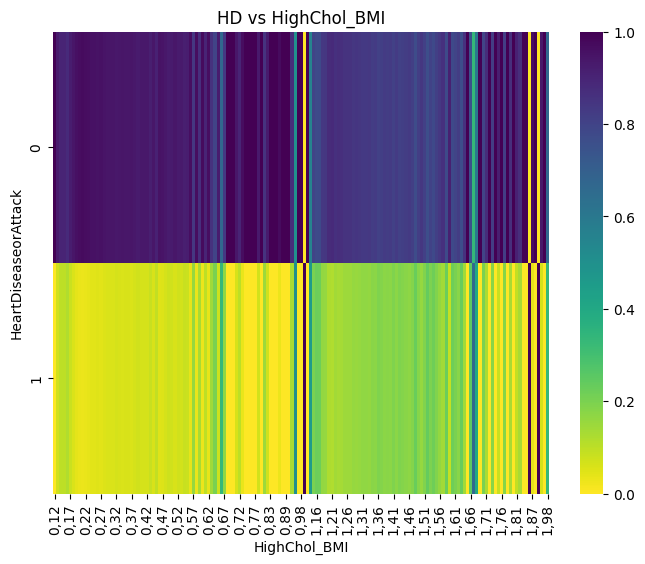

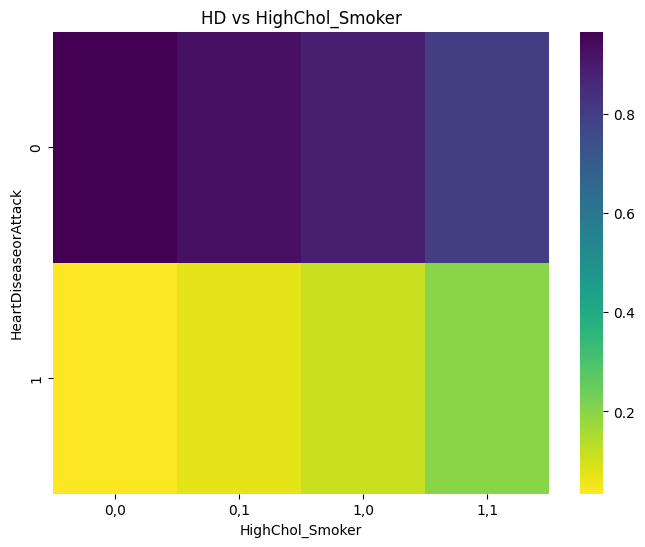

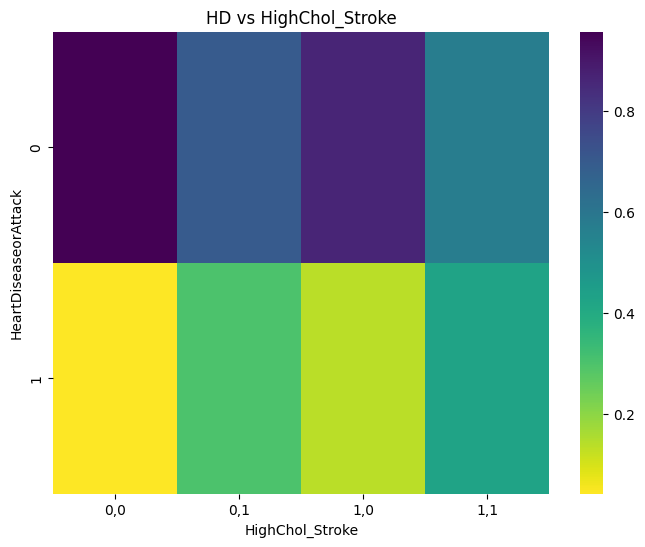

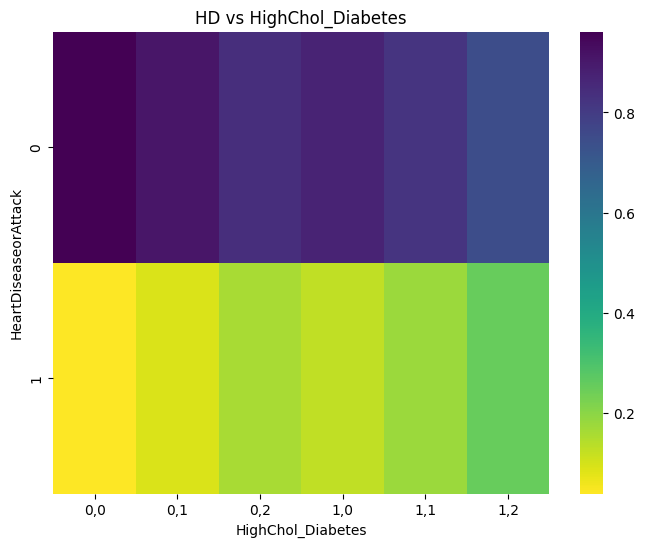

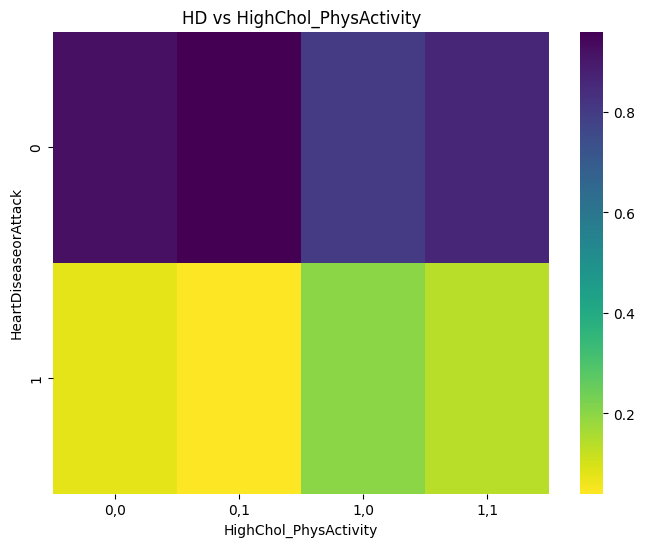

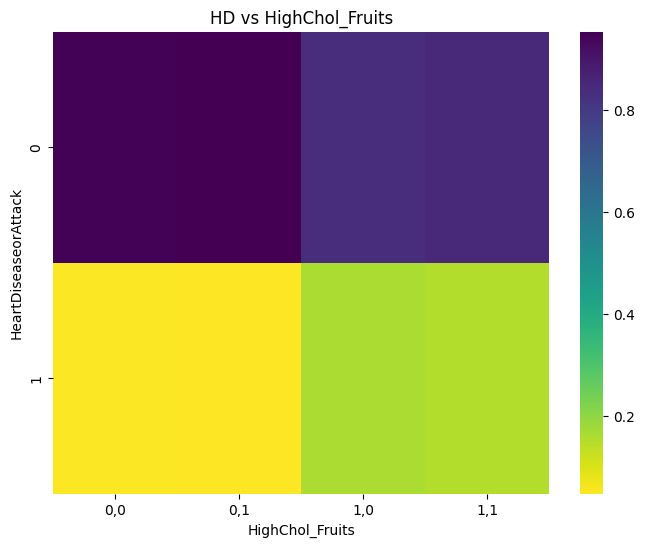

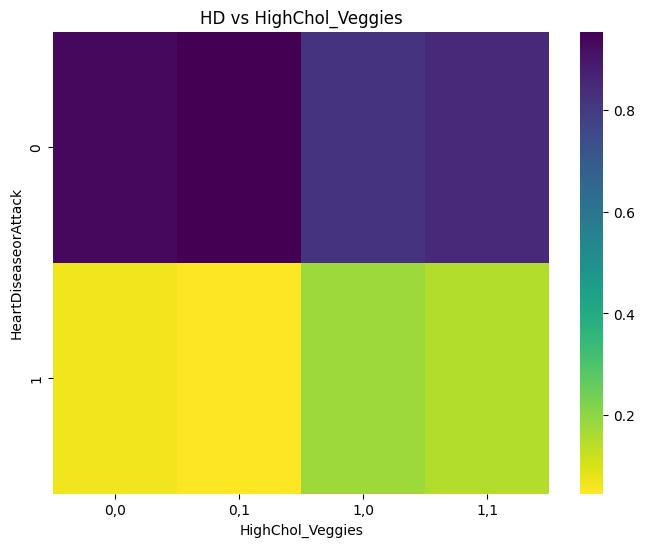

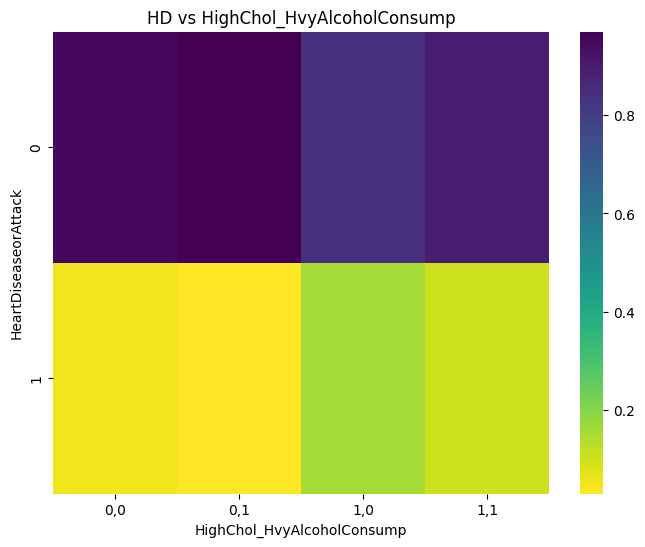

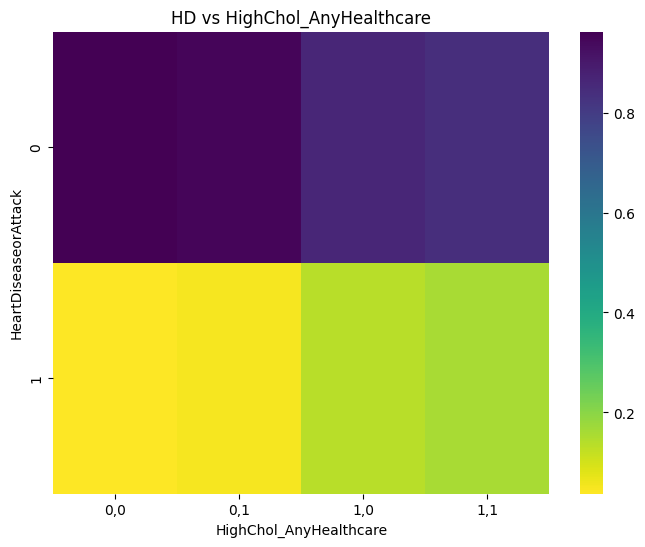

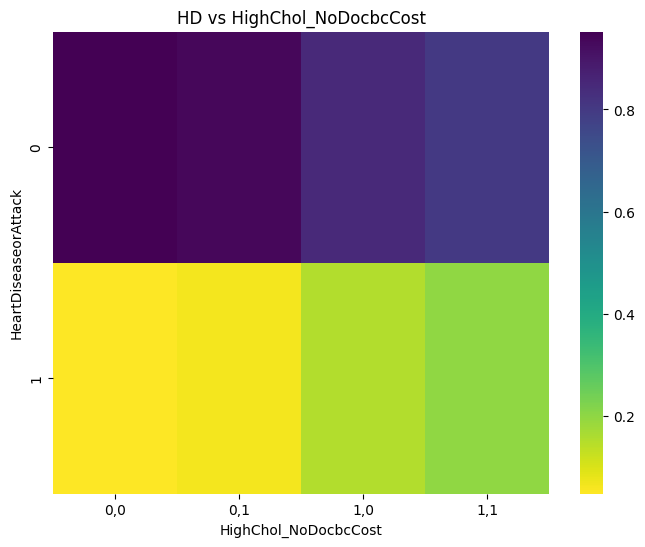

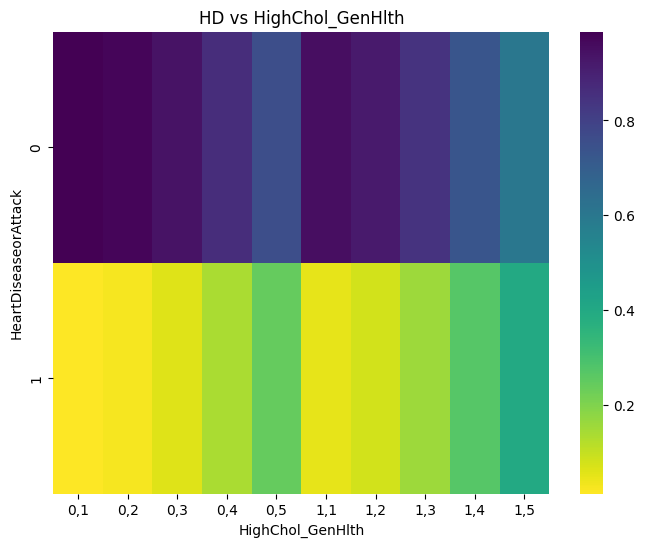

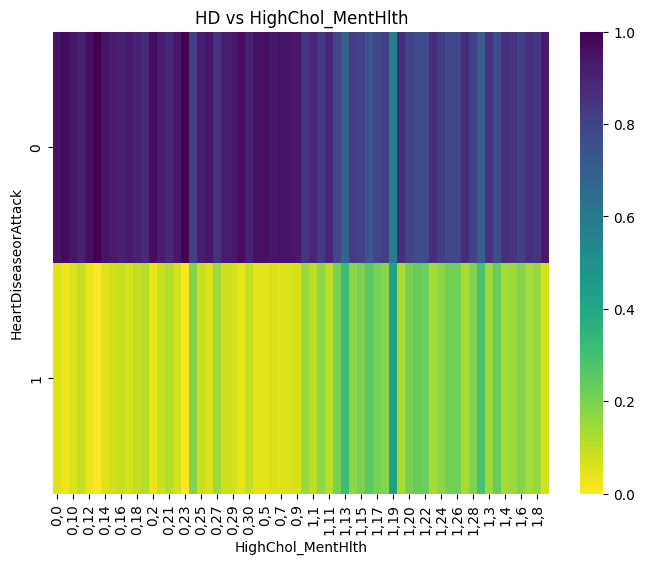

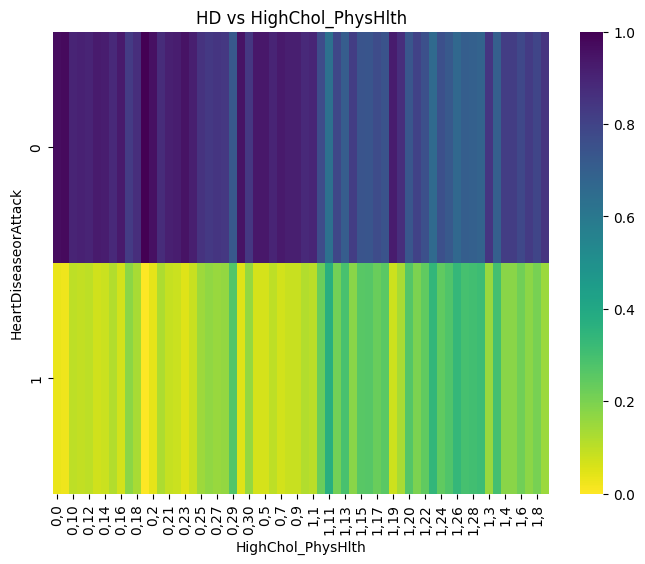

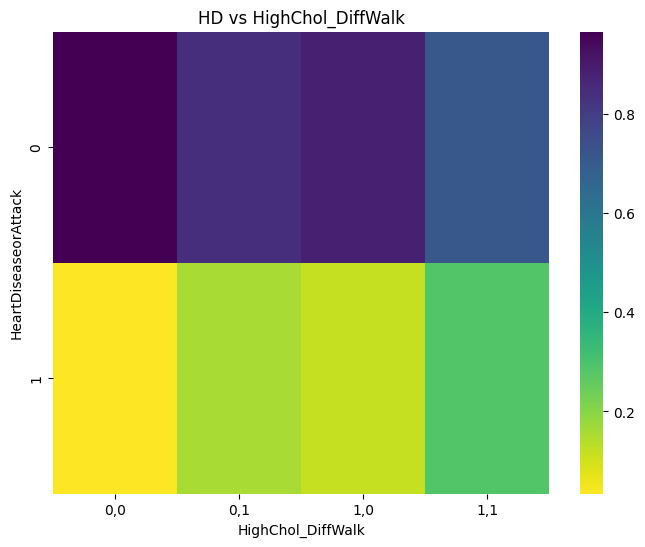

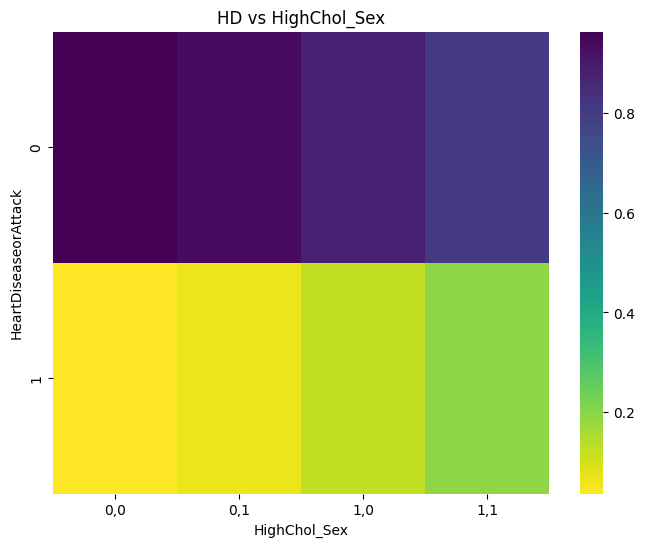

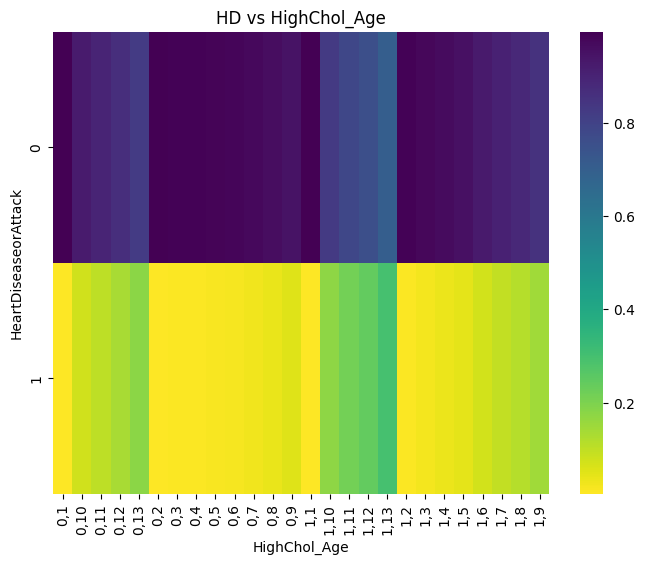

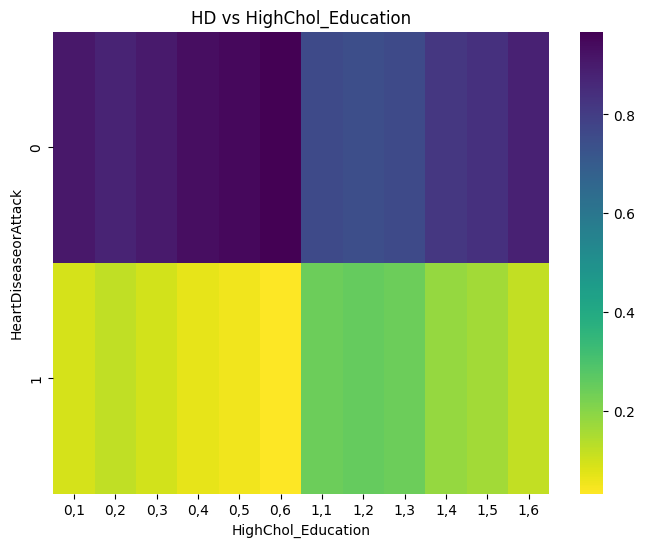

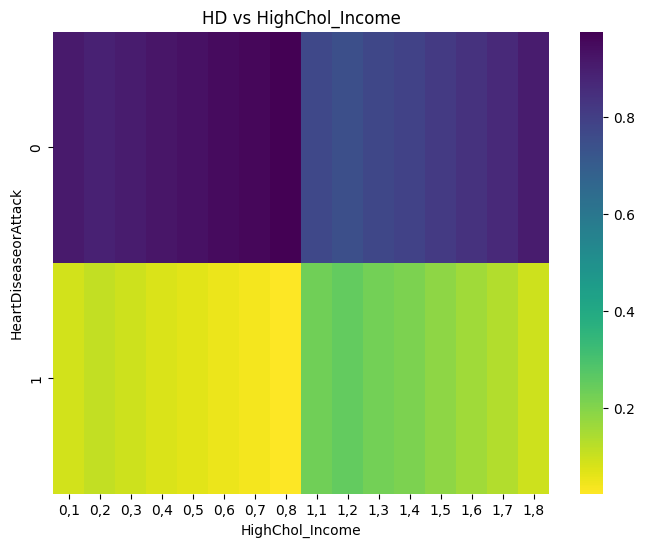

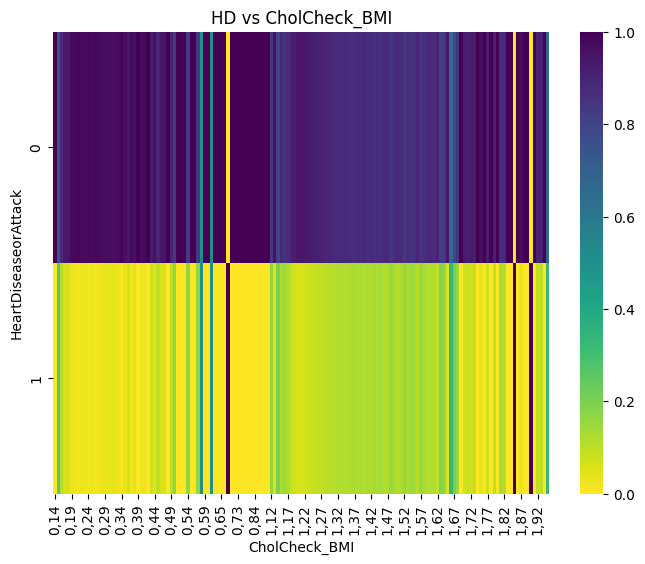

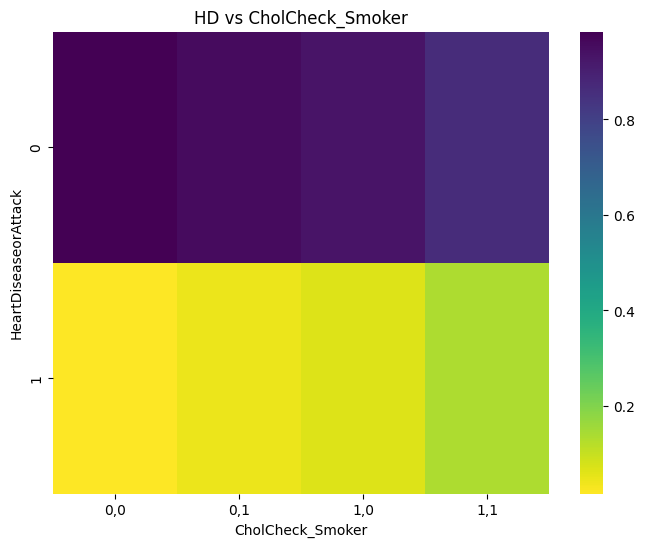

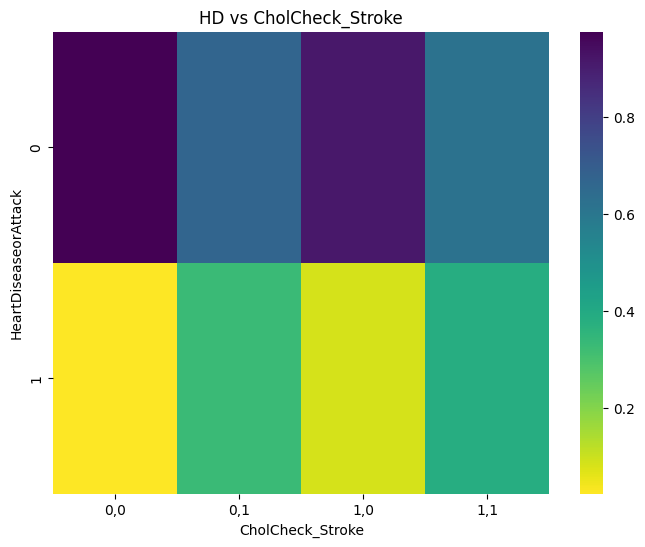

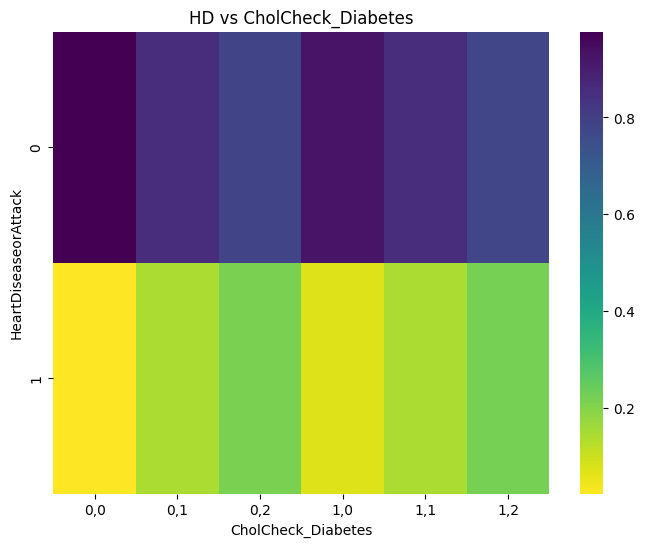

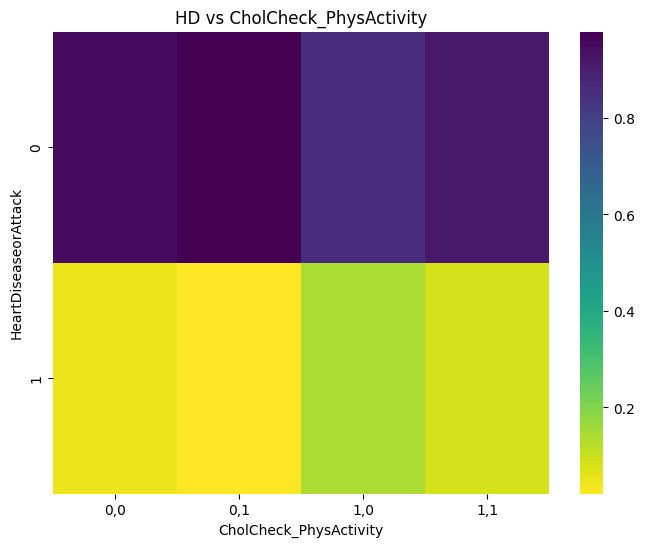

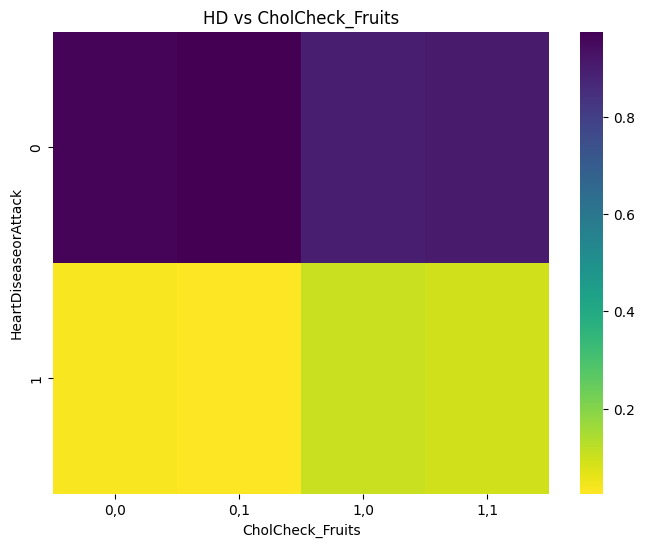

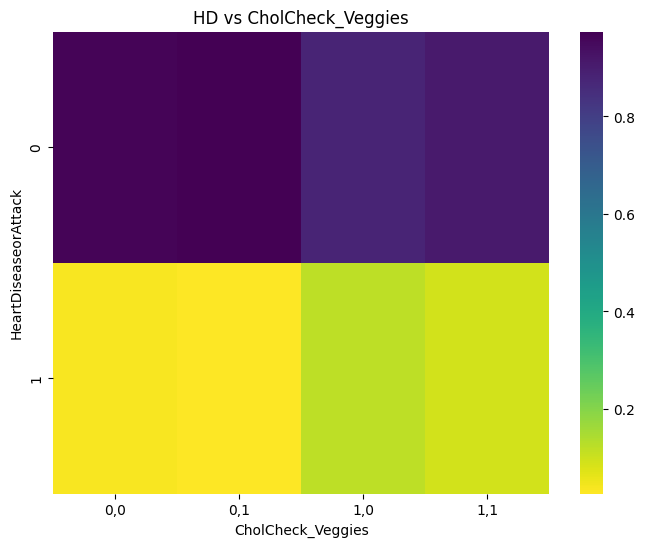

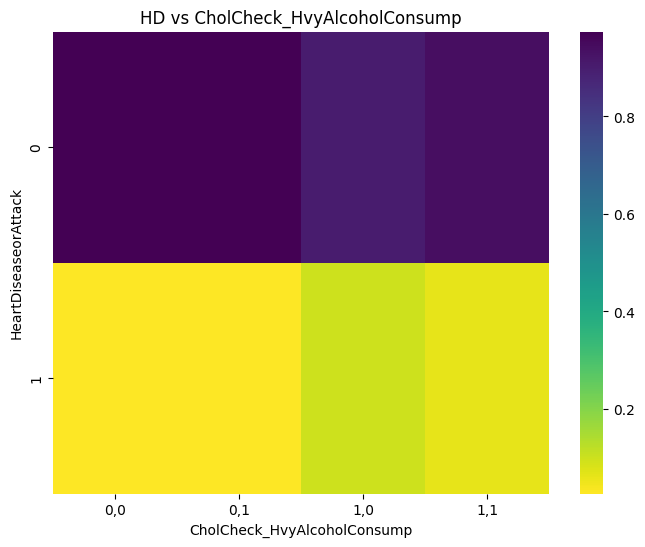

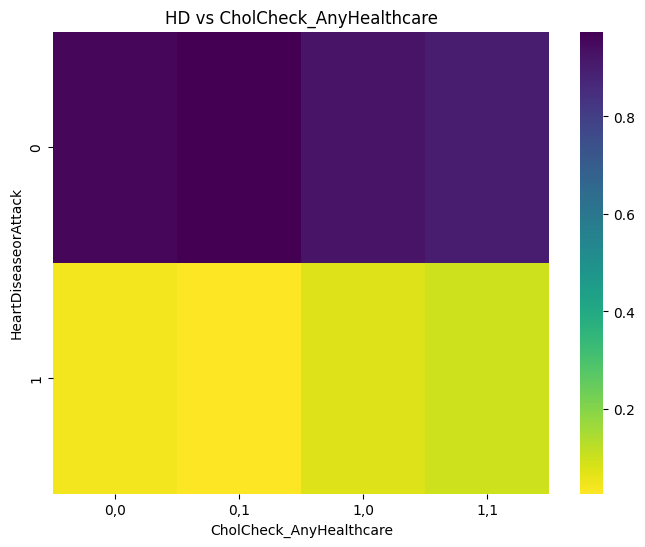

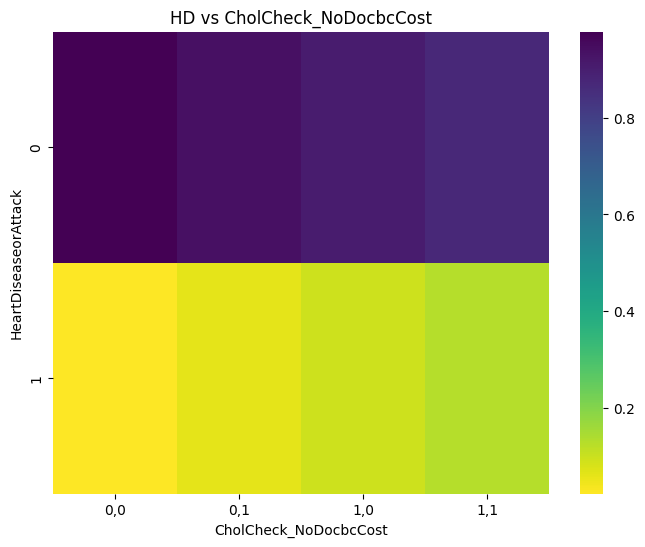

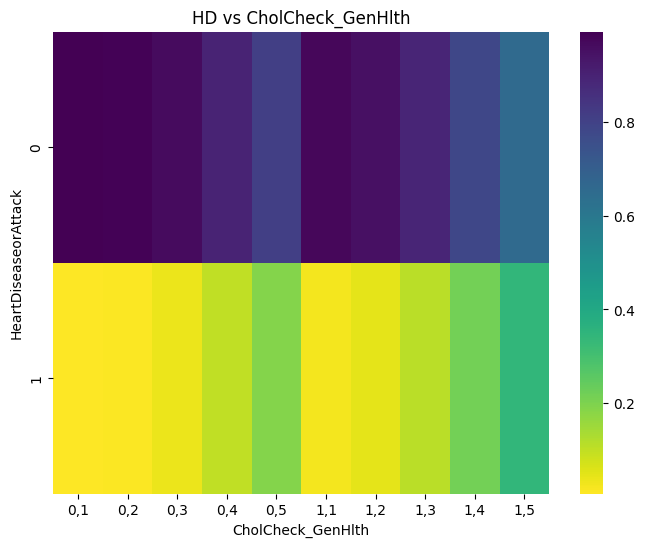

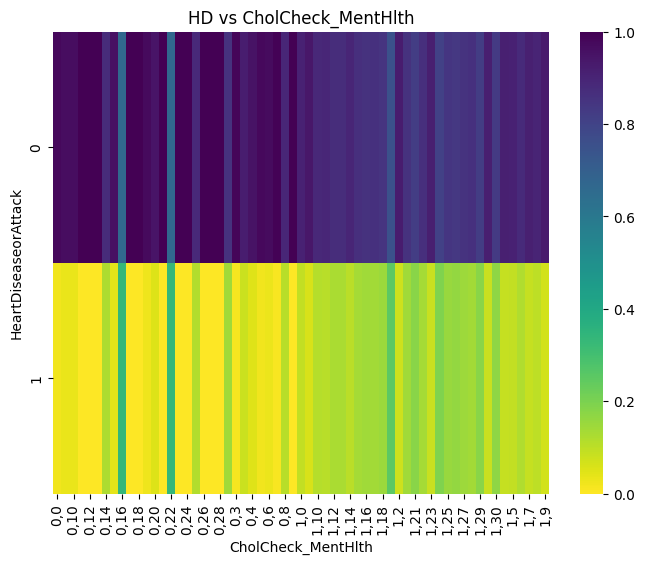

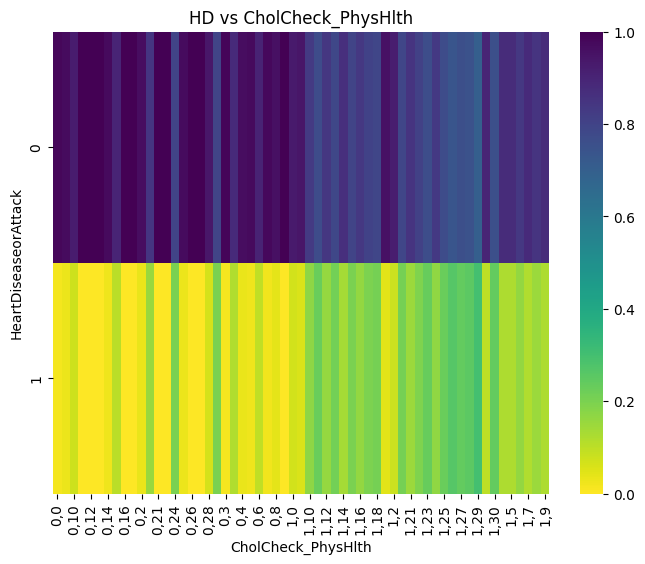

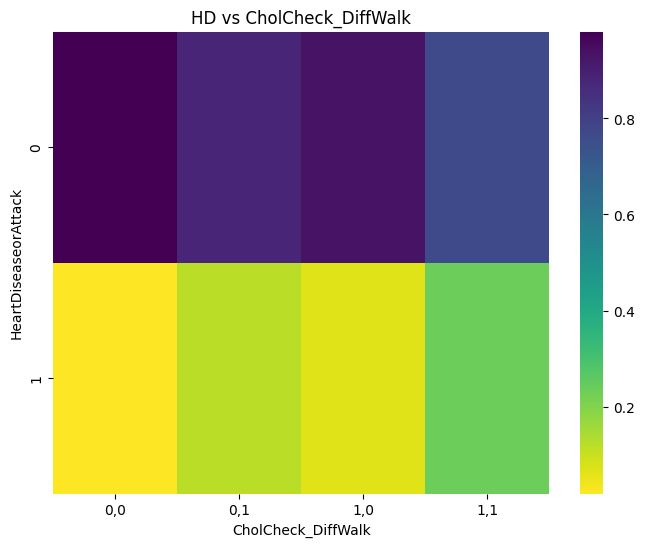

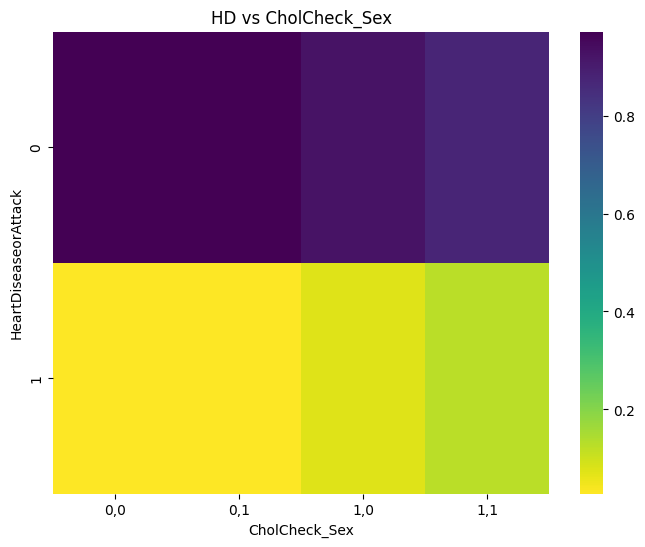

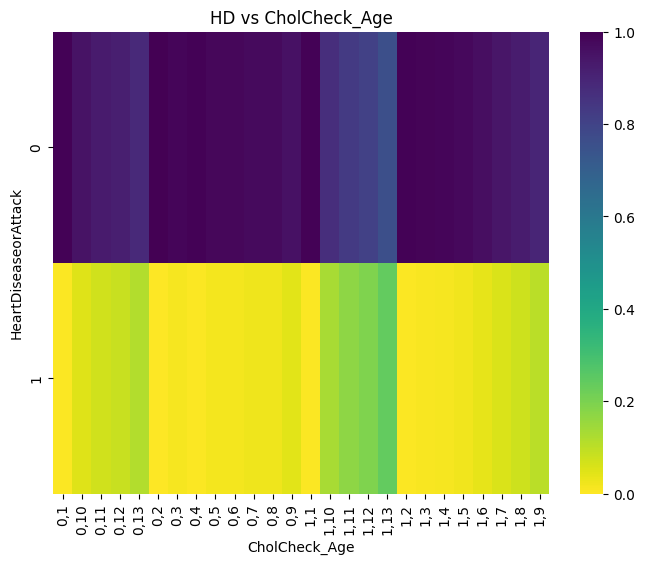

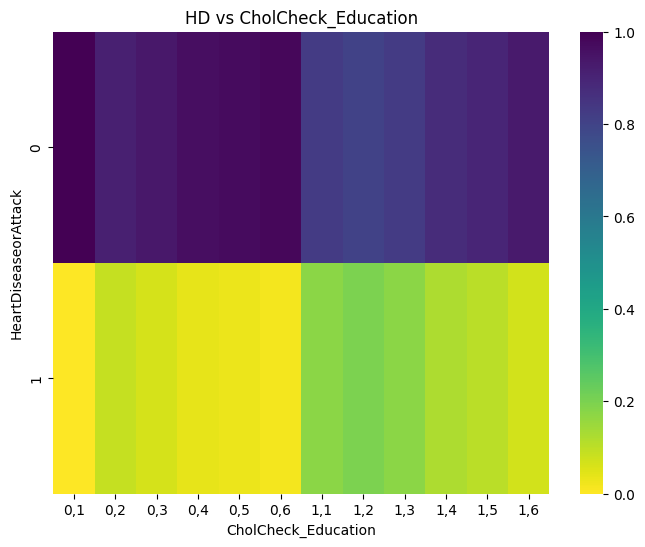

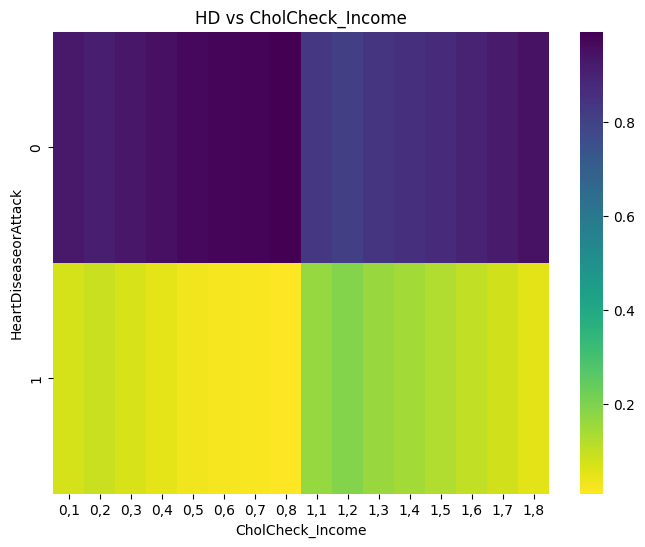

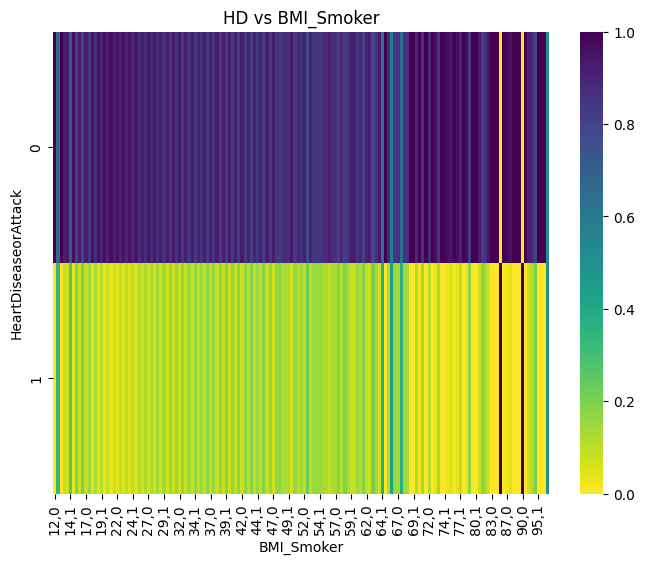

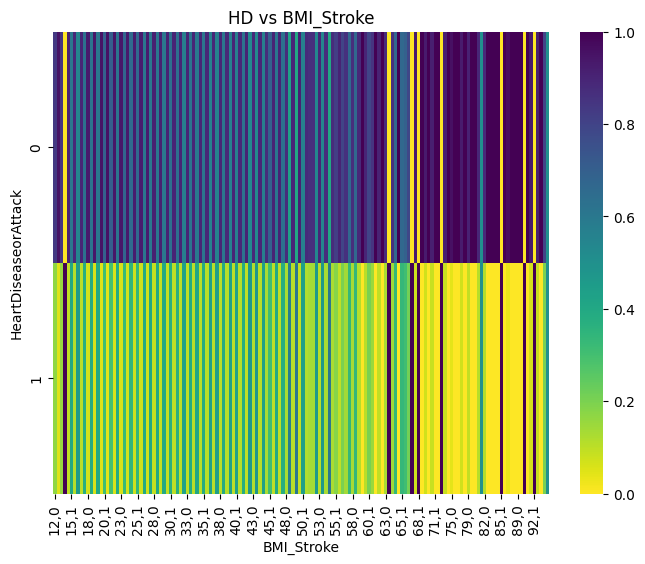

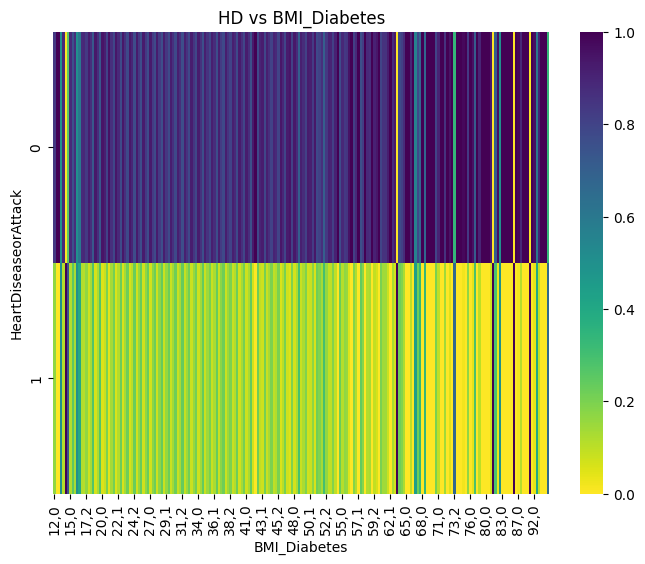

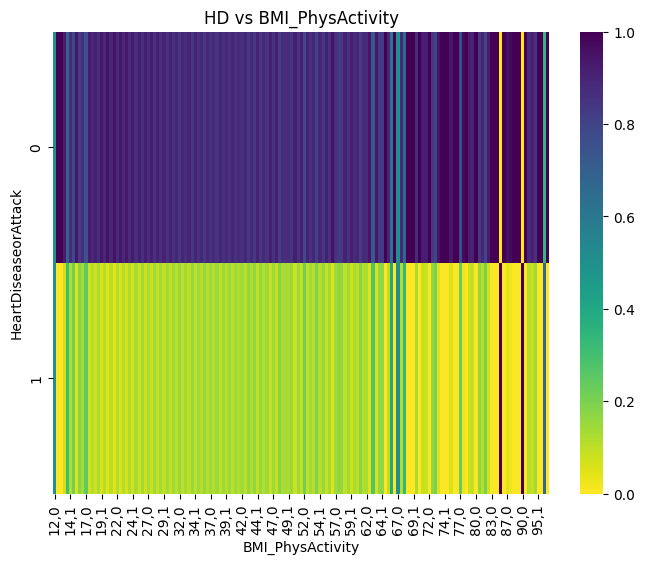

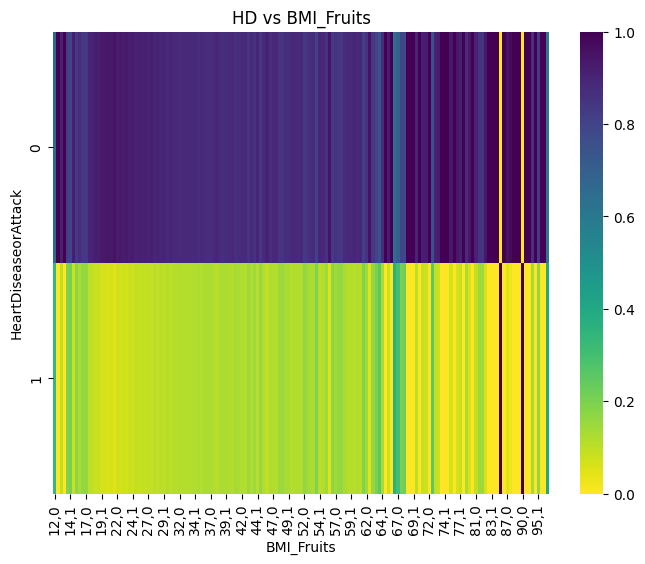

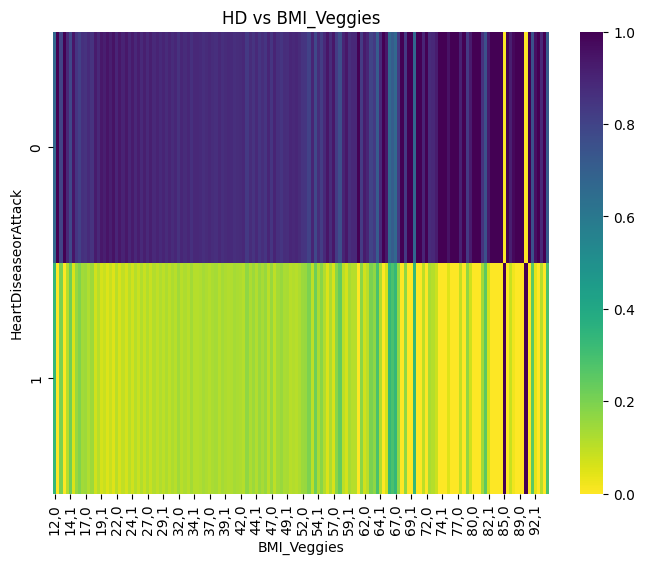

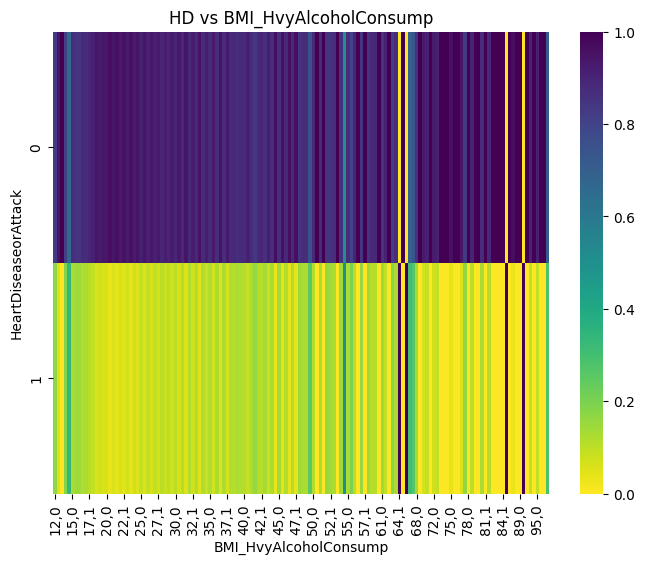

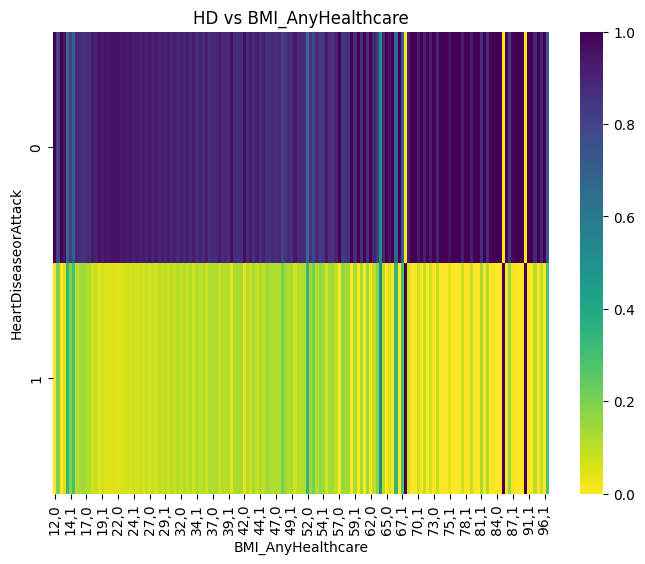

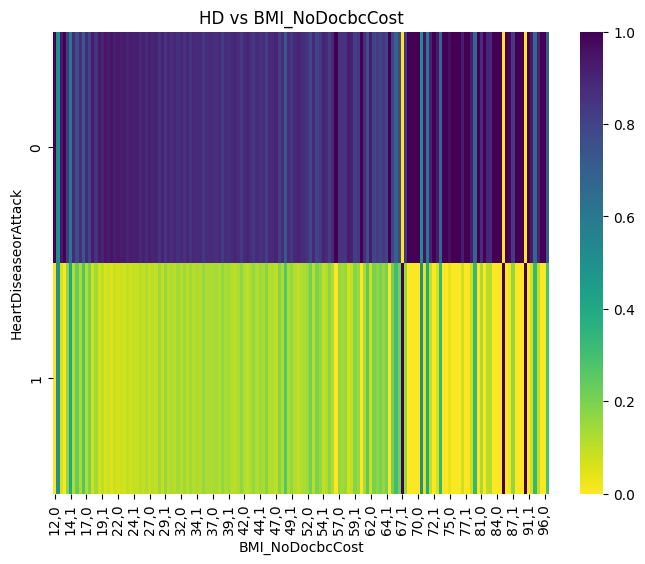

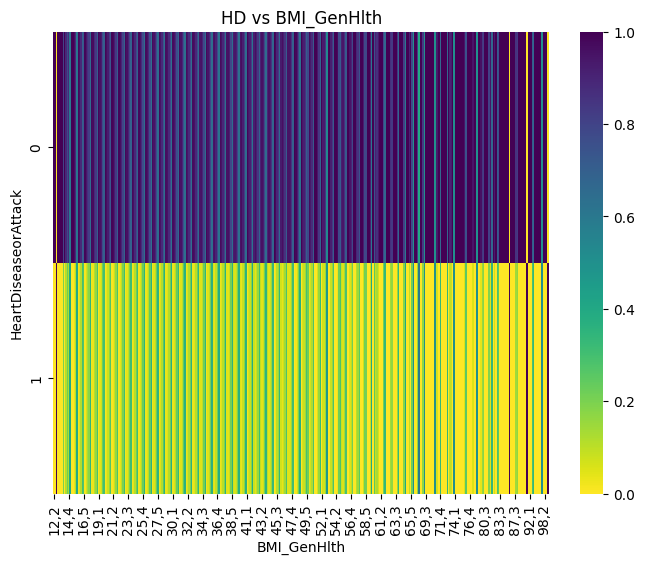

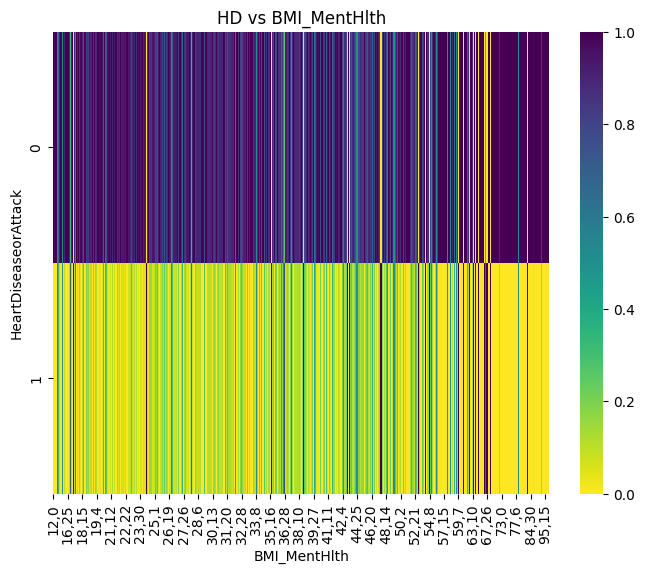

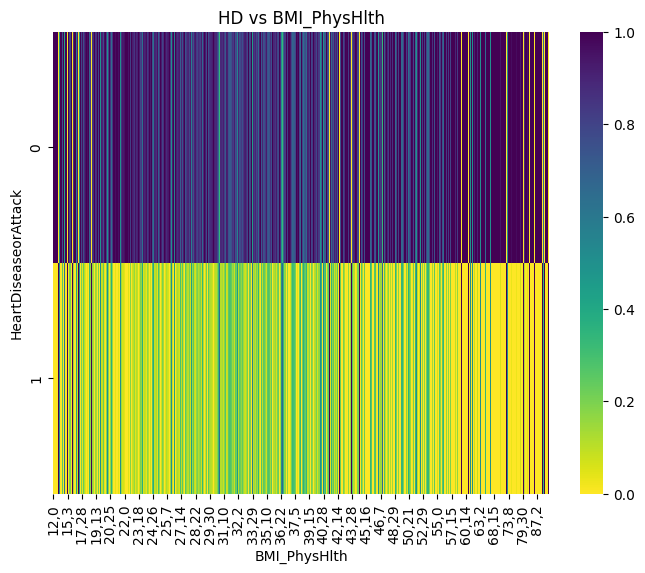

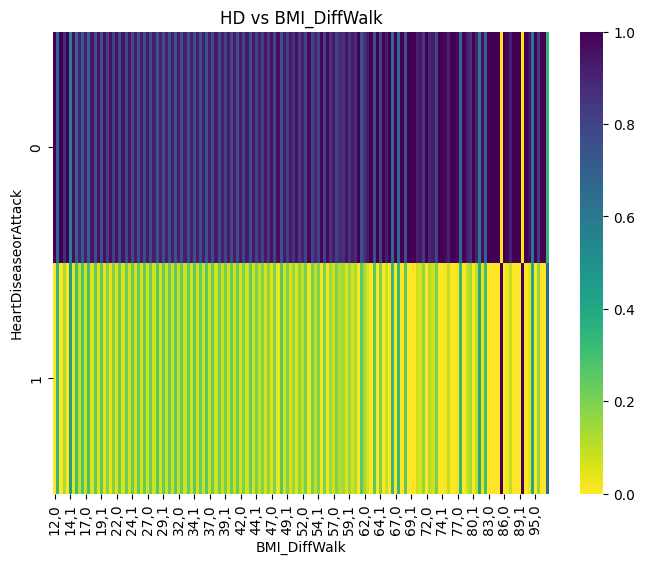

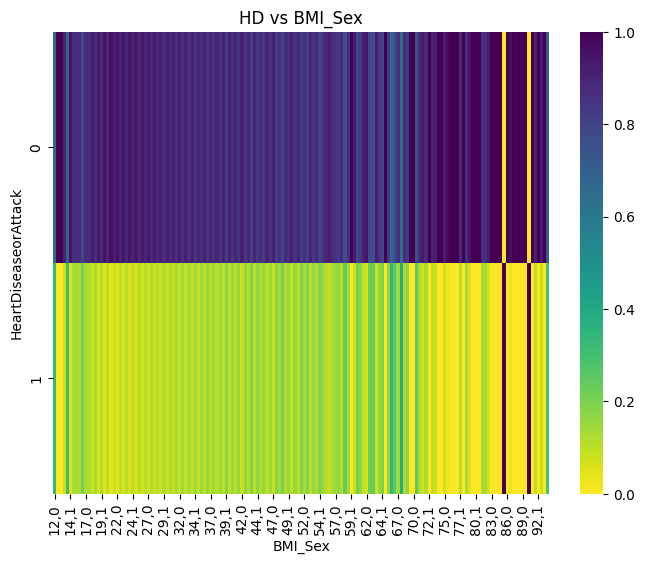

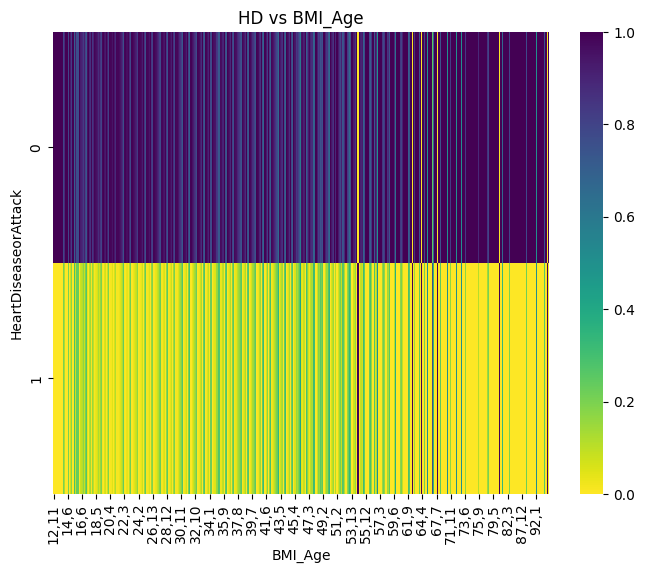

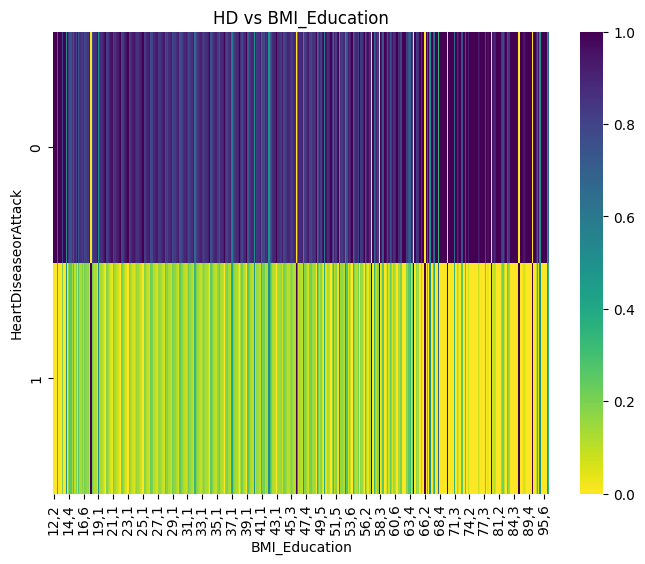

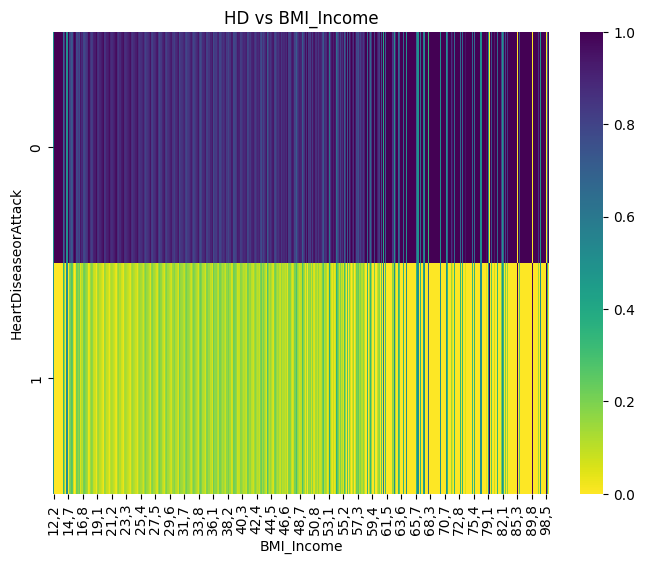

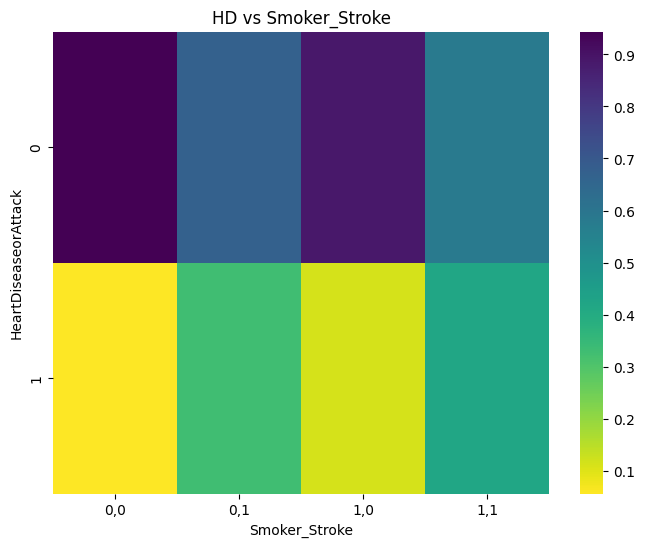

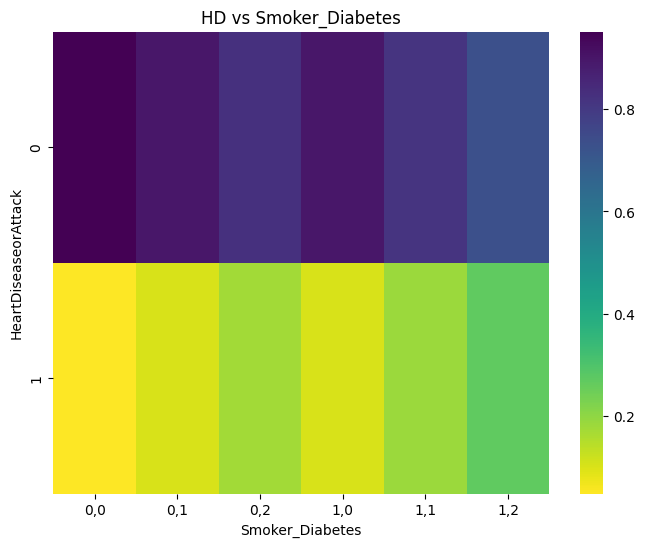

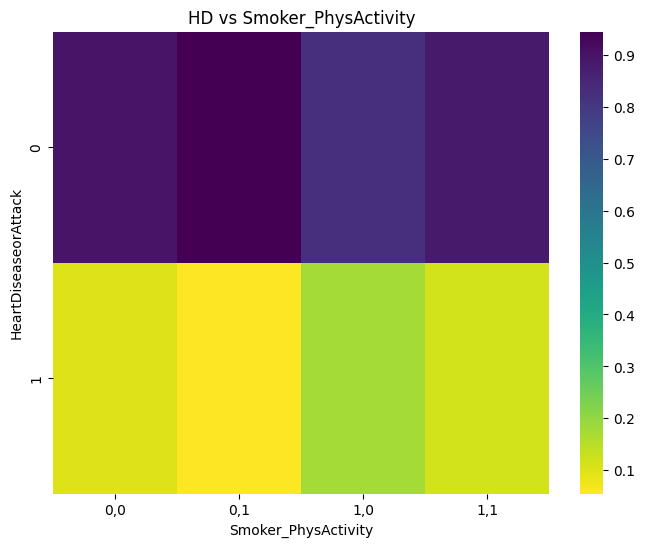

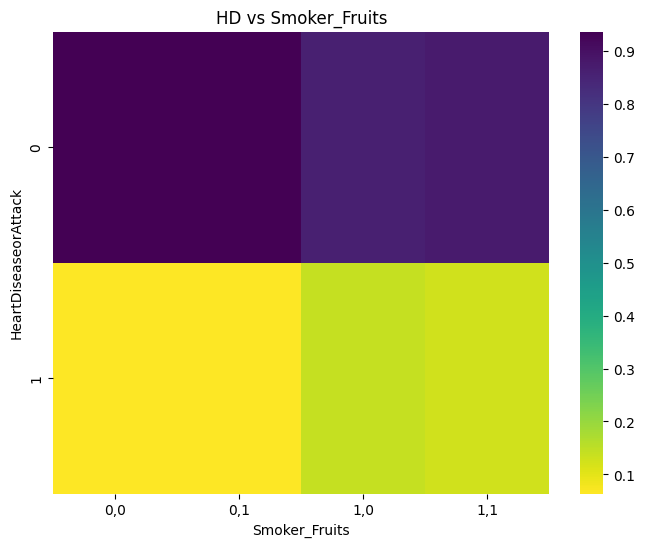

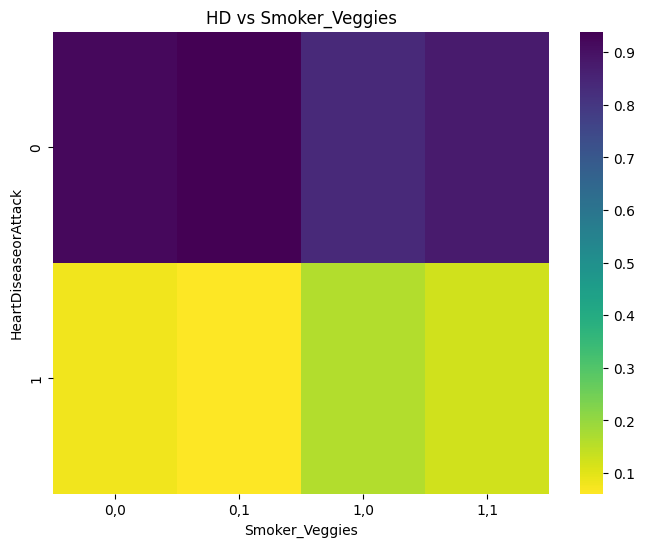

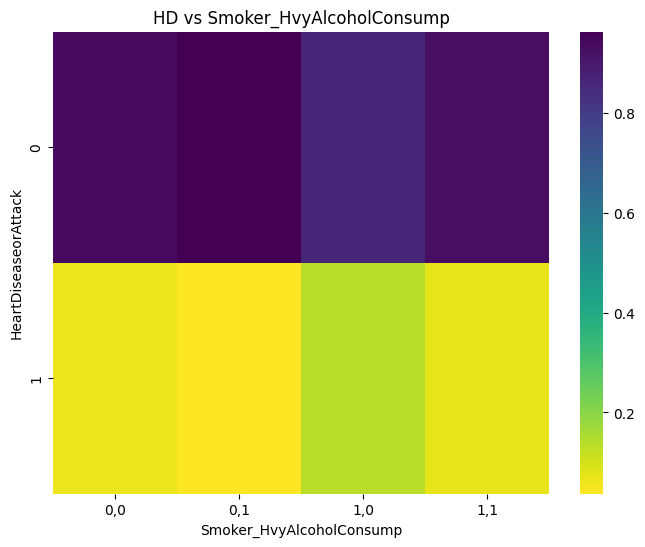

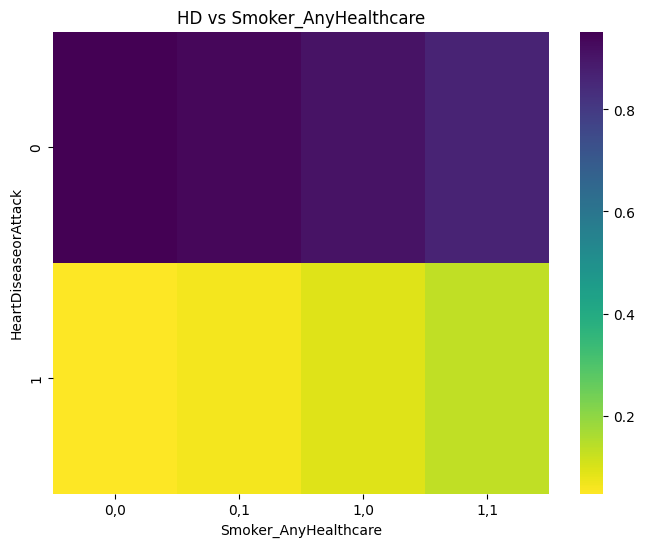

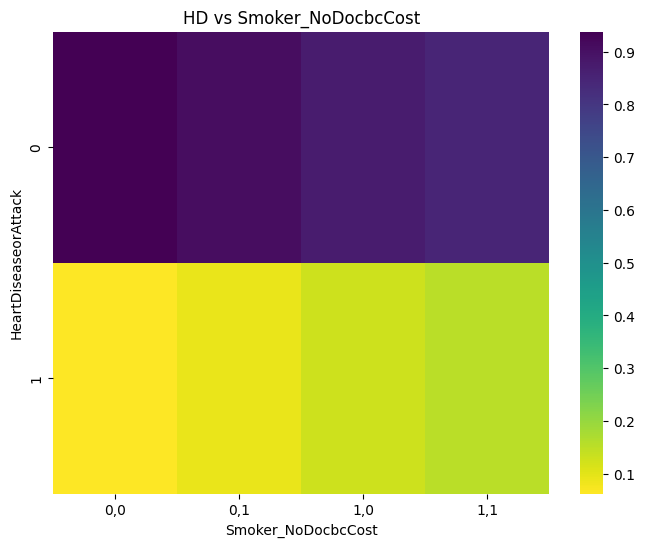

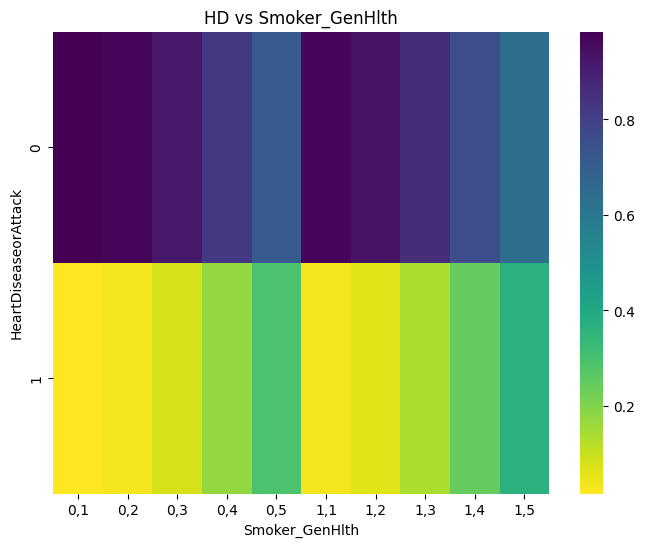

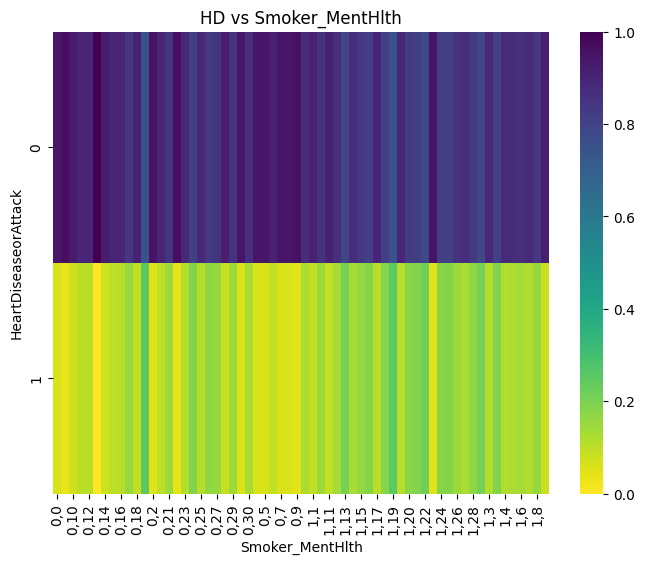

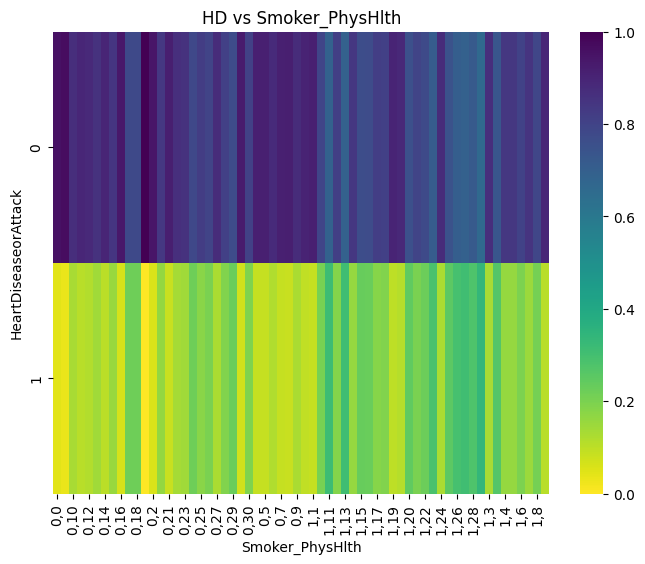

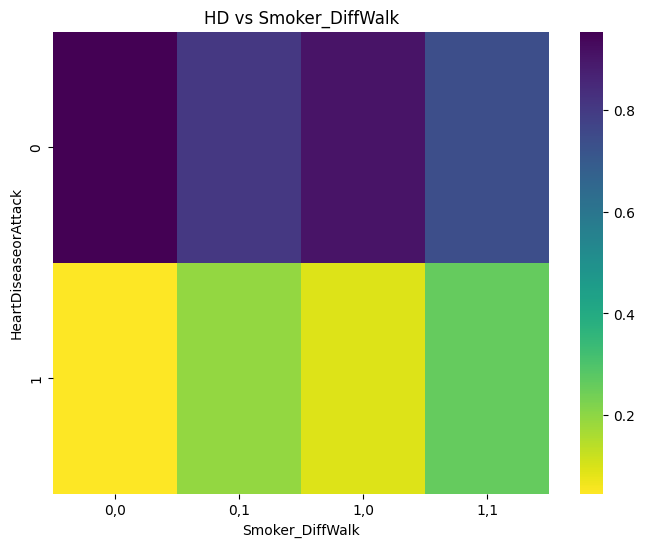

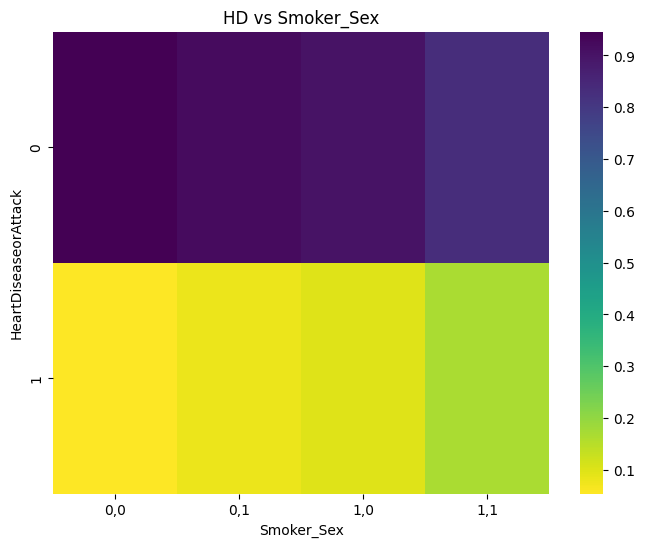

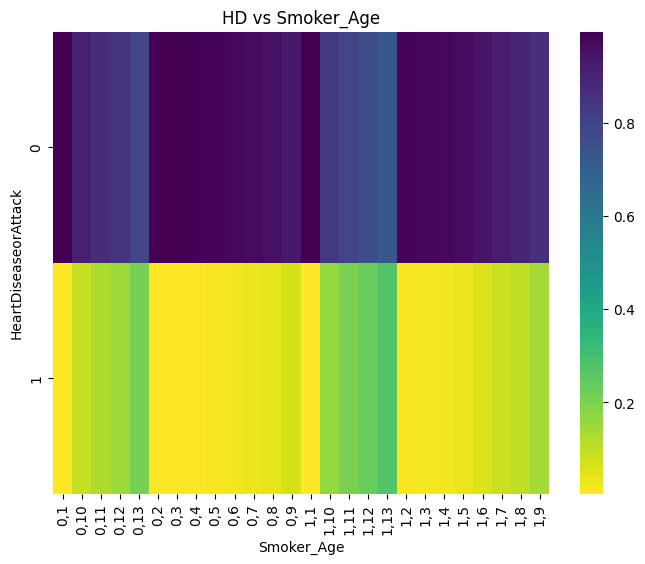

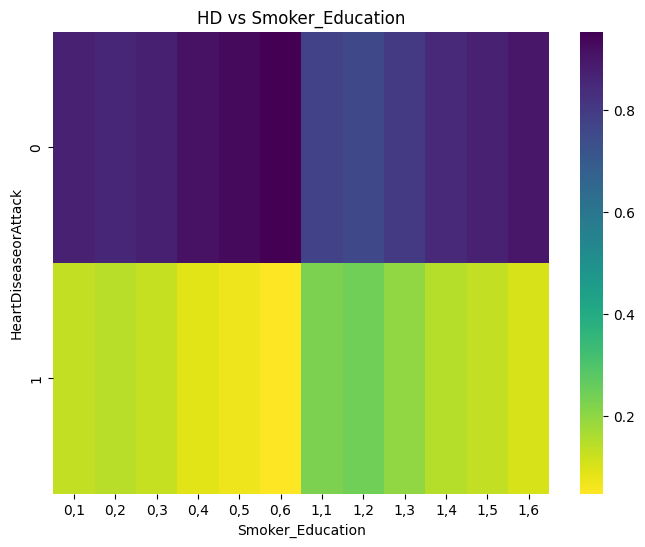

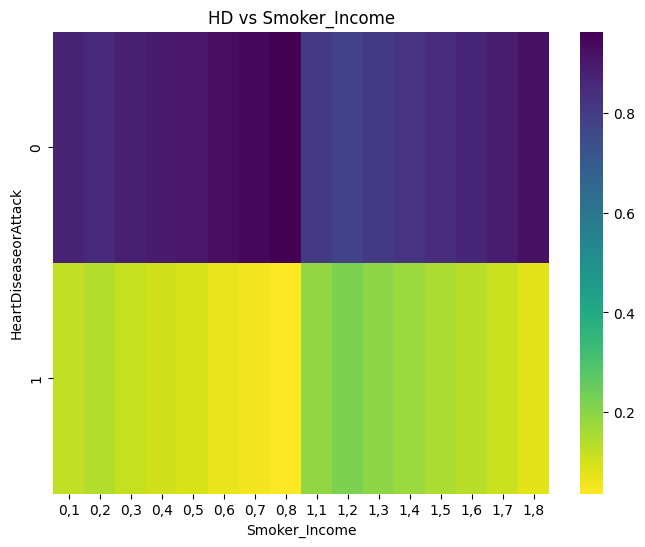

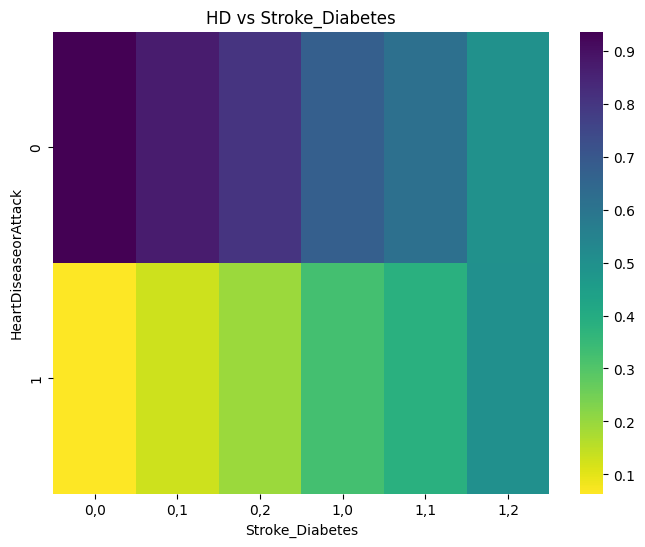

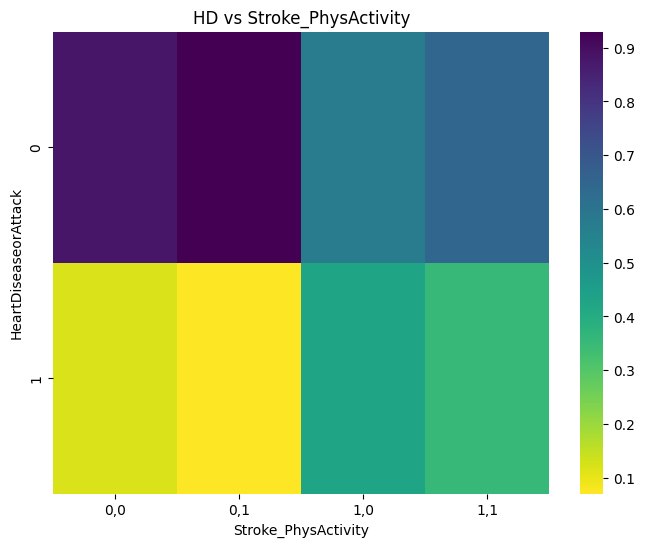

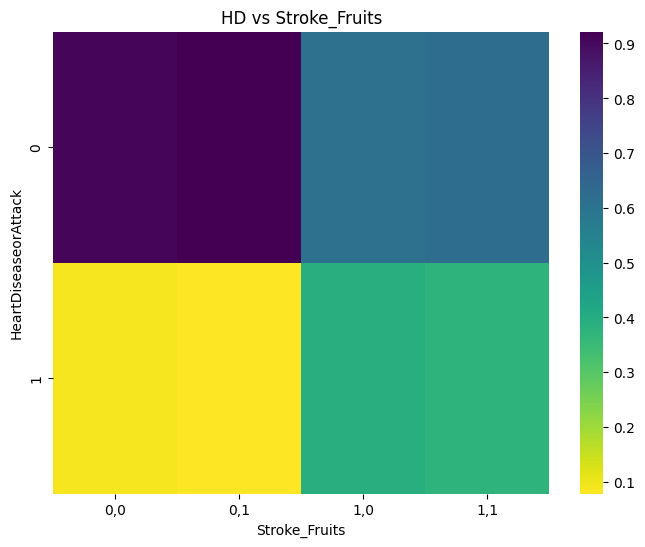

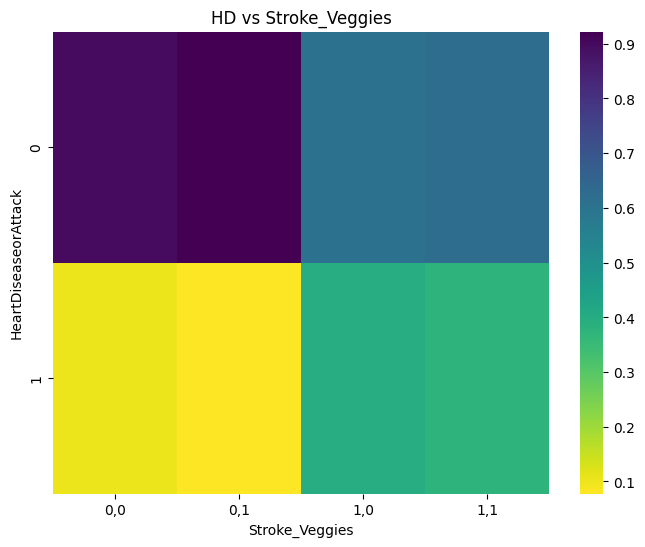

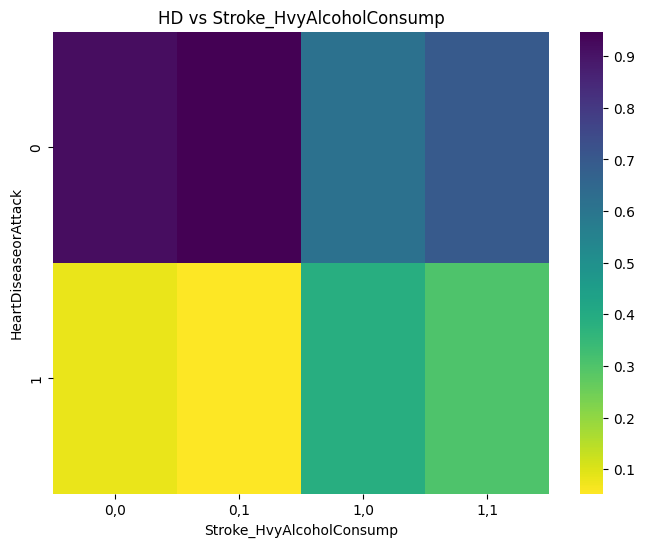

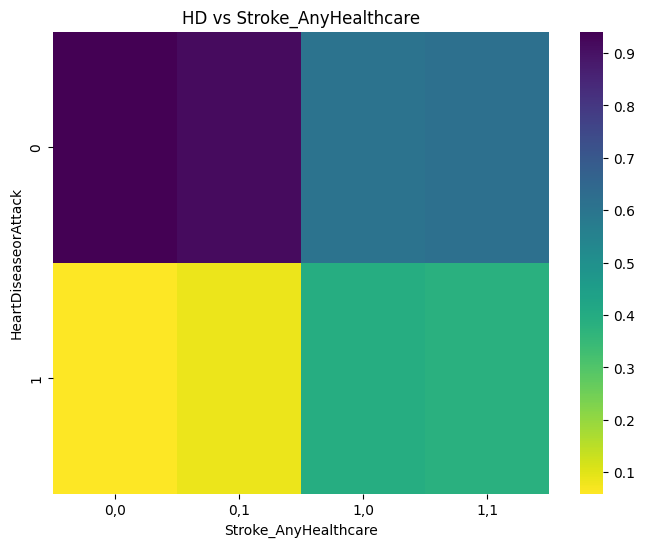

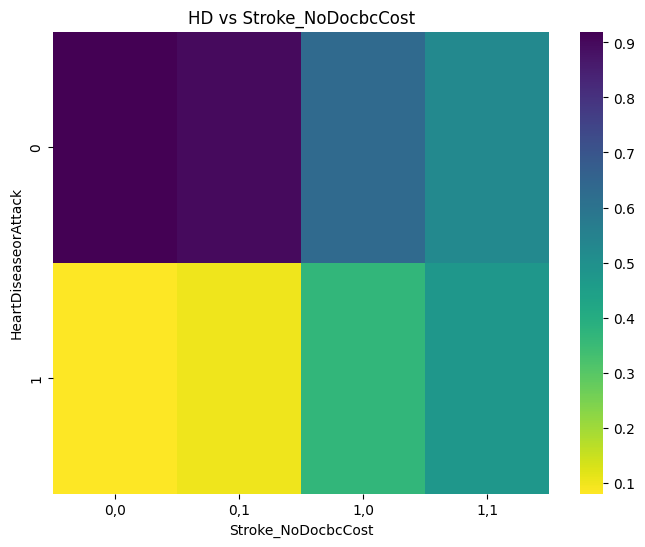

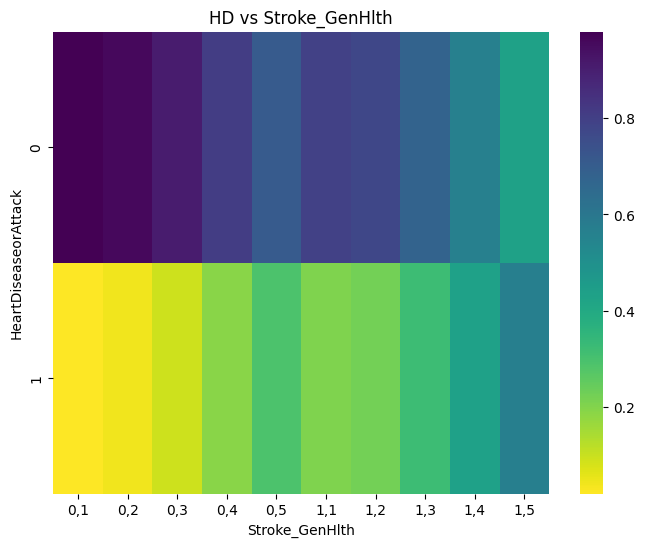

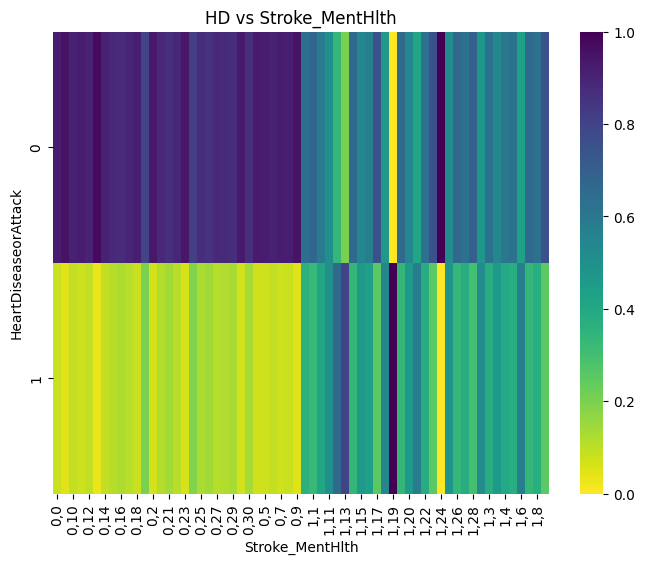

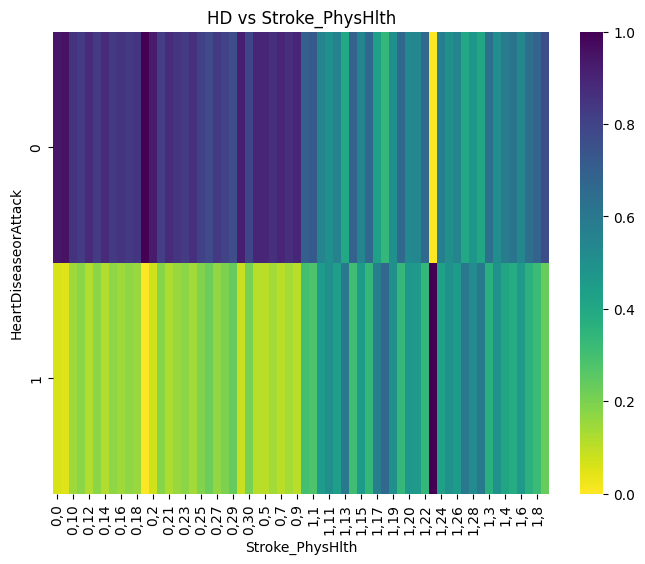

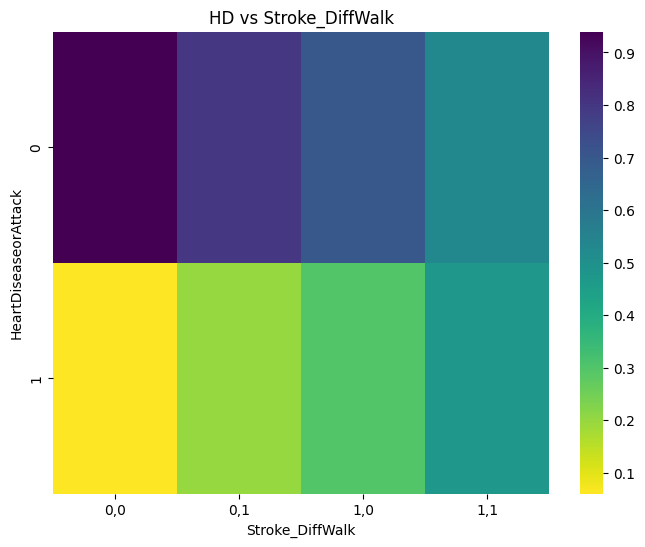

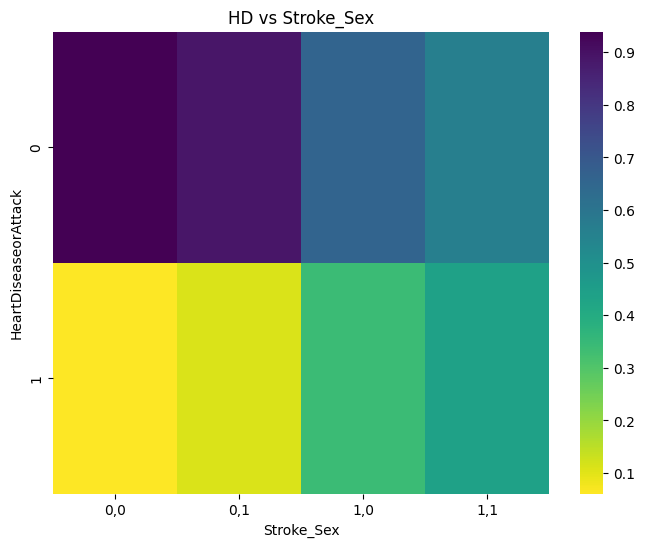

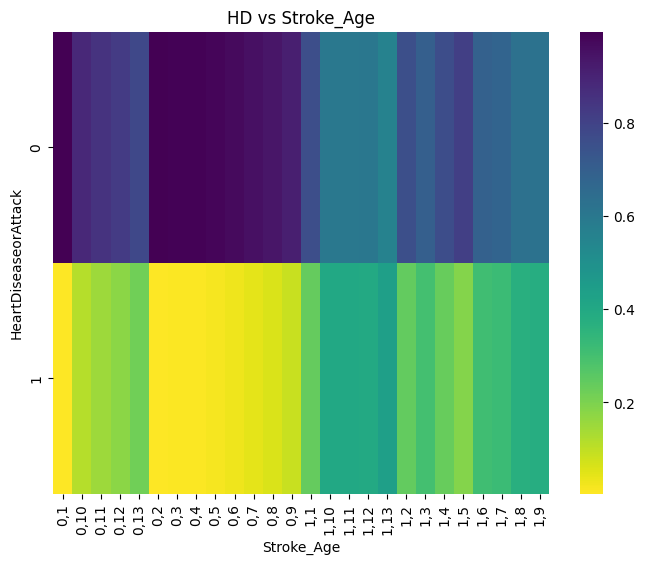

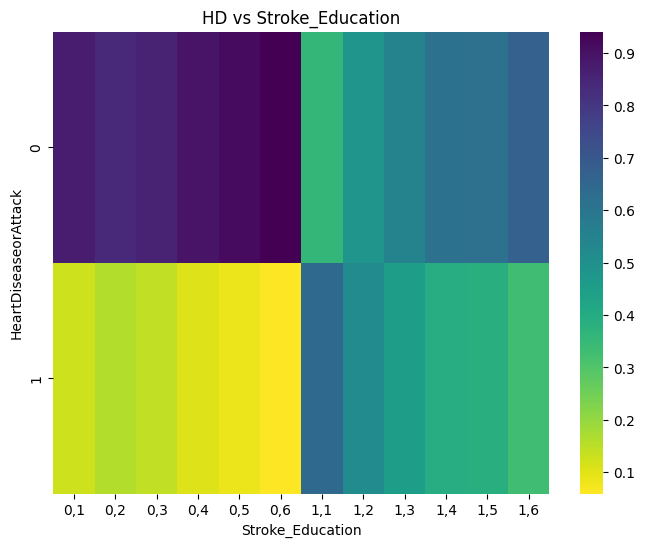

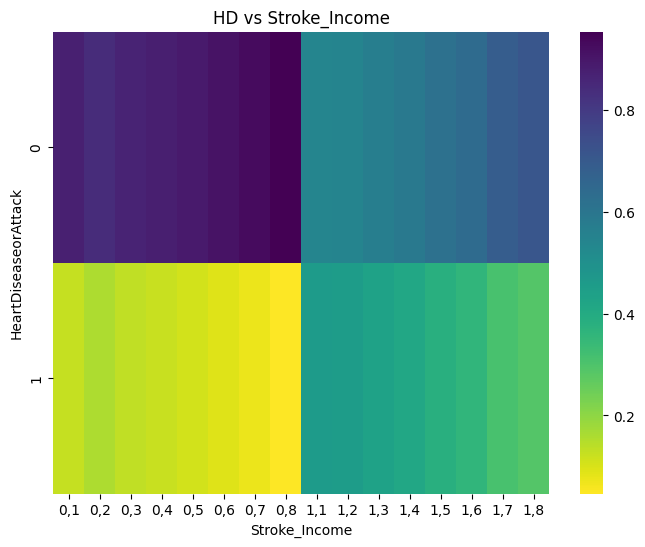

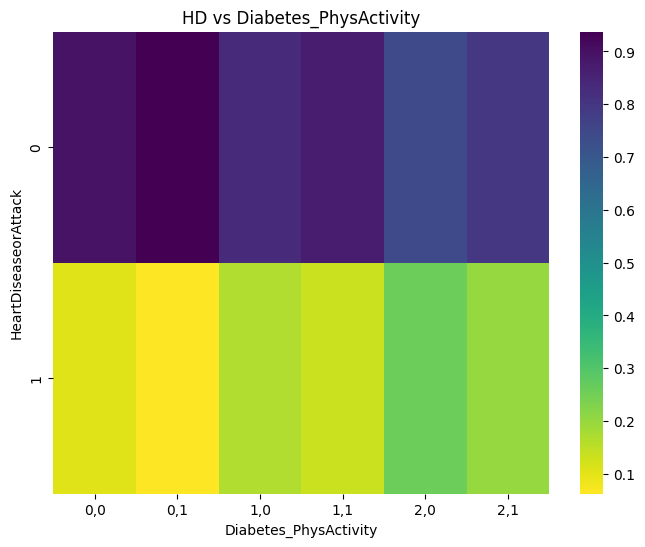

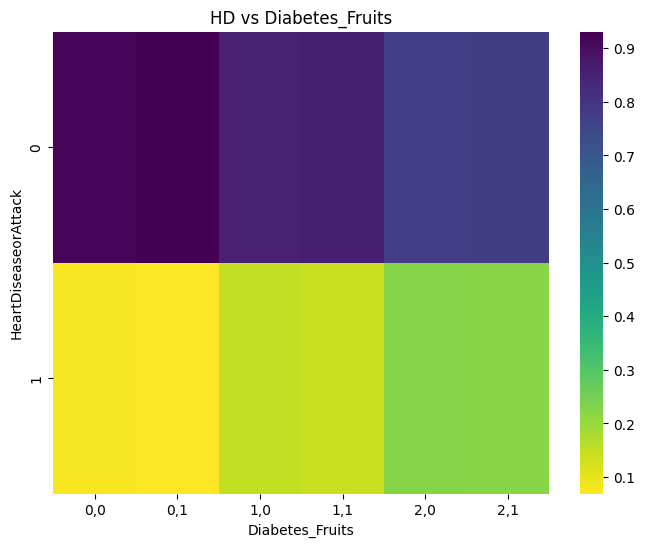

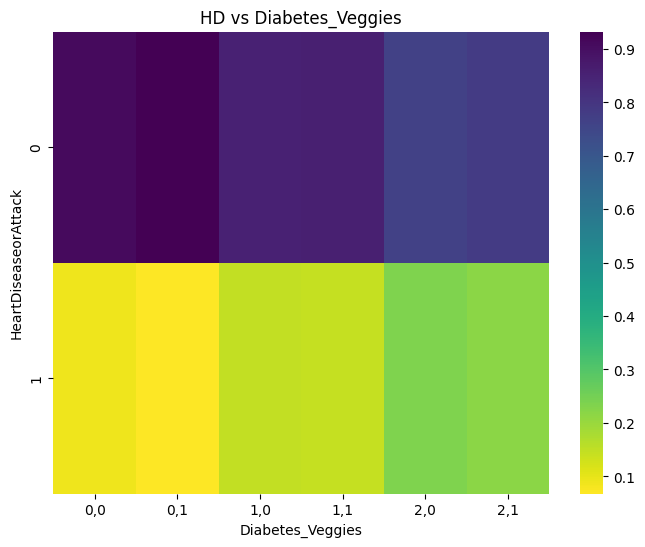

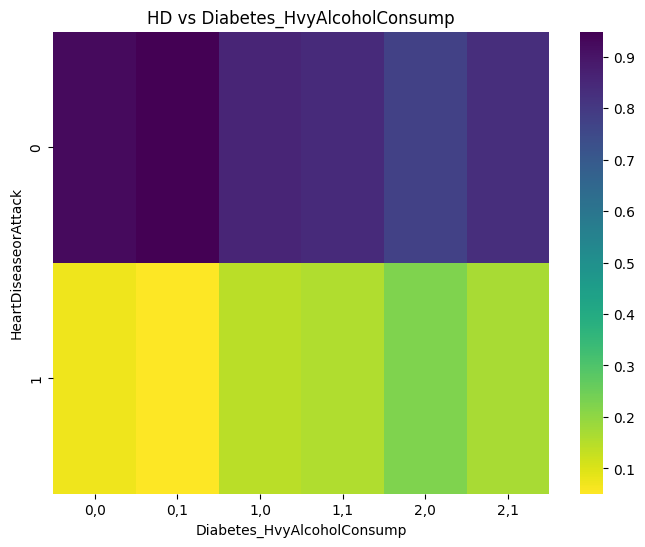

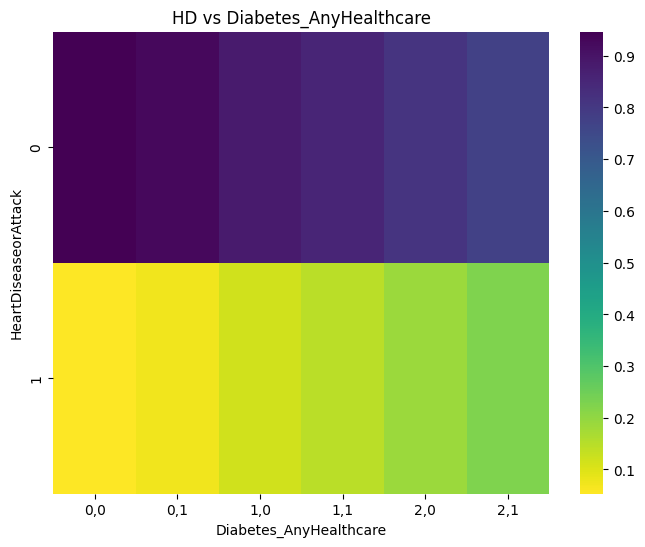

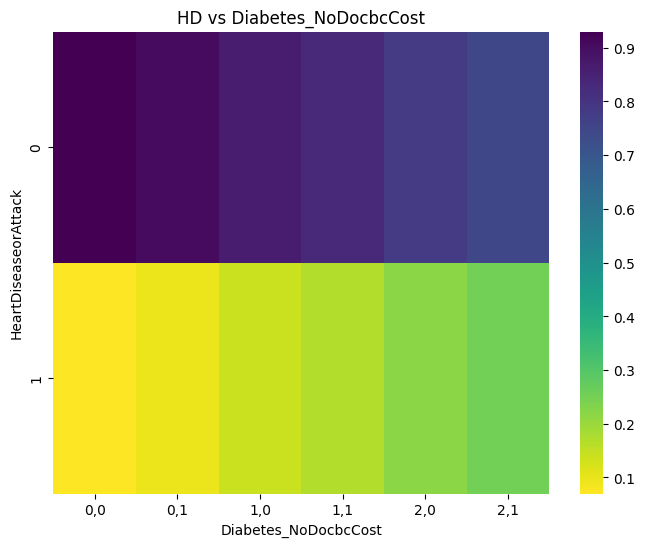

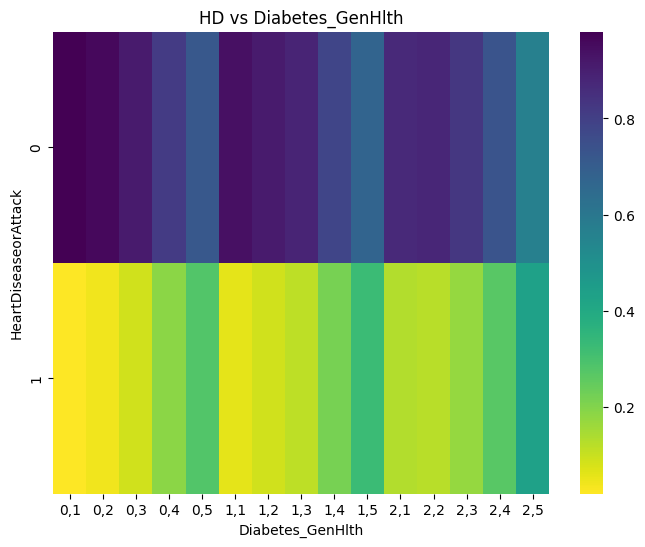

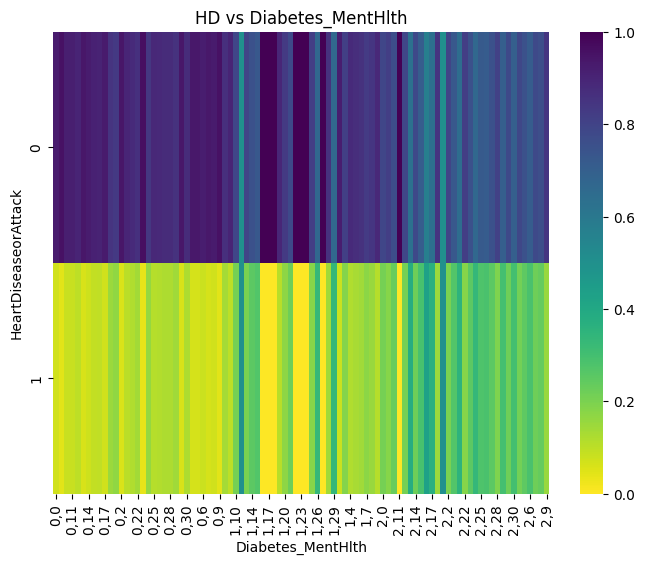

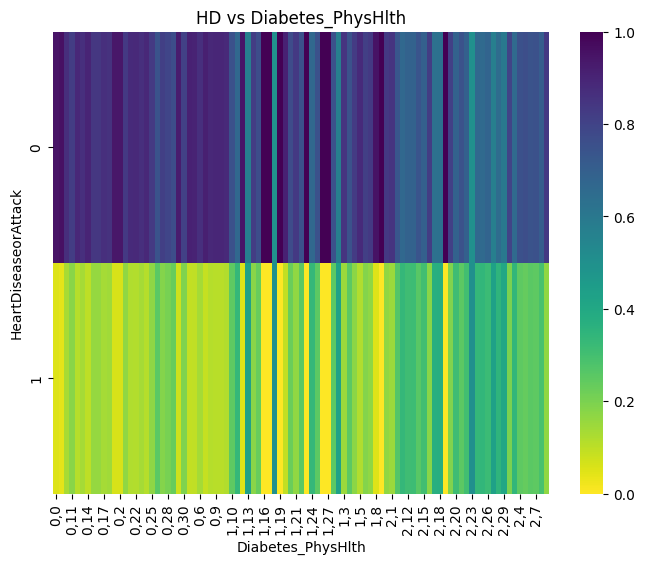

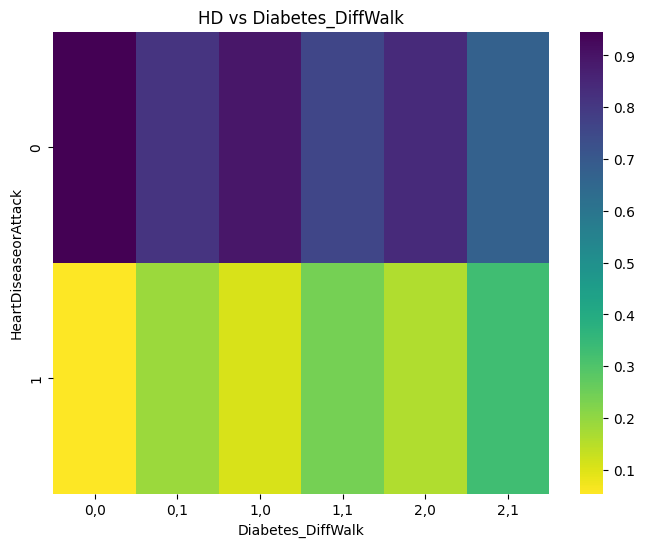

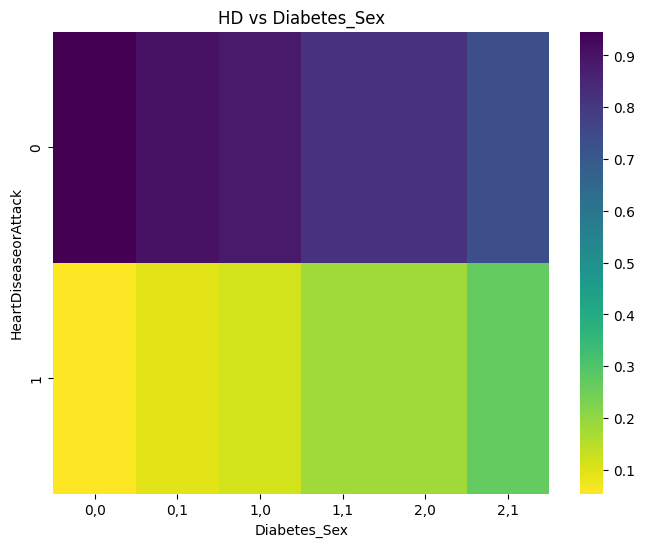

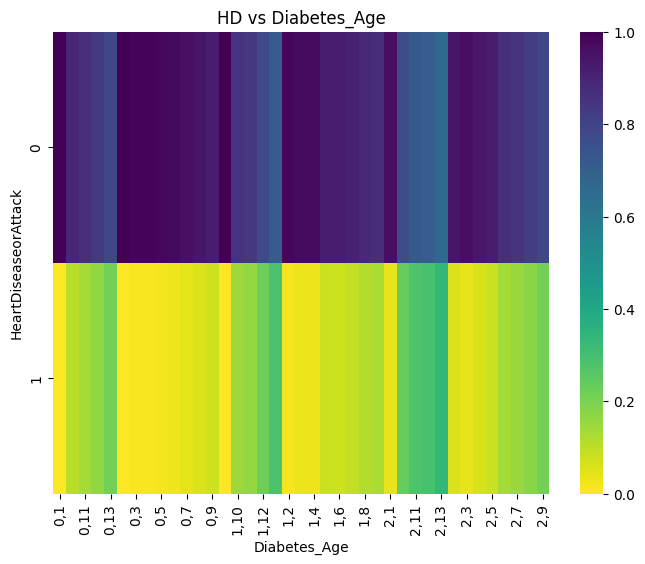

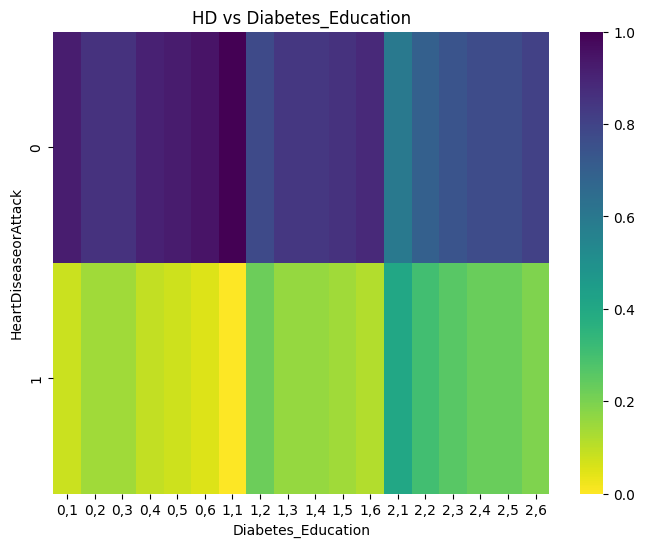

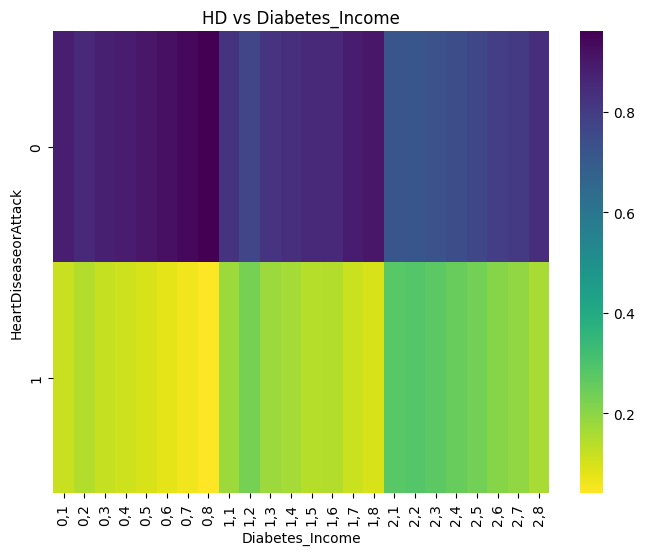

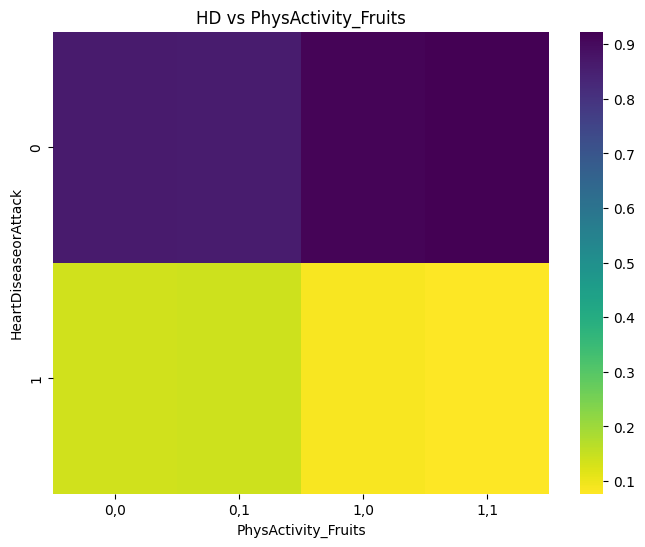

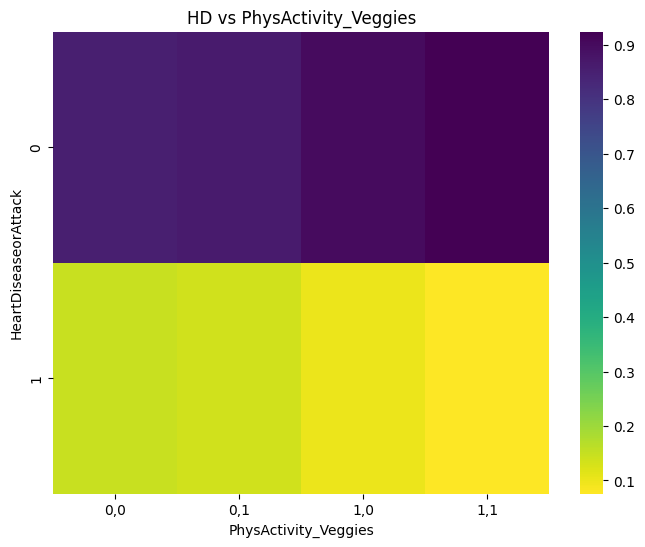

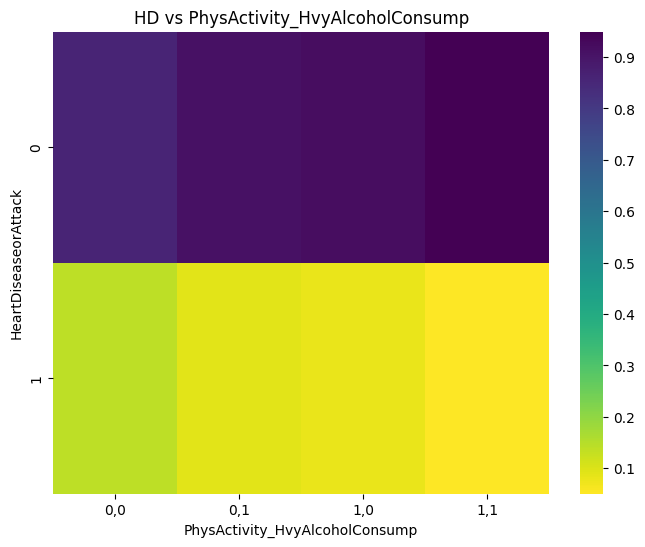

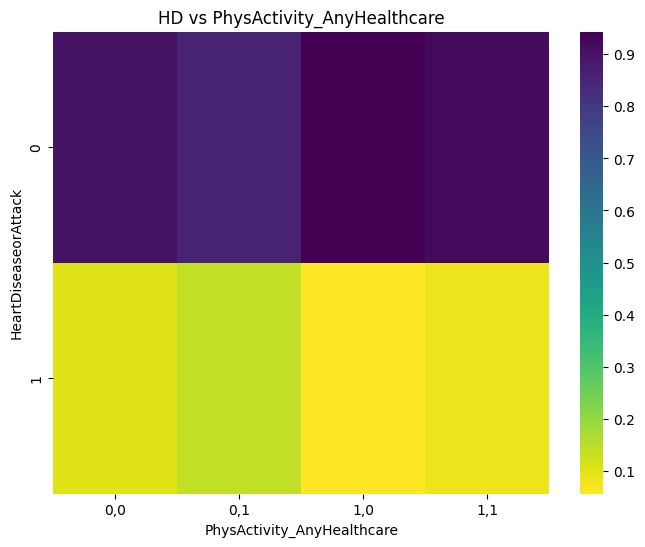

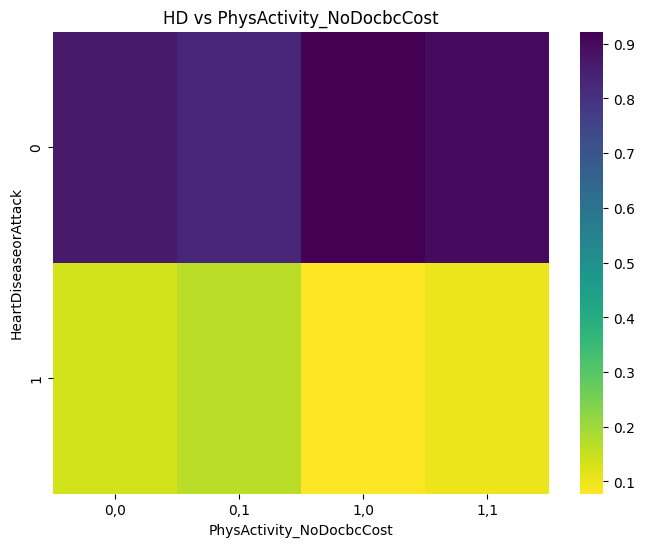

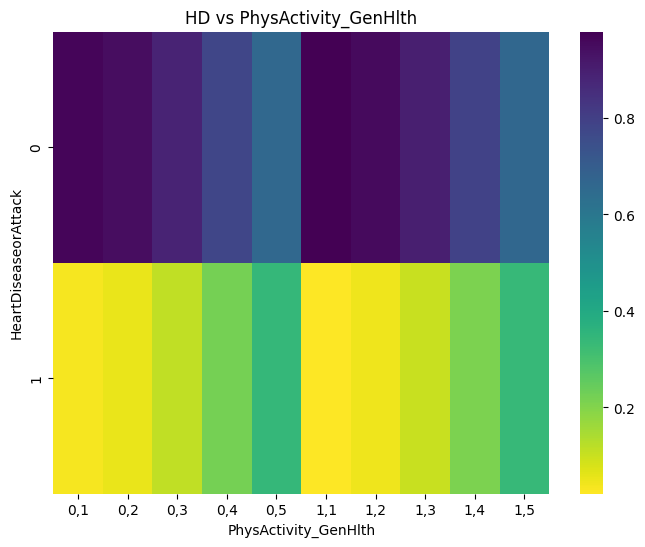

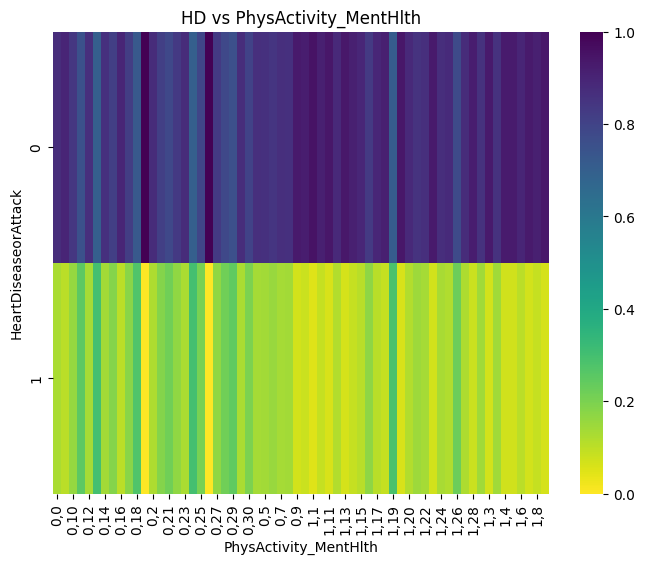

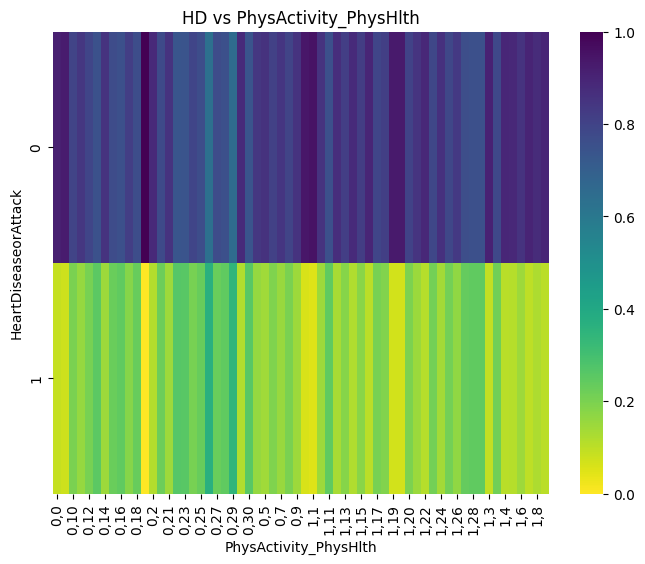

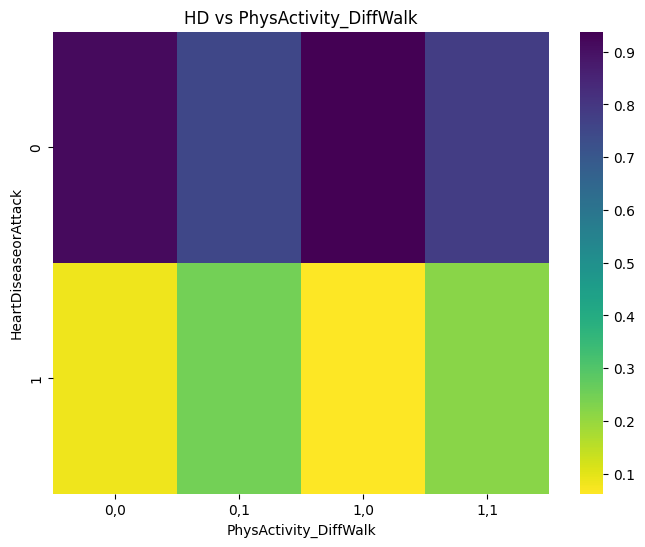

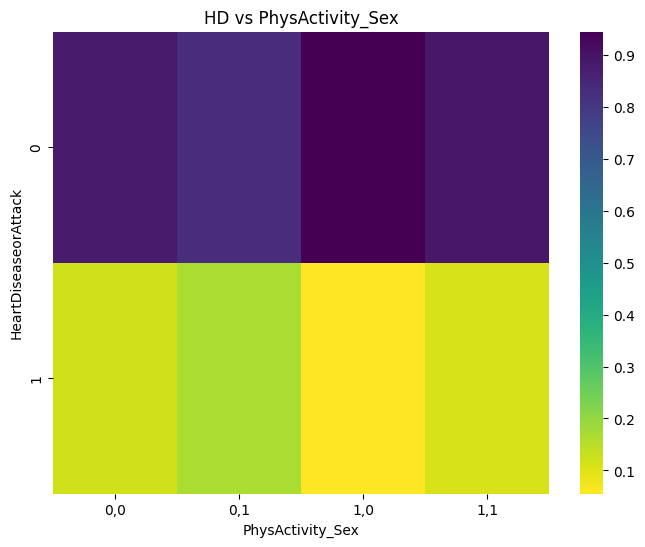

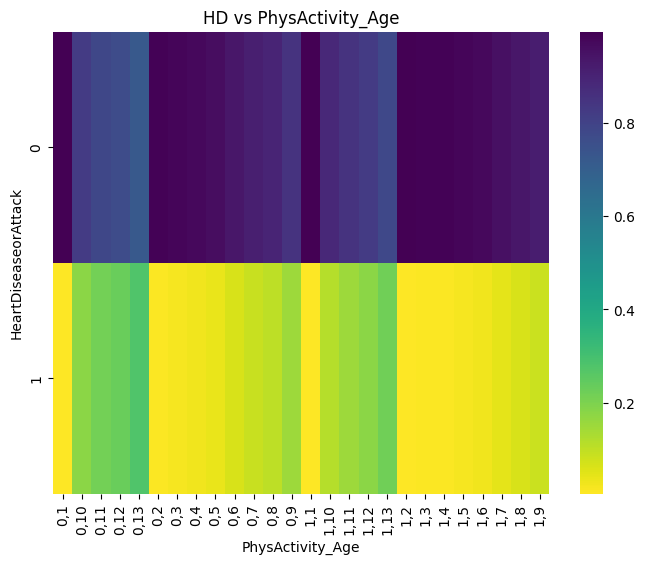

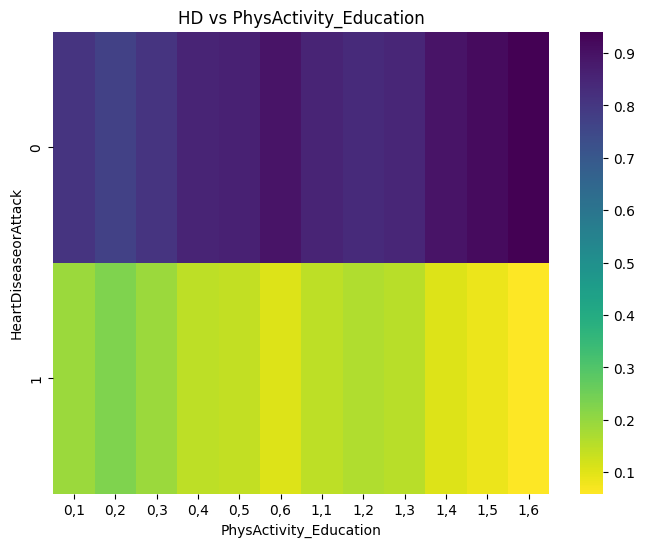

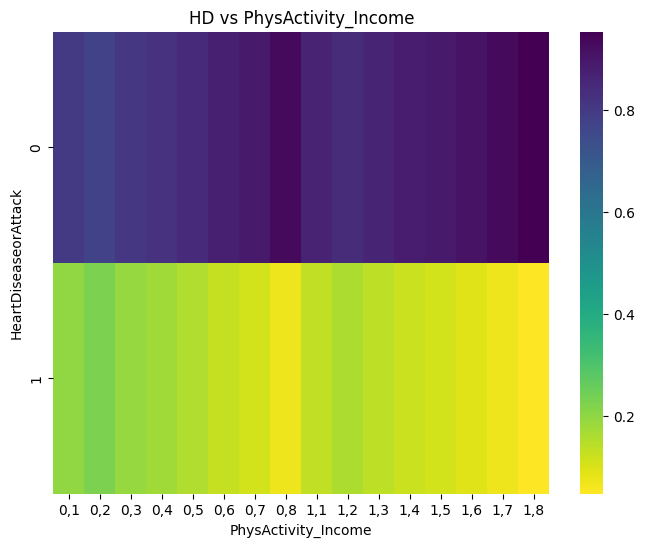

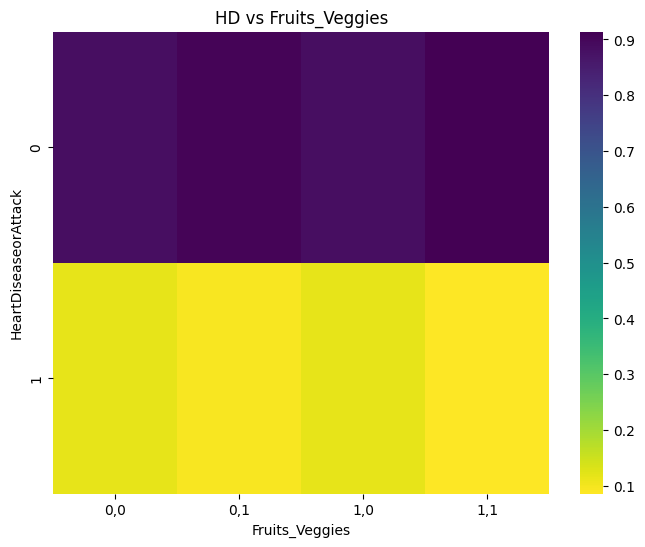

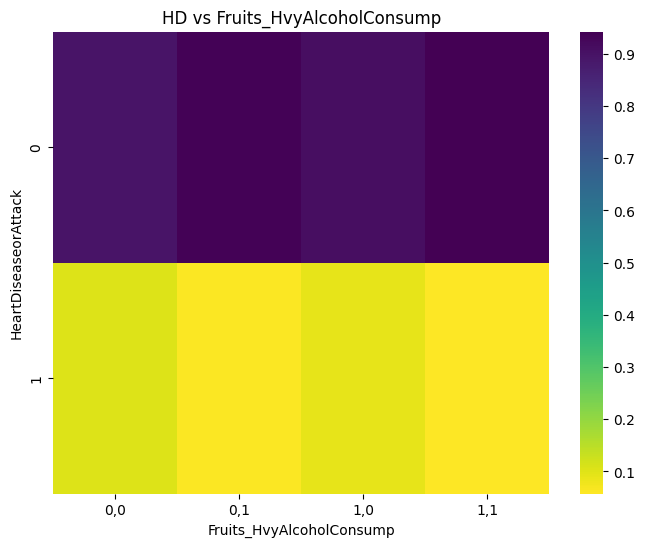

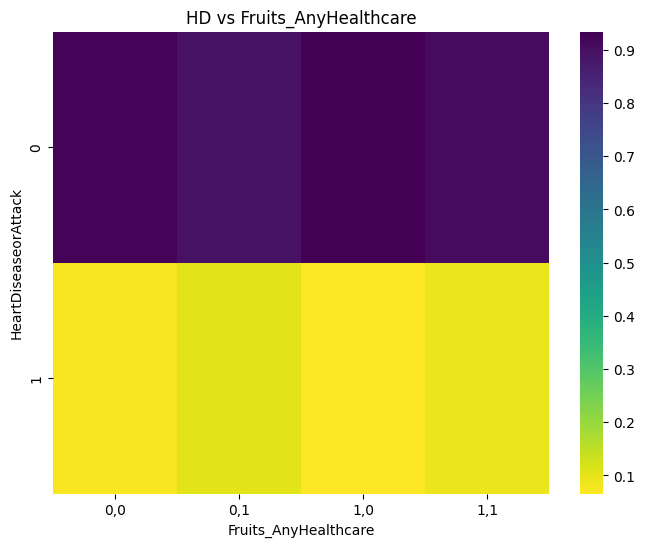

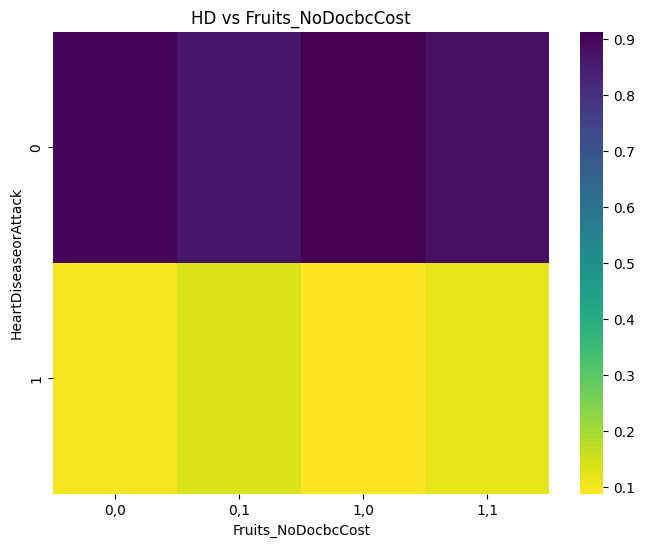

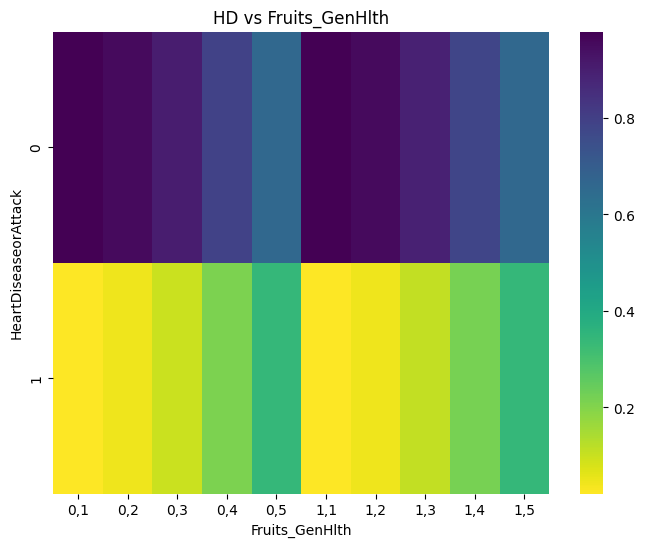

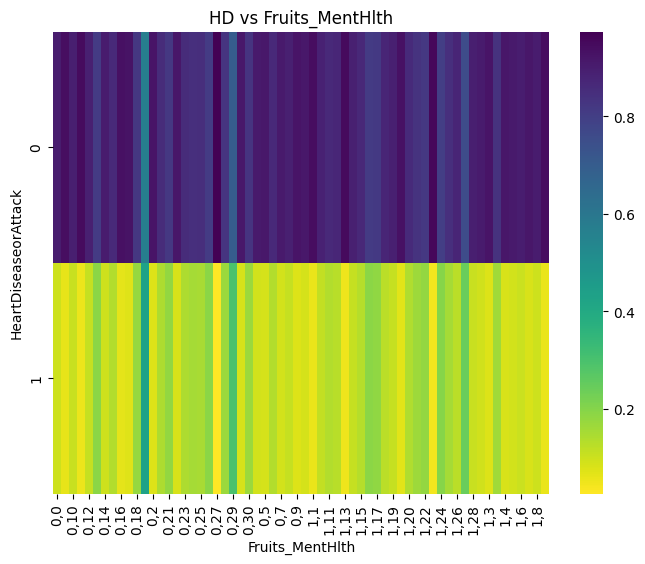

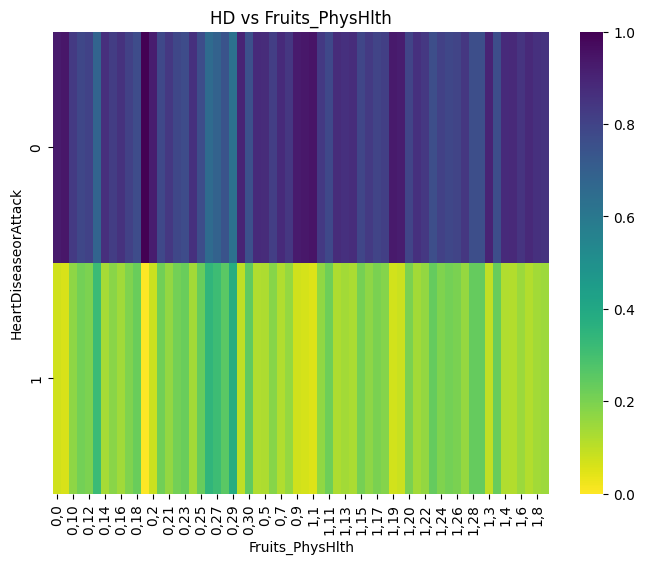

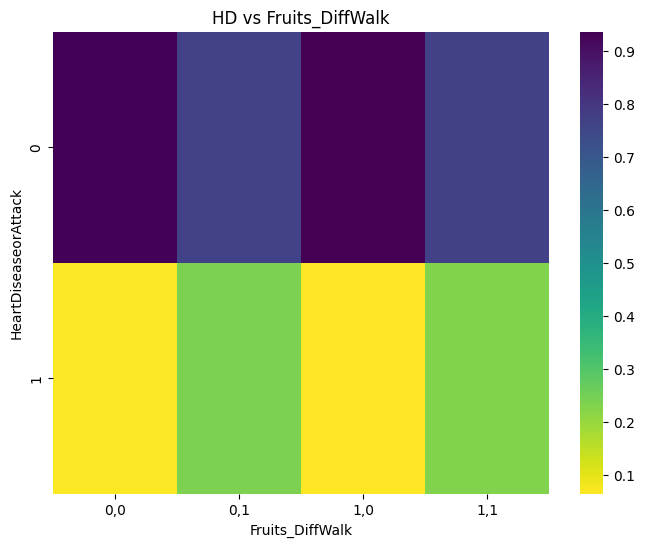

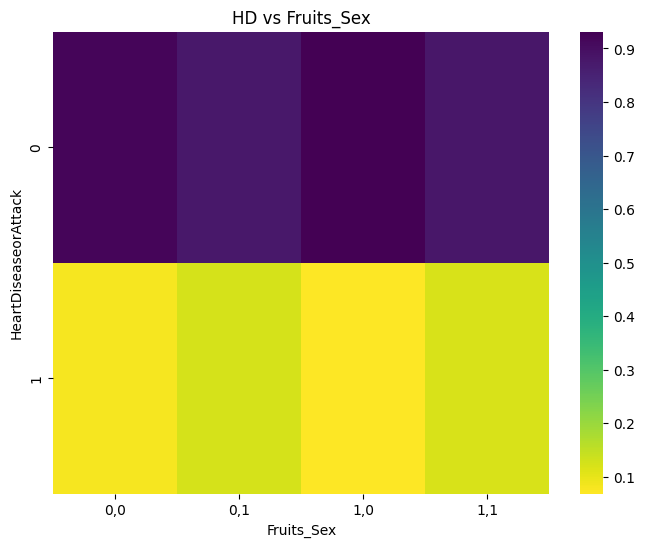

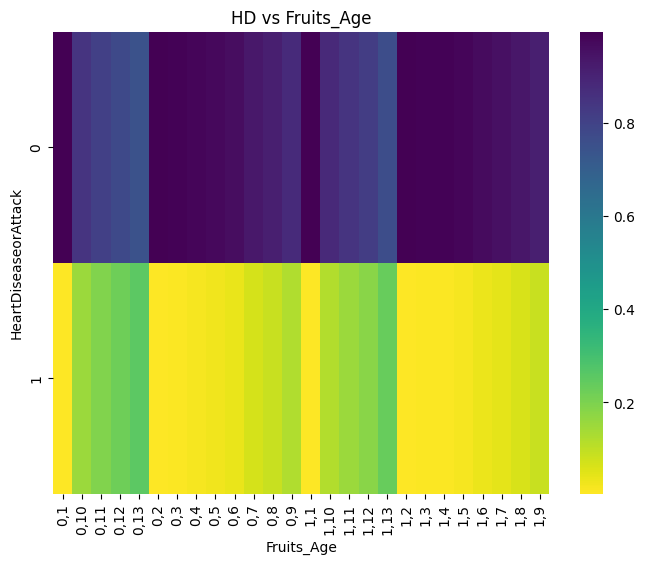

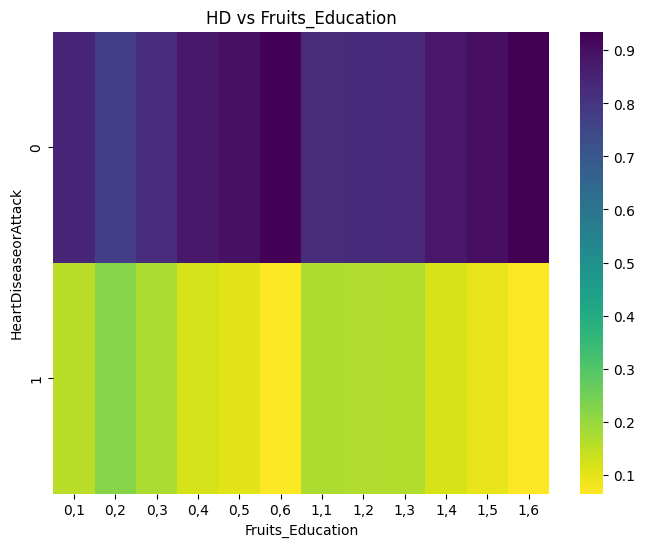

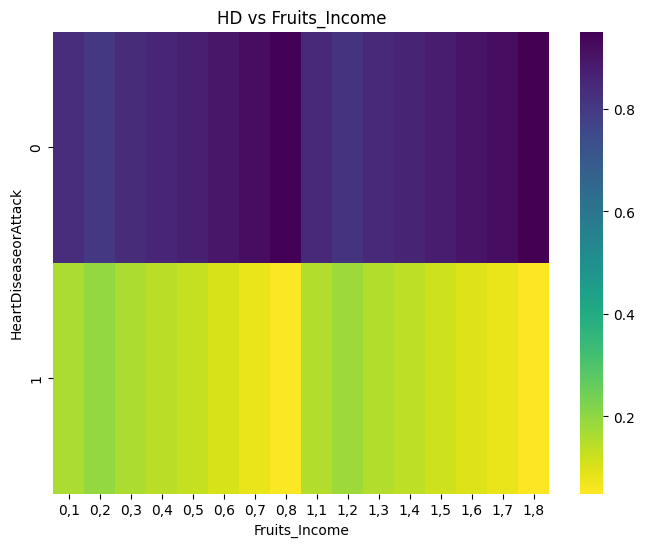

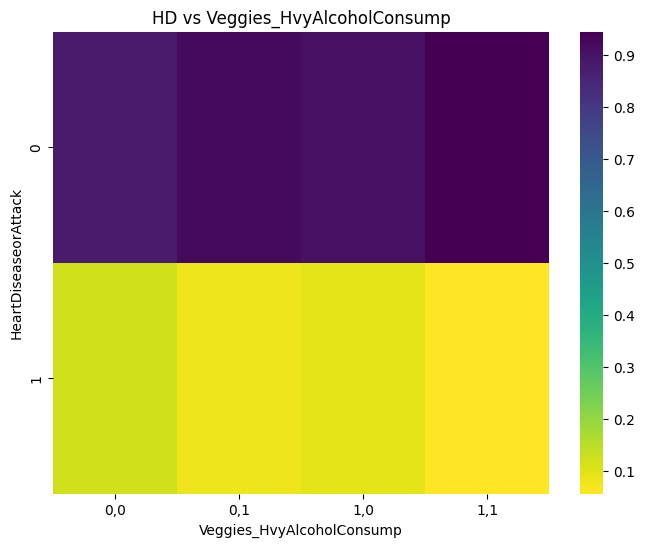

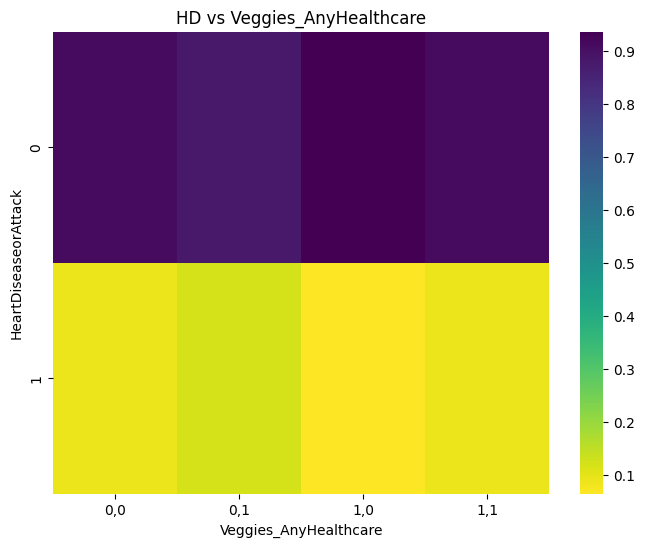

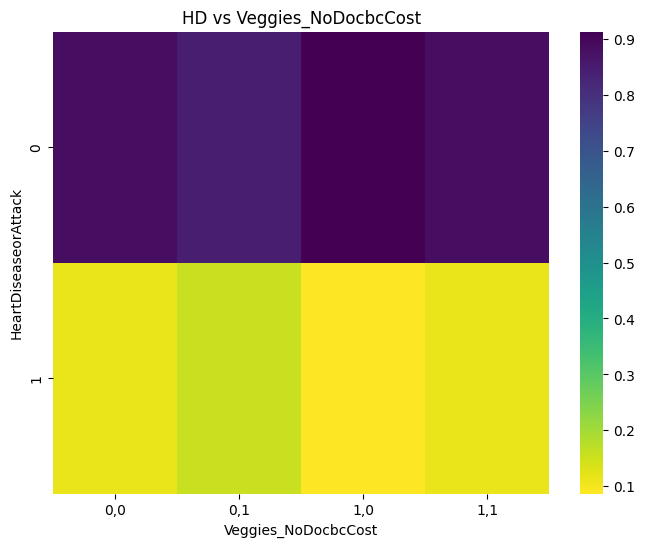

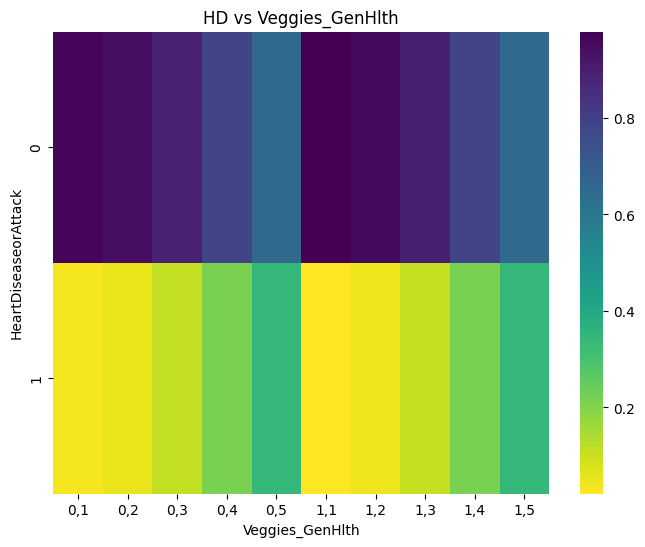

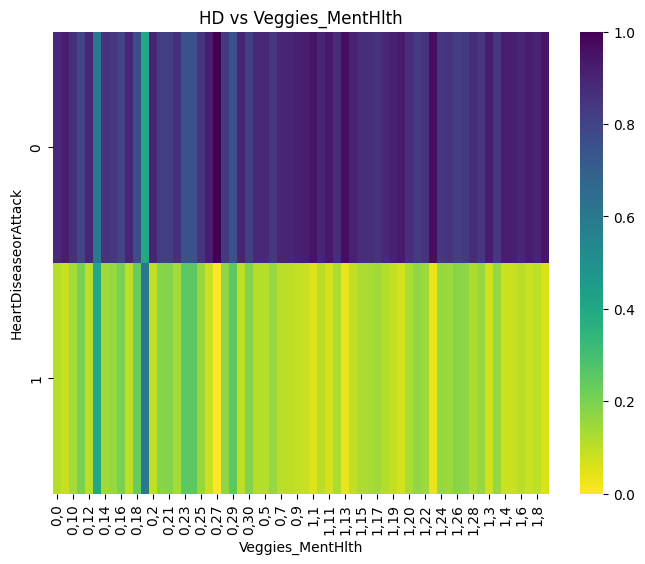

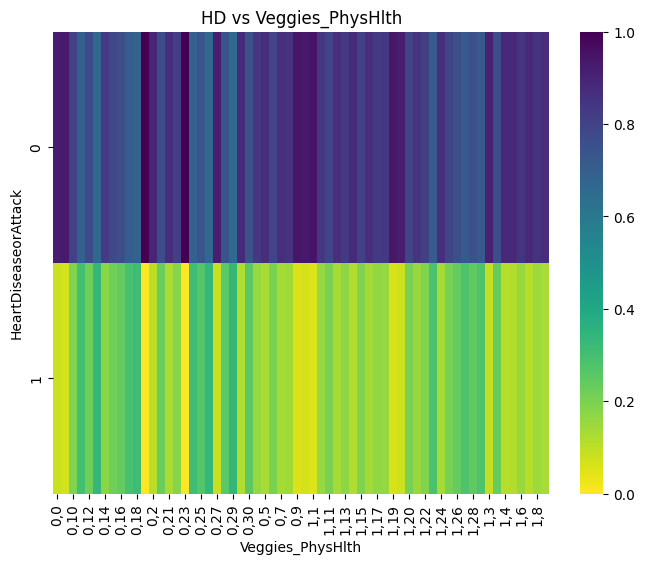

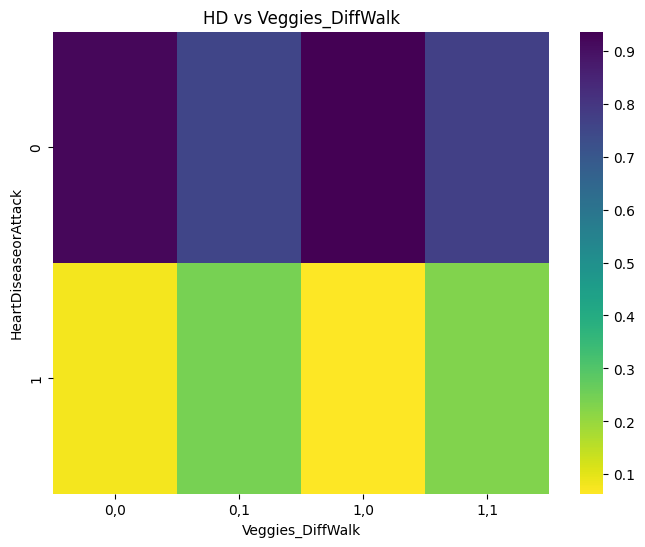

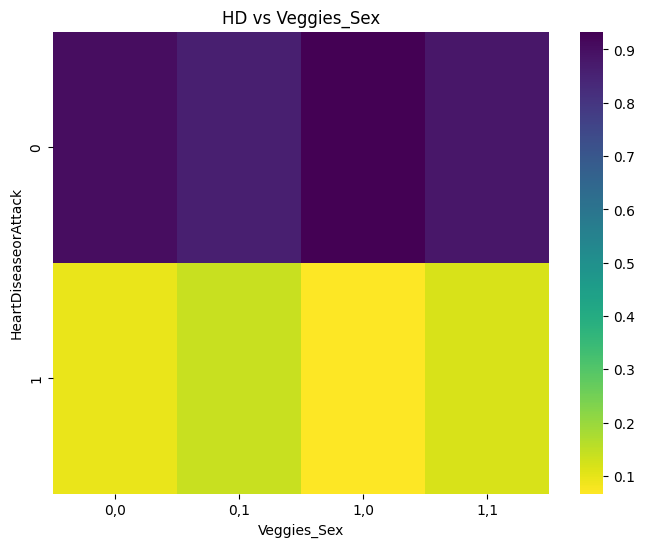

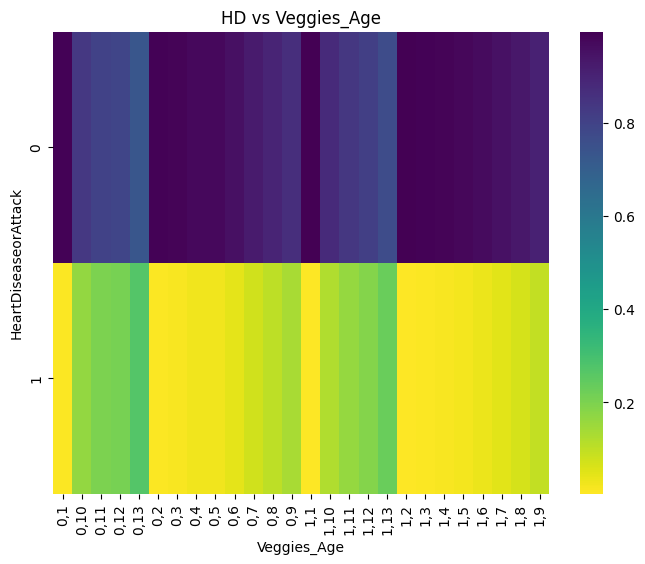

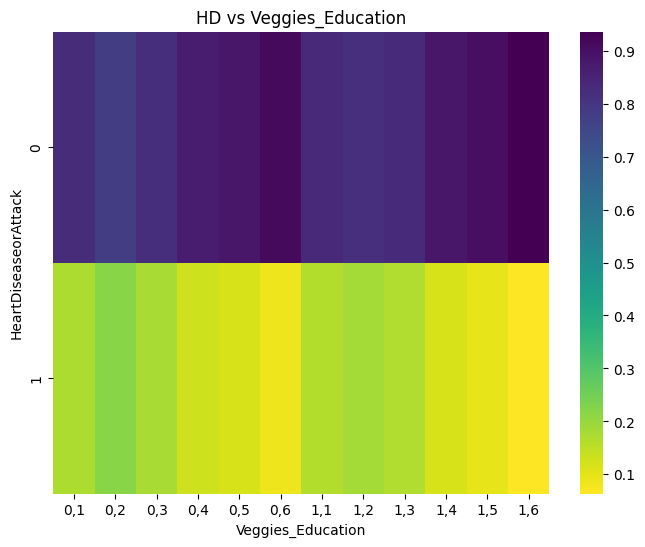

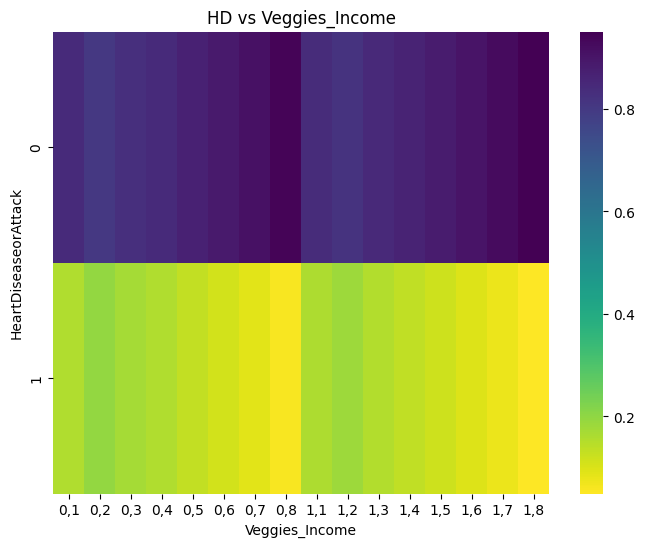

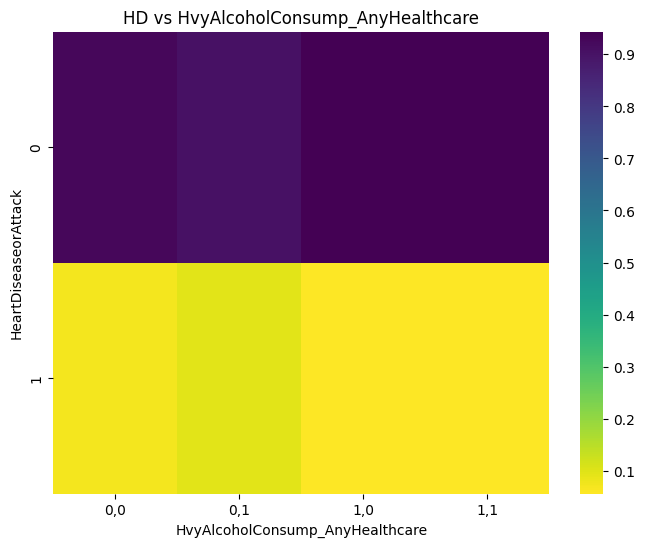

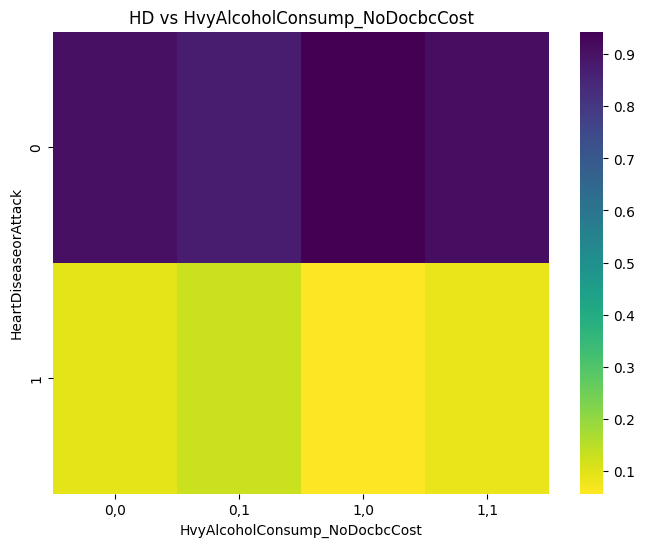

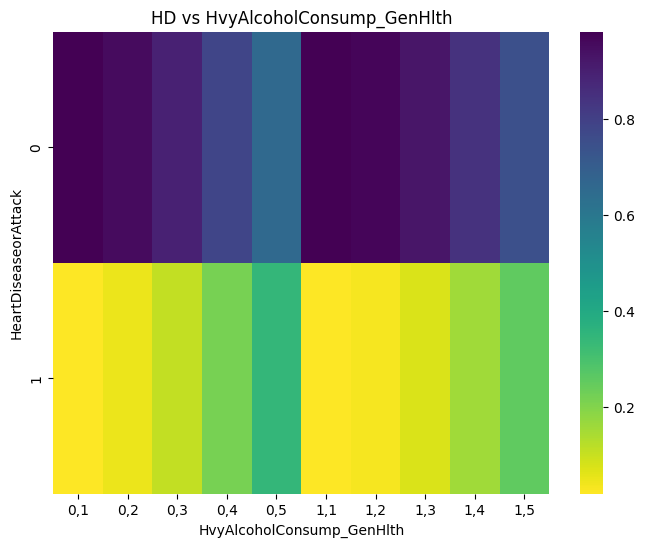

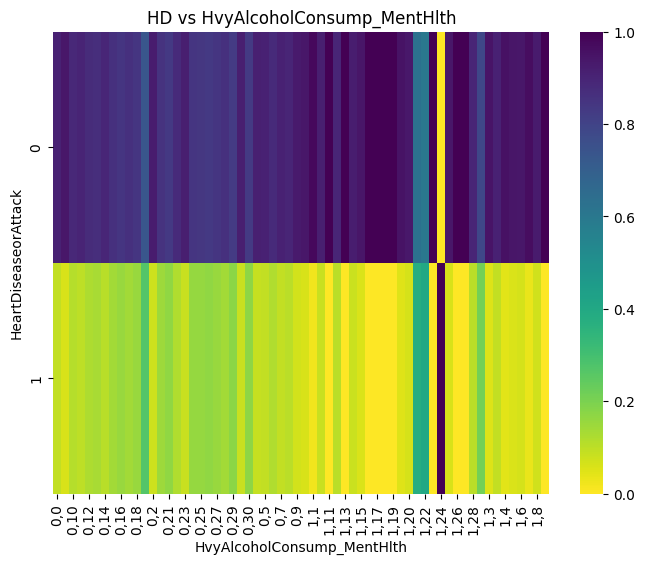

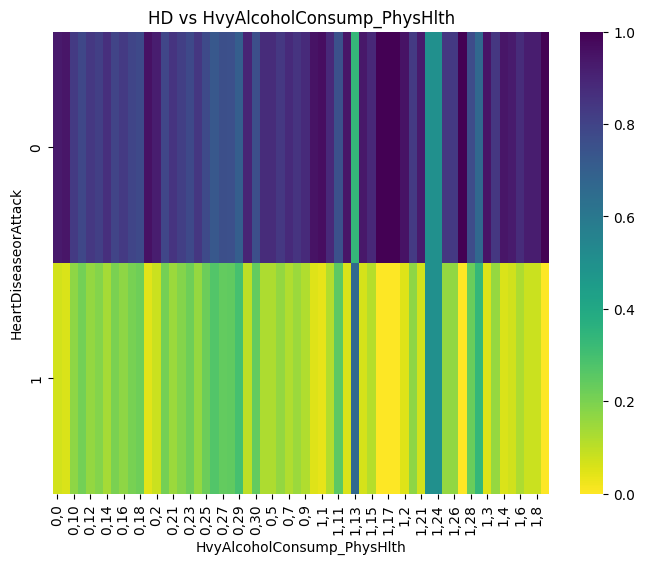

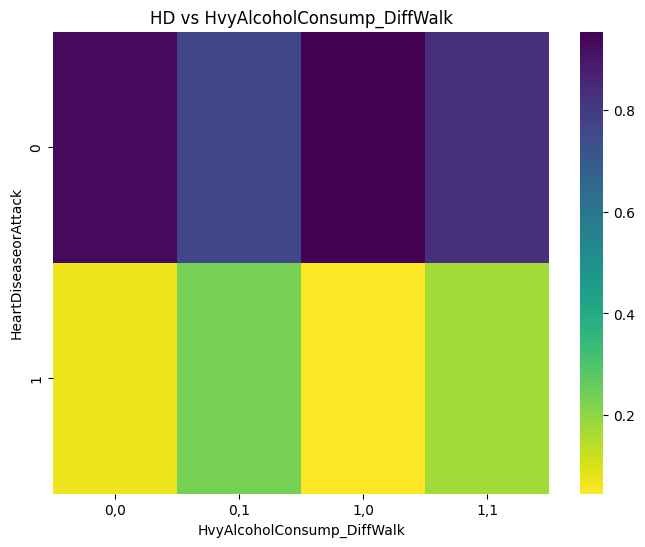

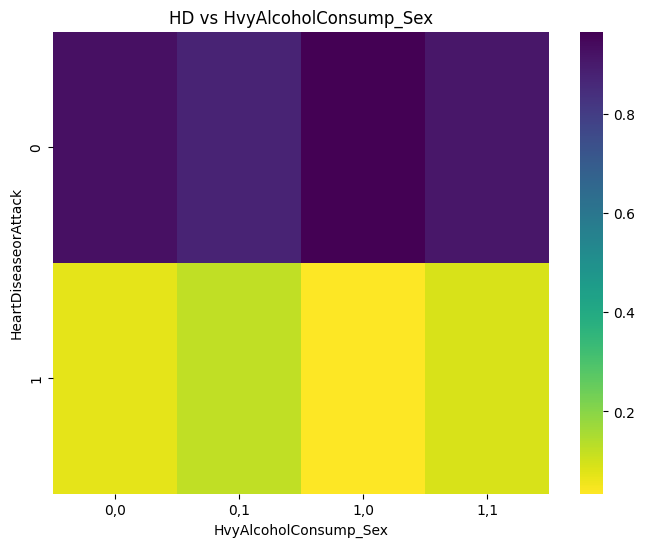

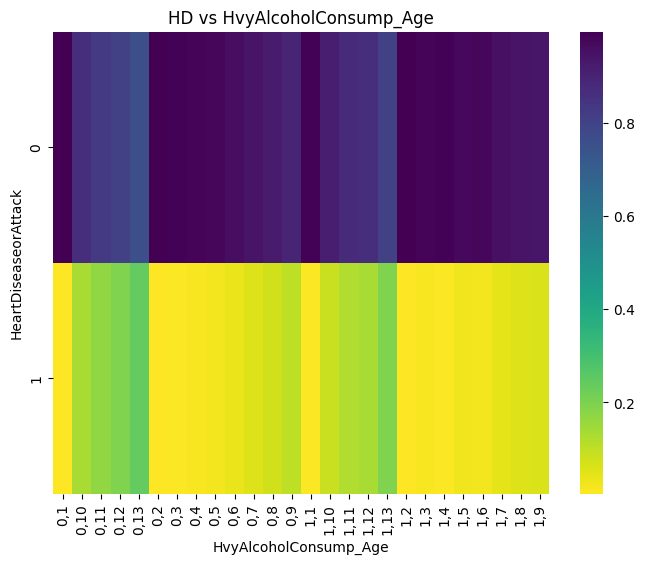

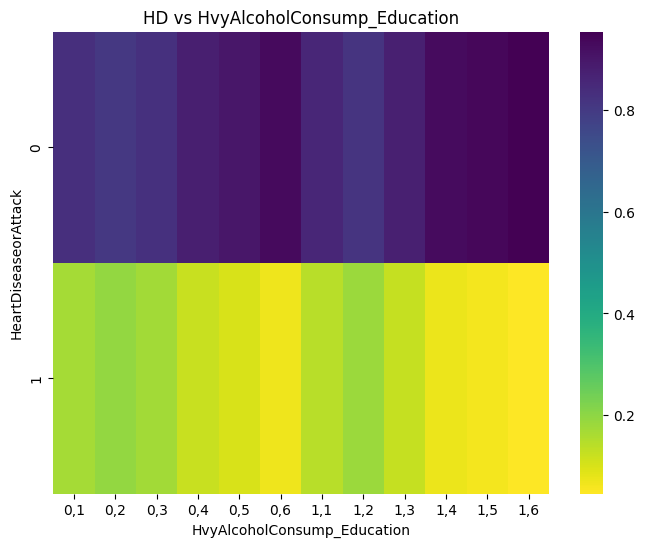

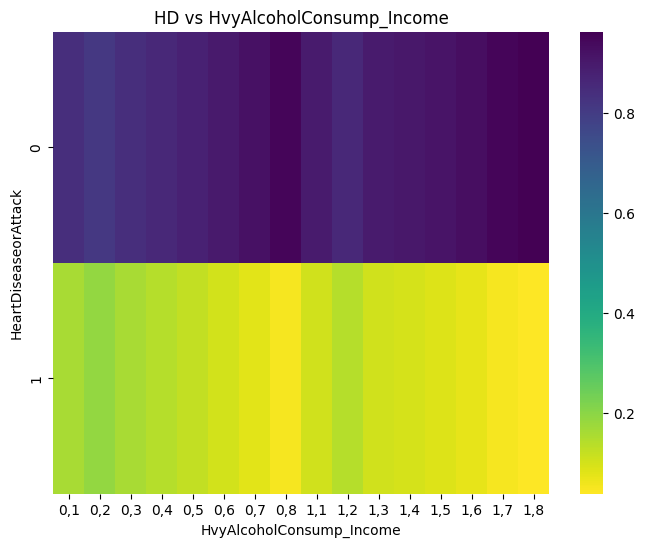

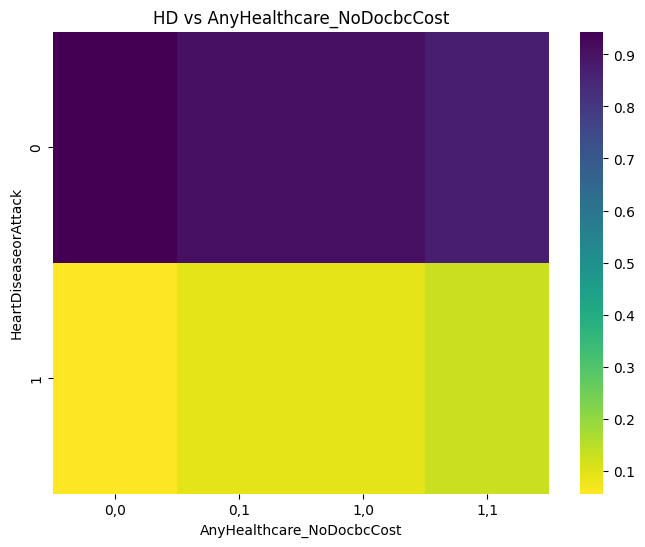

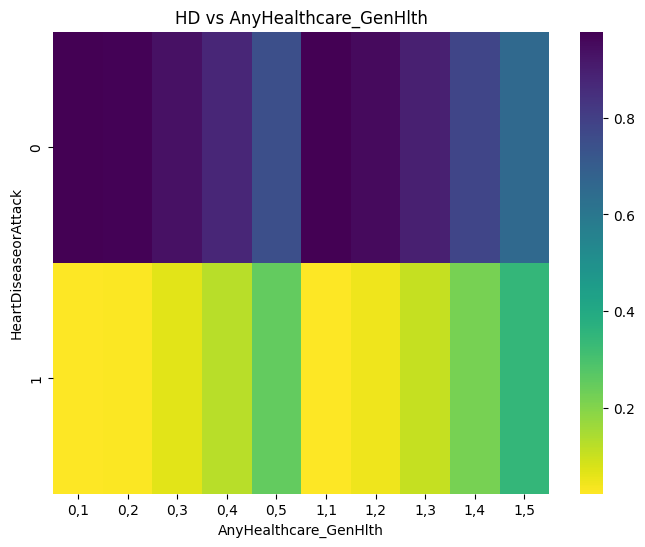

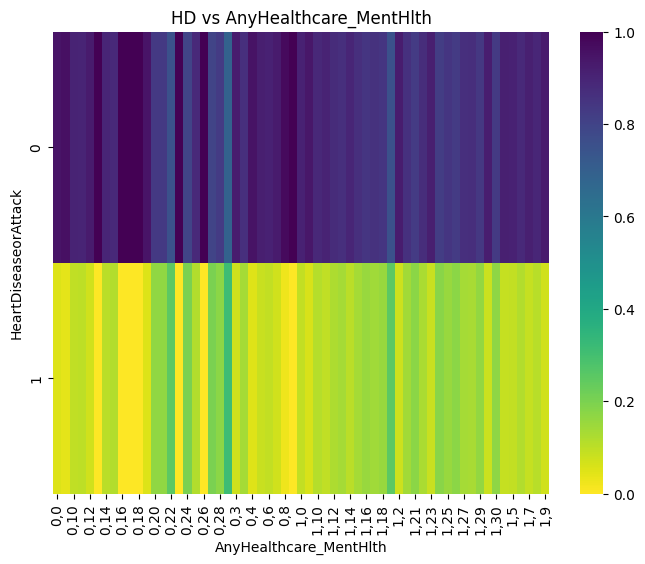

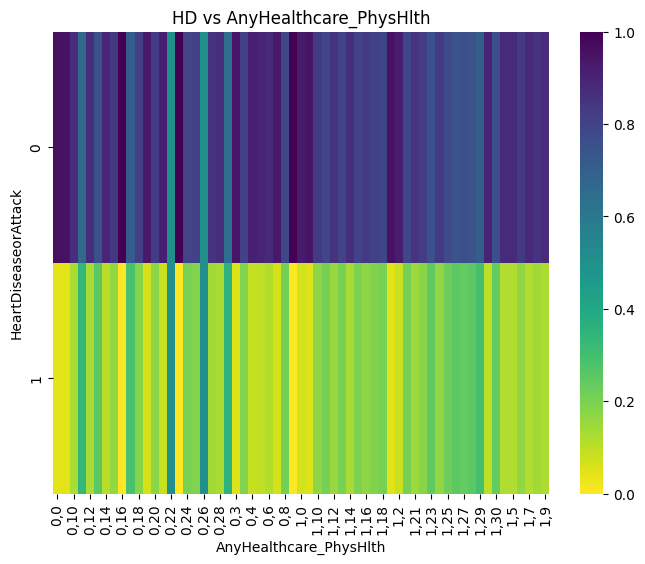

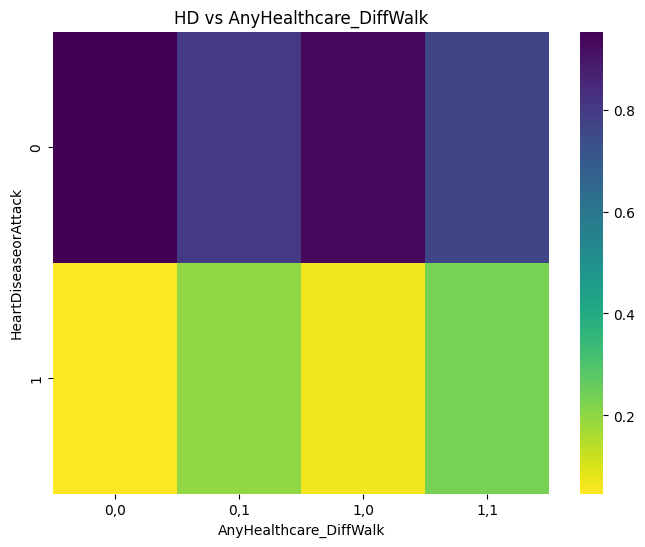

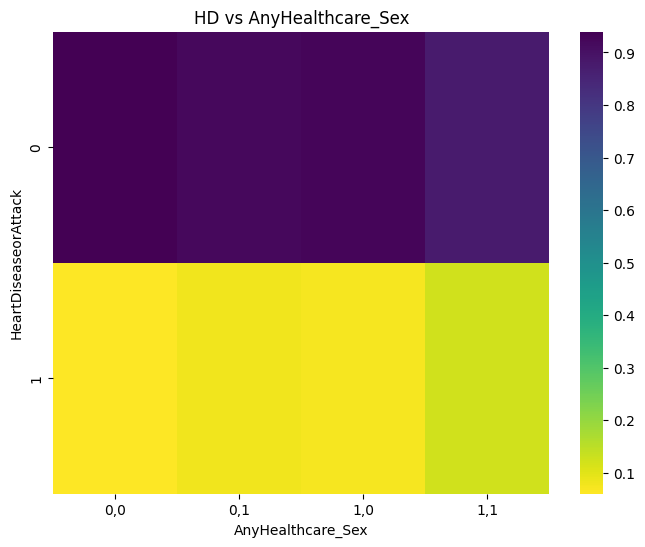

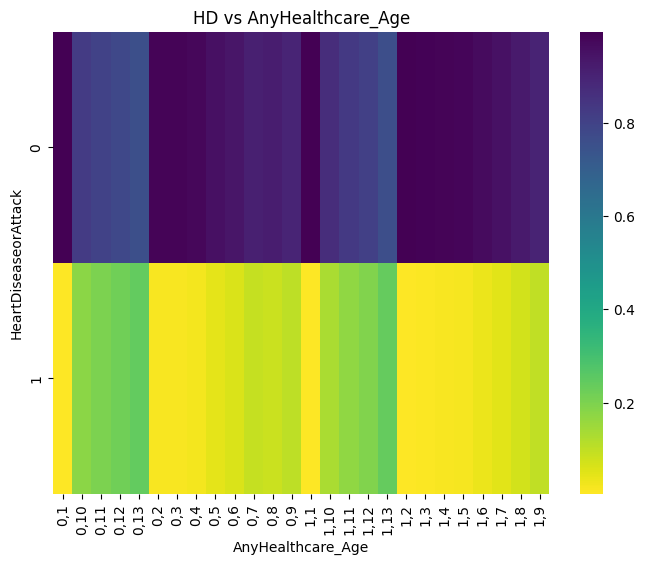

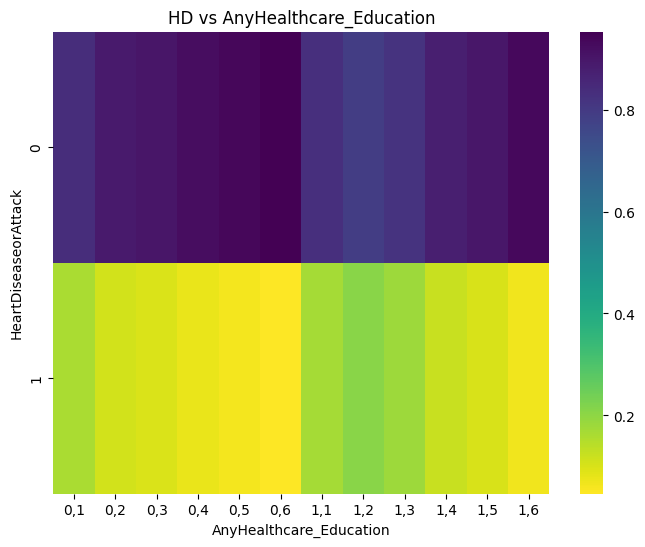

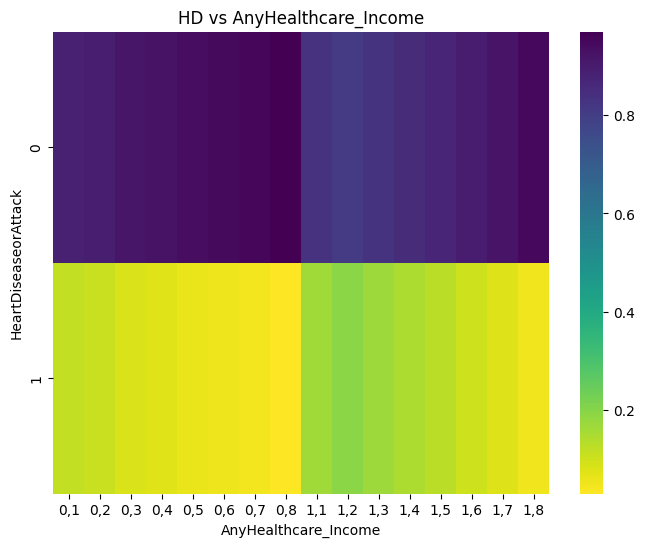

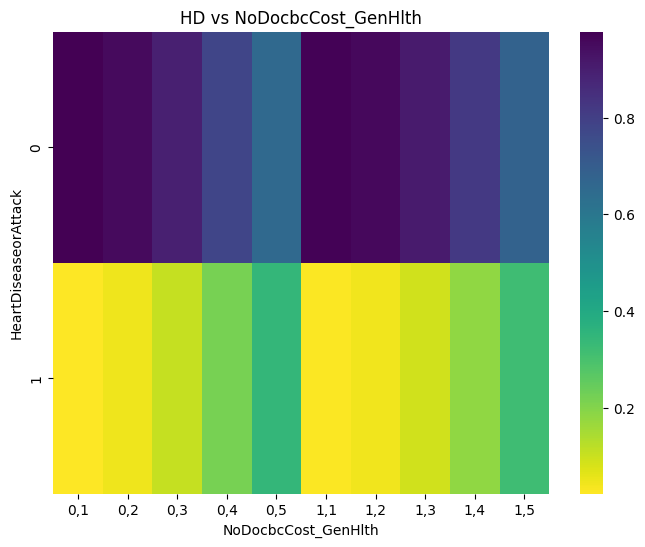

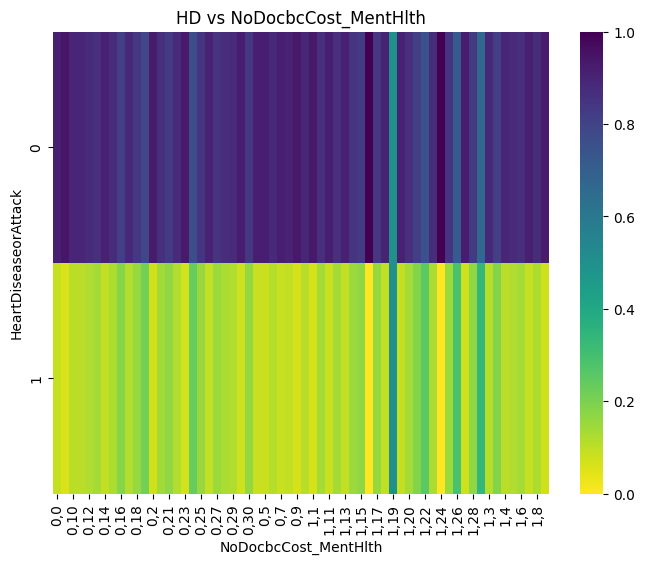

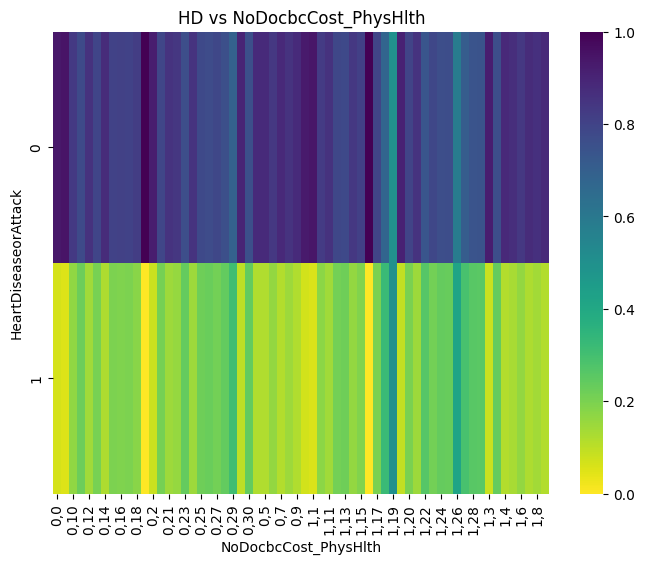

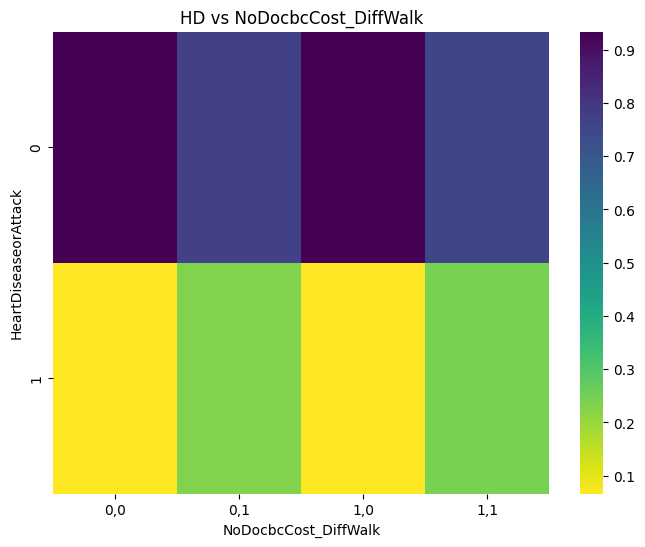

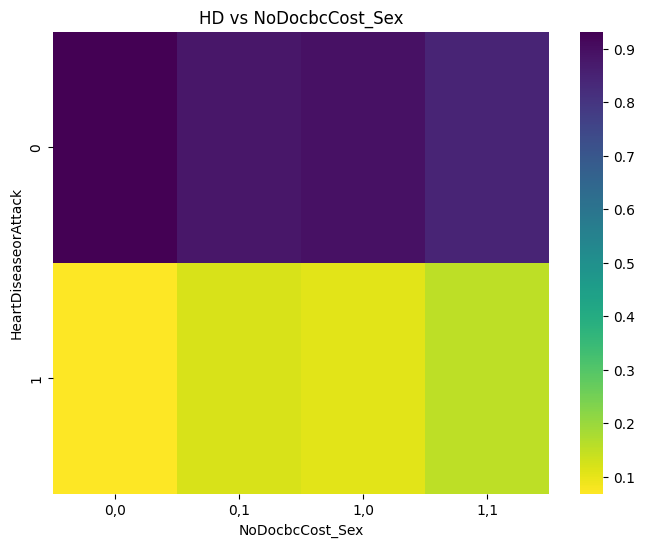

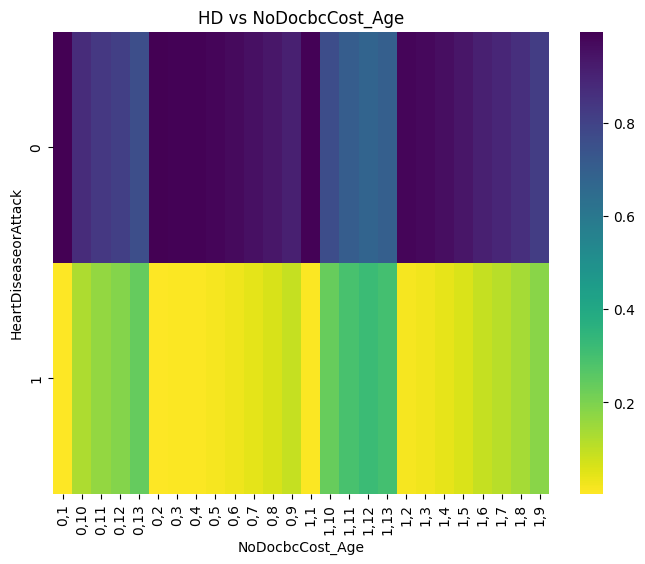

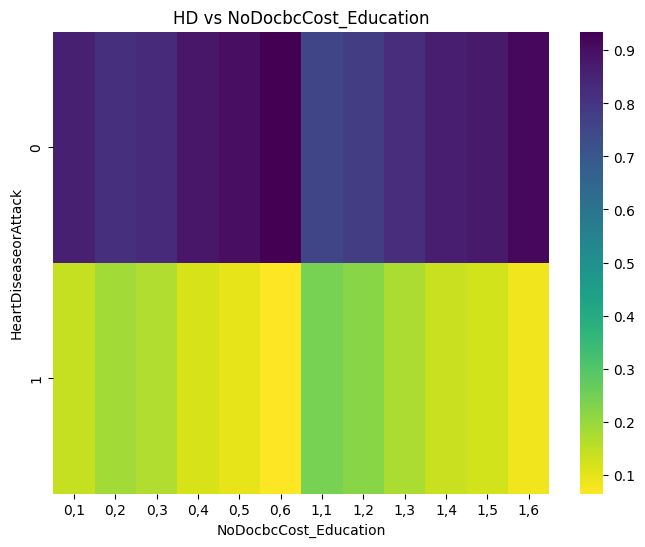

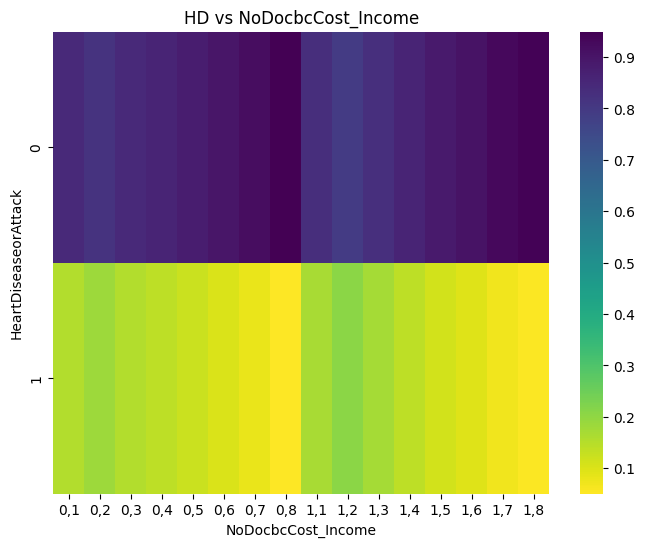

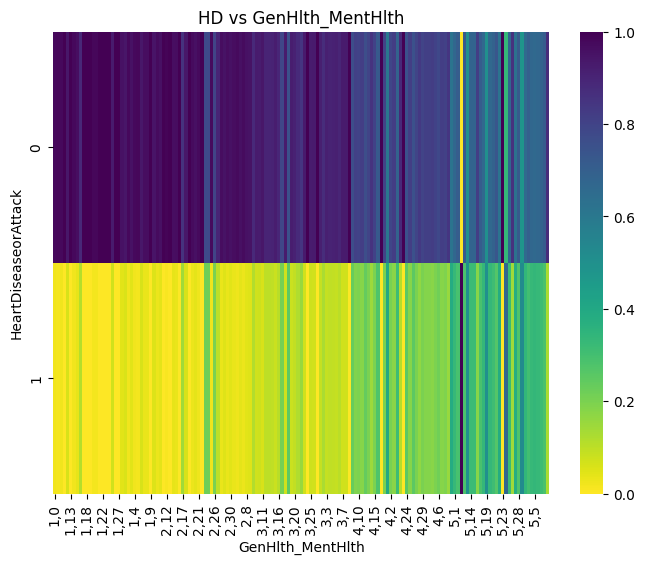

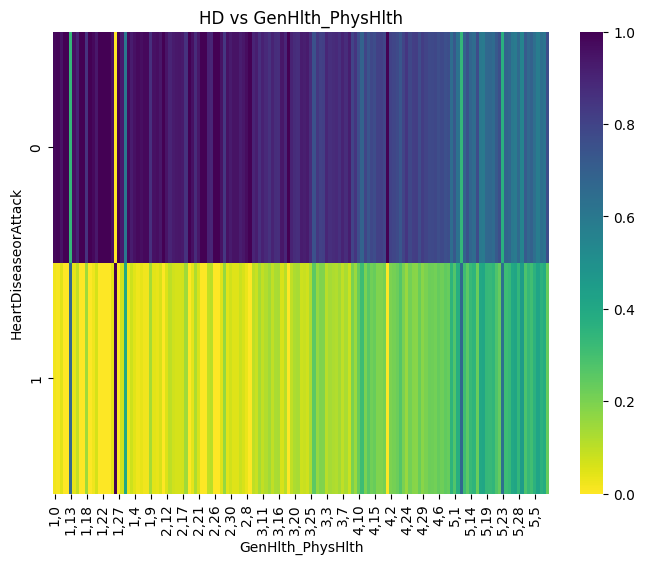

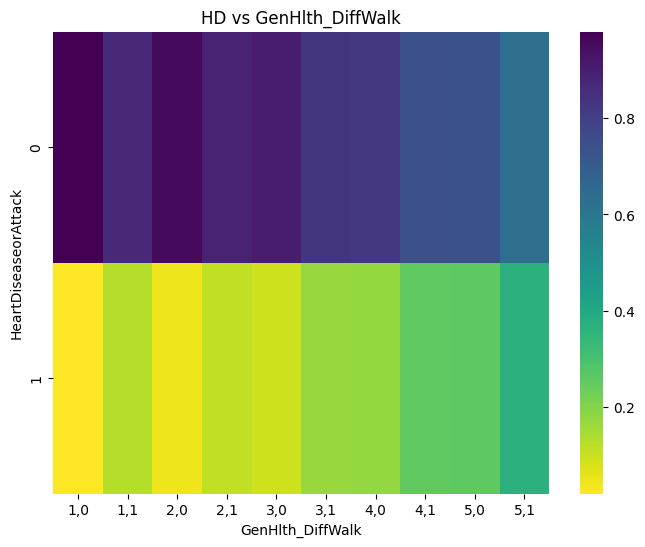

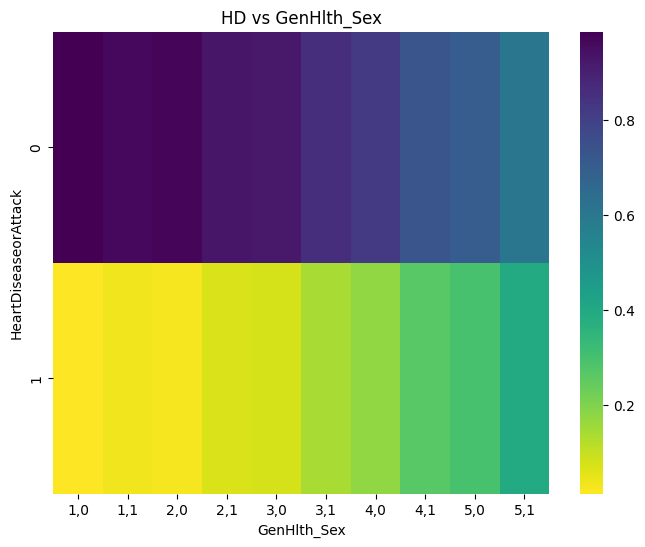

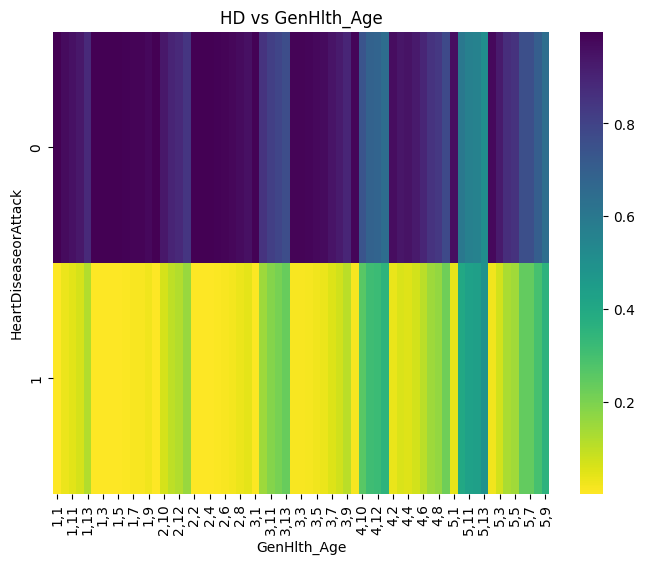

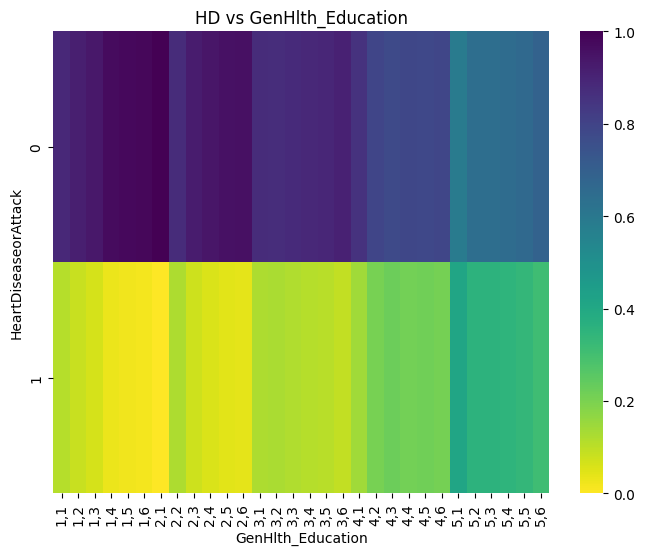

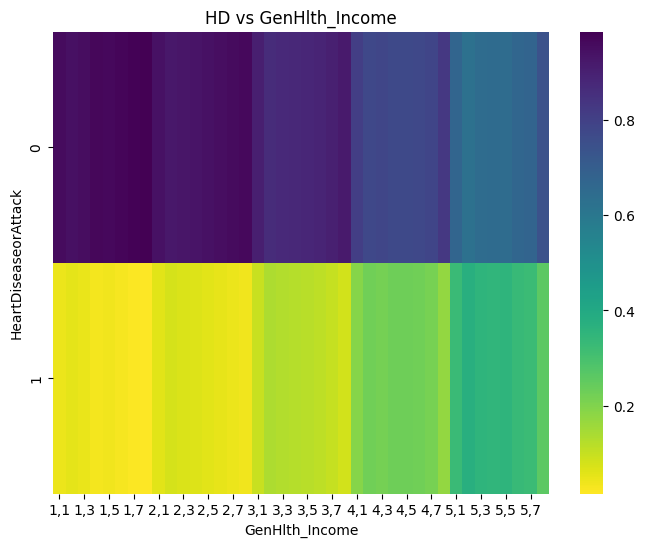

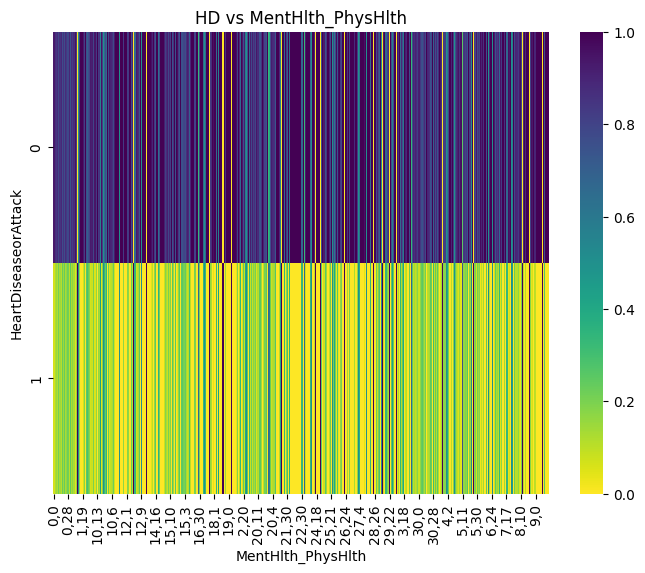

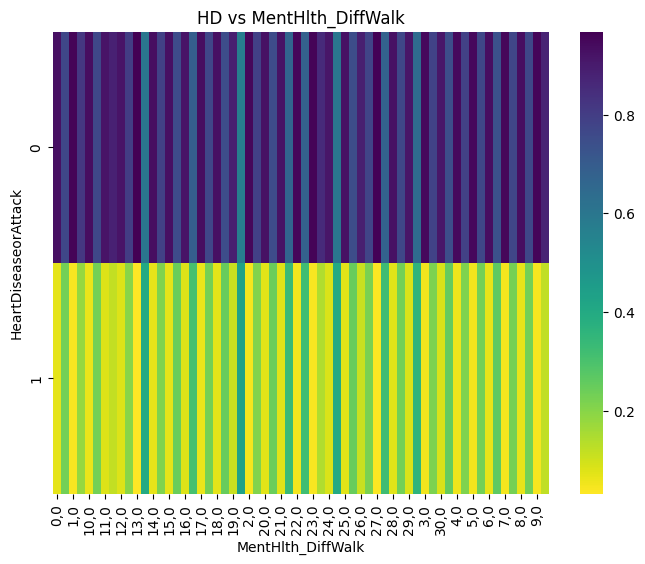

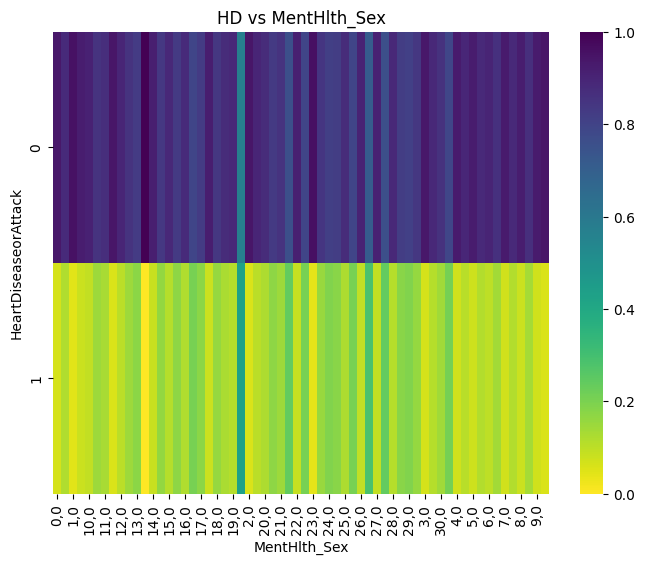

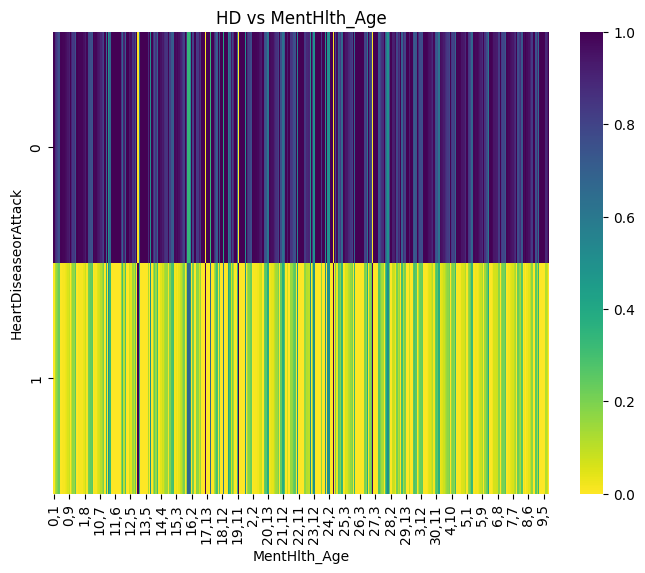

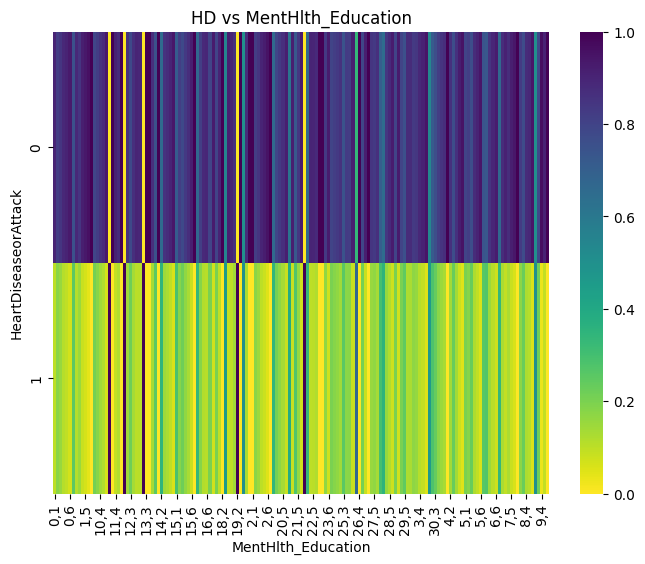

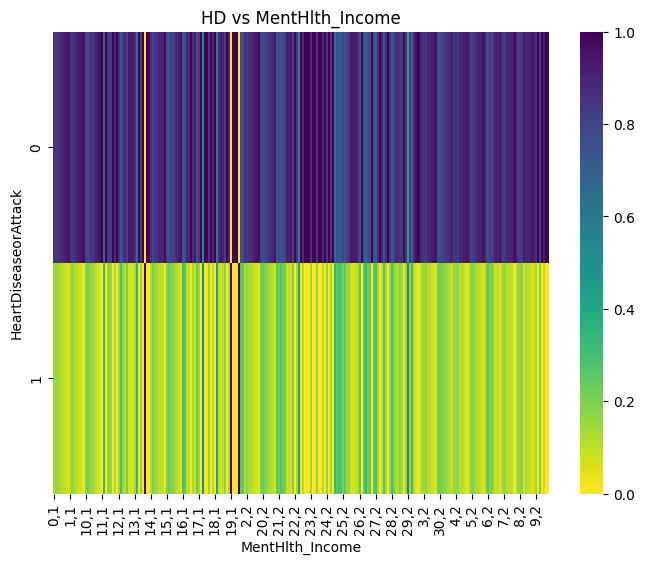

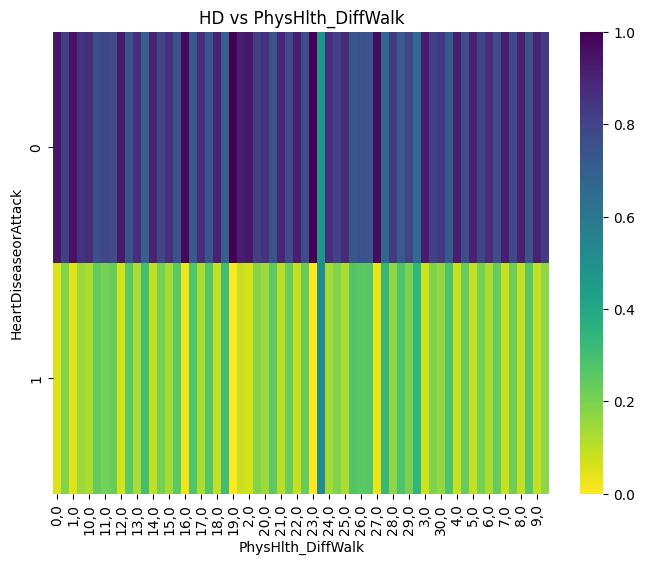

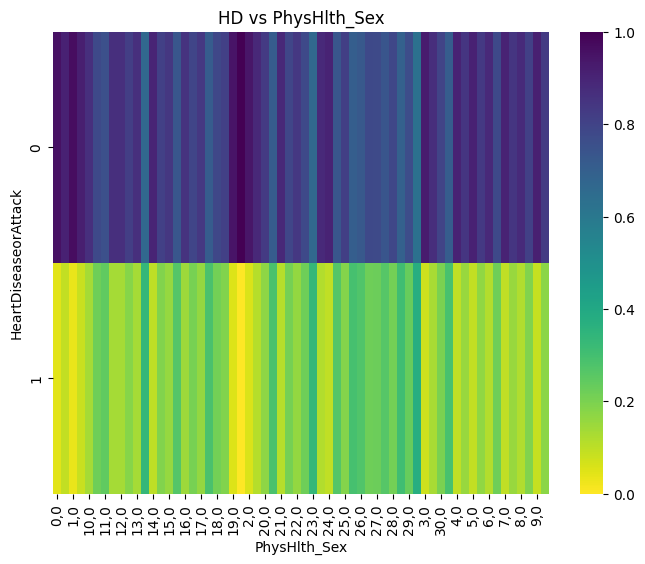

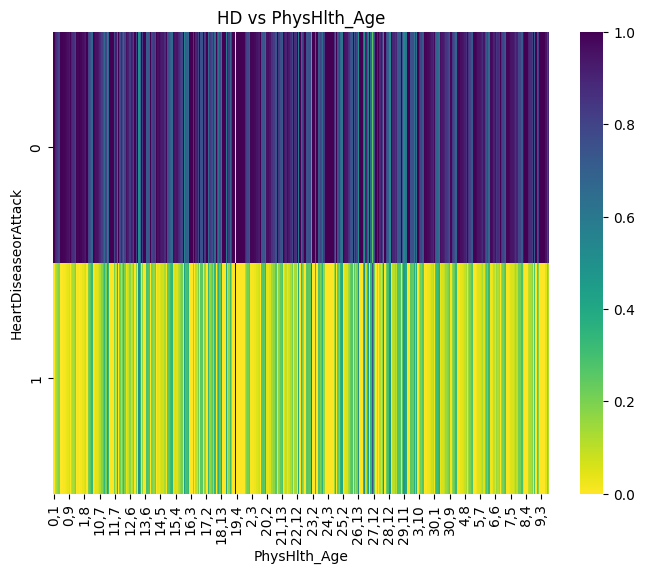

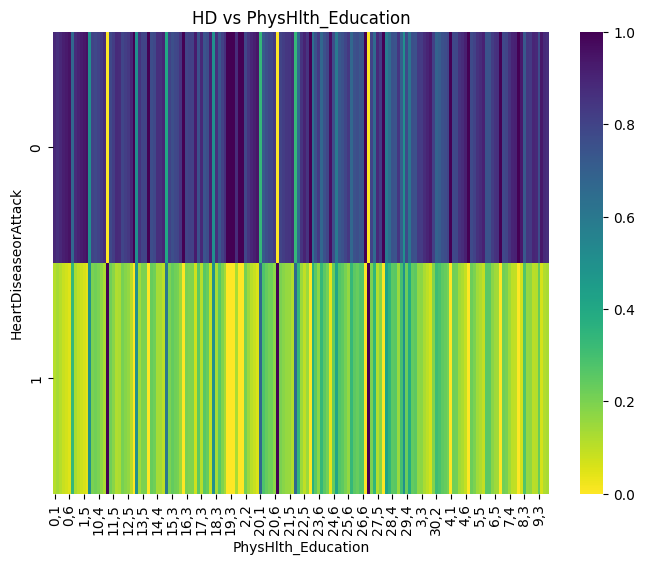

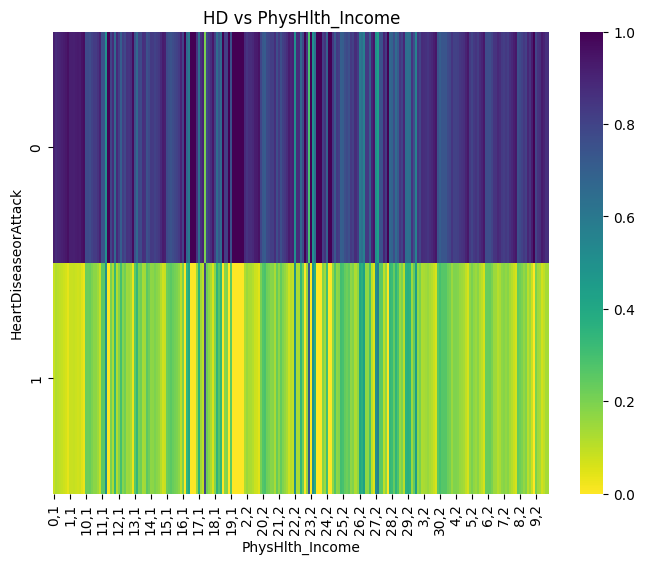

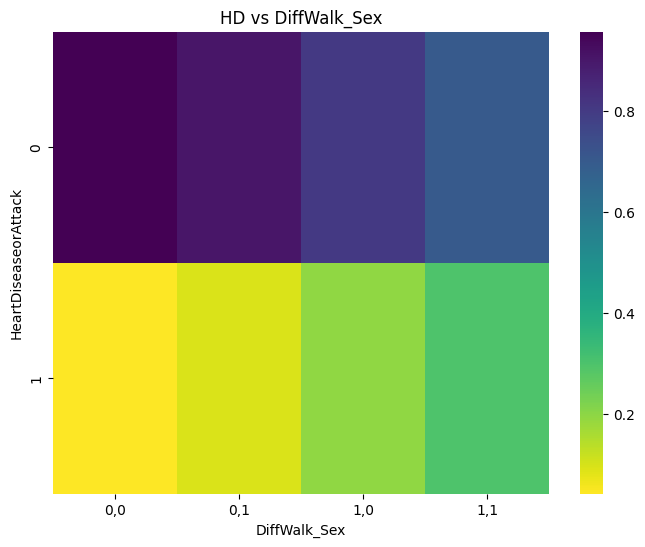

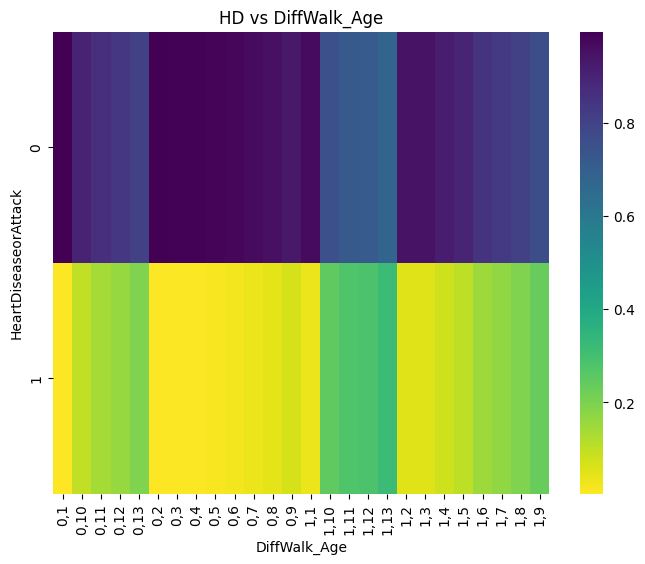

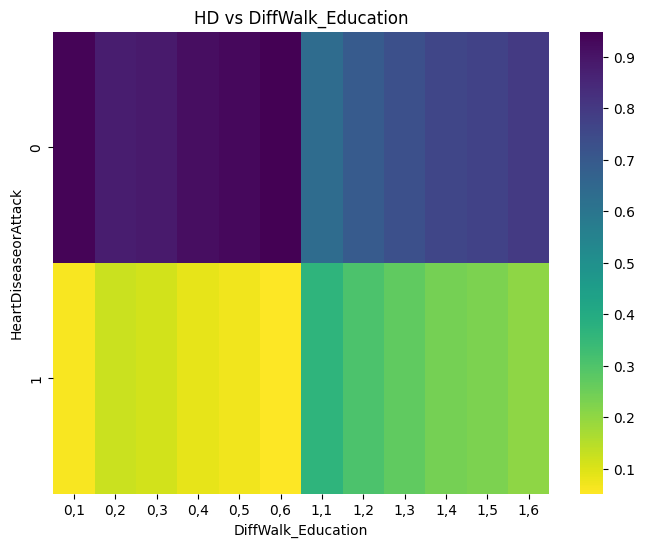

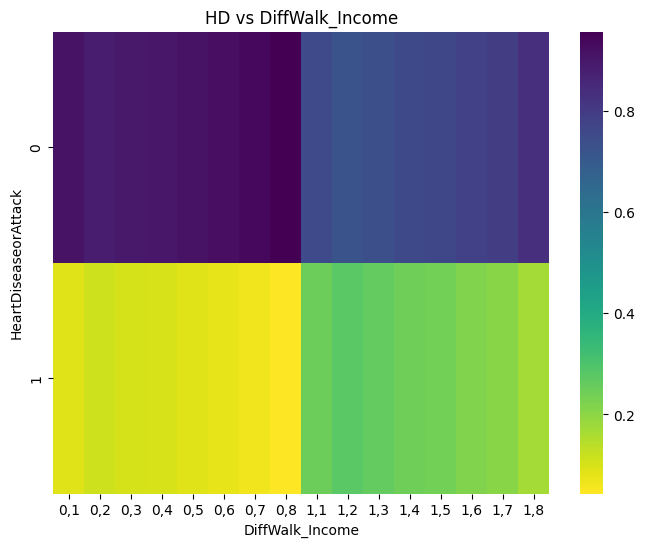

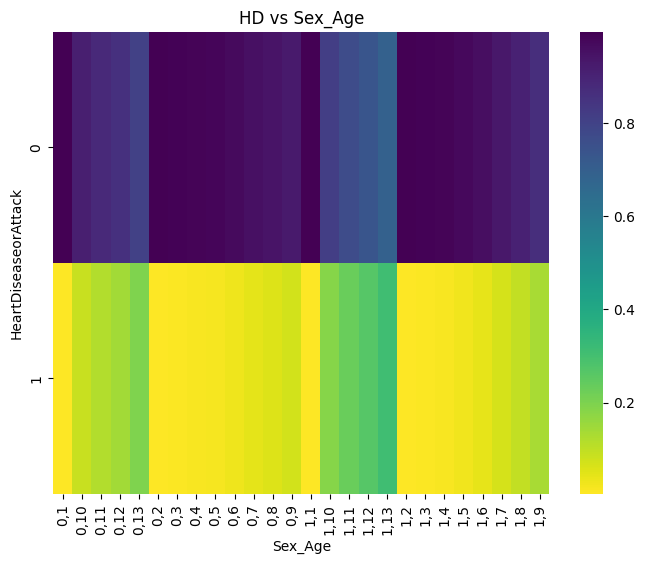

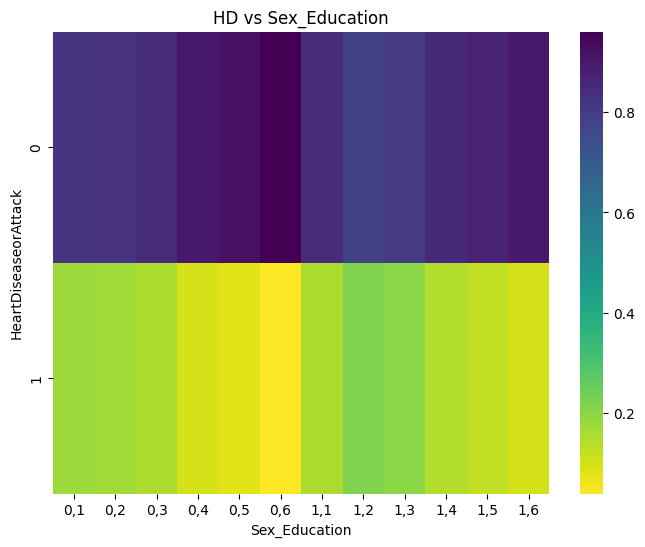

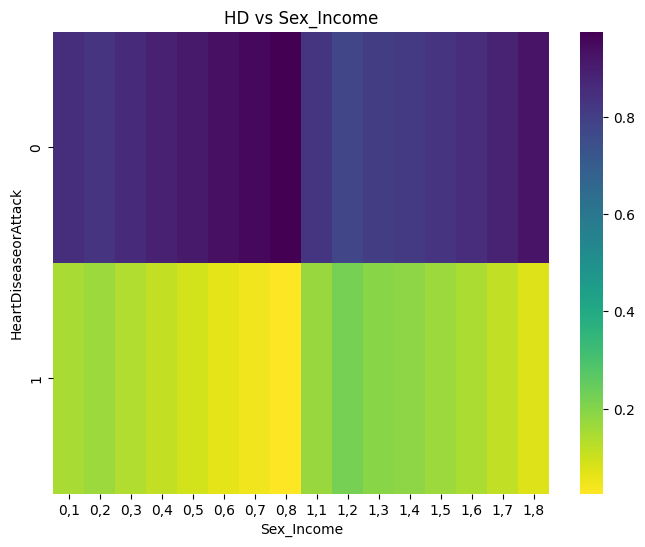

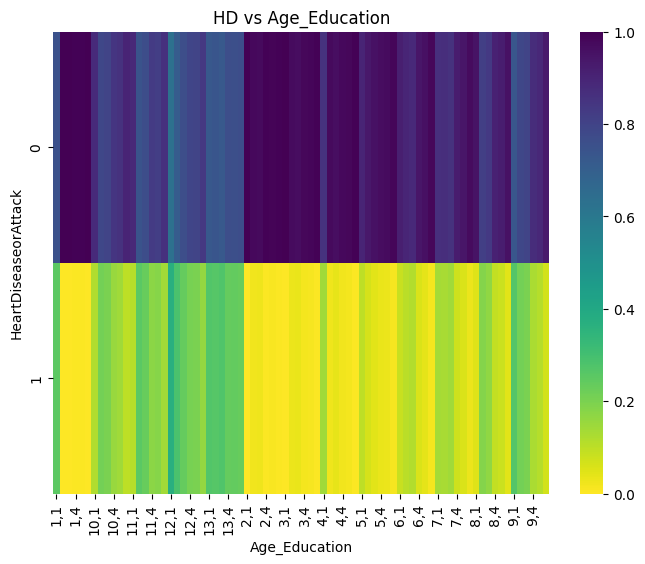

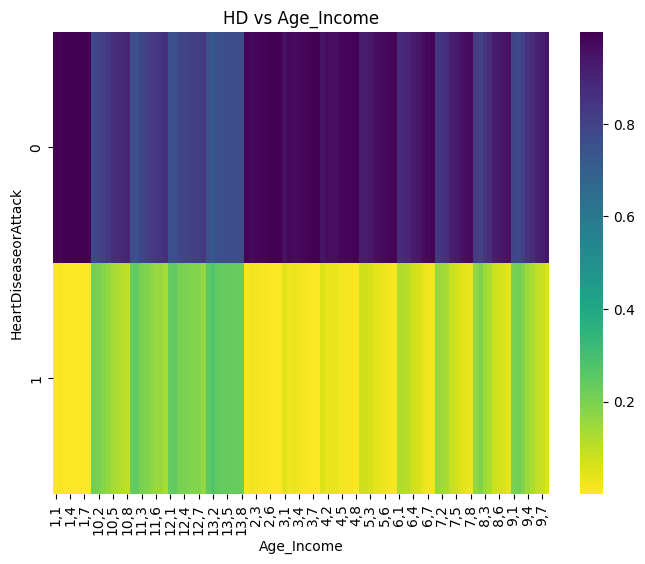

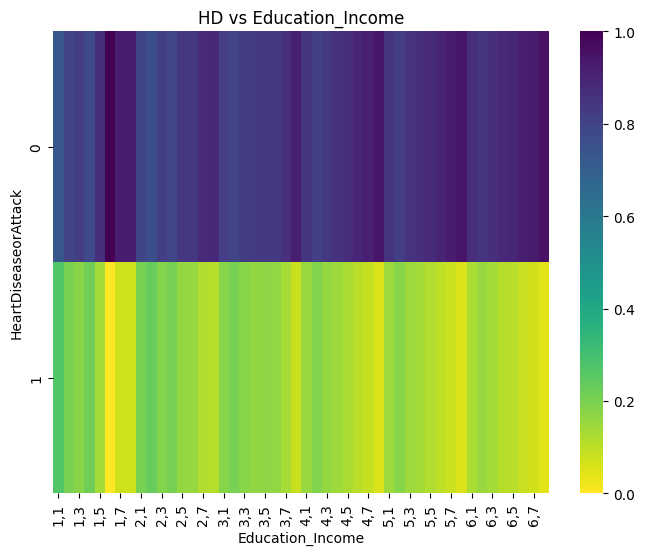

In [8]:
# Loop through each column in n_df and create heatmap
for col in n_df.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df['HeartDiseaseorAttack'], n_df[col], normalize='columns')
    
    
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(contingency_table, cmap='viridis_r')
    plt.title("HD vs " + col)
    plt.show()

In [46]:
#Extract Age groups
df_age = n_df.filter(regex='Age')
df_age.head()

HighBP_Age HighChol_Age CholCheck_Age BMI_Age Smoker_Age Stroke_Age  \
0        1,9          1,9           1,9    40,9        1,9        0,9   
1        0,7          0,7           0,7    25,7        1,7        0,7   
2        1,9          1,9           1,9    28,9        0,9        0,9   
3       1,11         0,11          1,11   27,11       0,11       0,11   
4       1,11         1,11          1,11   24,11       0,11       0,11   

  Diabetes_Age PhysActivity_Age Fruits_Age Veggies_Age HvyAlcoholConsump_Age  \
0          0,9              0,9        0,9         1,9                   0,9   
1          0,7              1,7        0,7         0,7                   0,7   
2          0,9              0,9        1,9         0,9                   0,9   
3         0,11             1,11       1,11        1,11                  0,11   
4         0,11             1,11       1,11        1,11                  0,11   

  AnyHealthcare_Age NoDocbcCost_Age GenHlth_Age MentHlth_Age PhysHlth_Age  \
0               1,9             0,9         5,9         18,9         15,9   
1               0,7             1,7         3,7          0,7          0,7   
2               1,9             1,9         5,9         30,9         30,9   
3              1,11            0,11        2,11         0,11         0,11   
4              1,11            0,11        2,11         3,11         0,11   

  DiffWalk_Age Sex_Age Age_Education Age_Income  
0          1,9     0,9           9,4        9,3  
1          0,7     0,7           7,6        7,1  
2          1,9     0,9           9,4        9,8  
3         0,11    0,11          11,3       11,6  
4         0,11    0,11          11,5       11,4

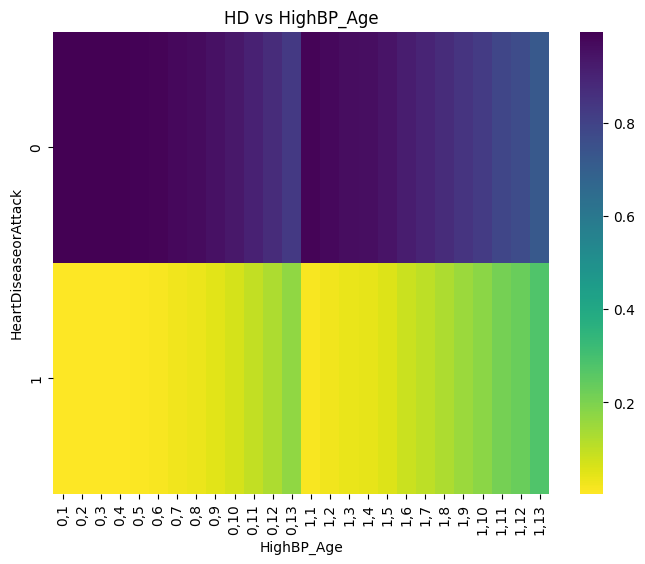

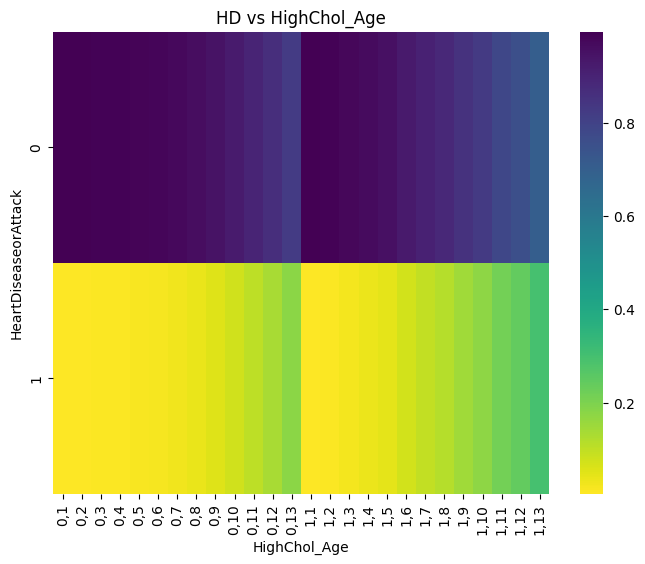

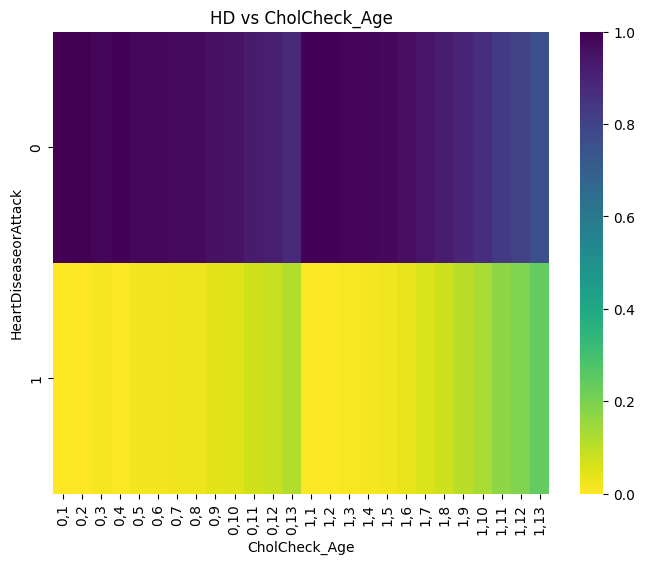

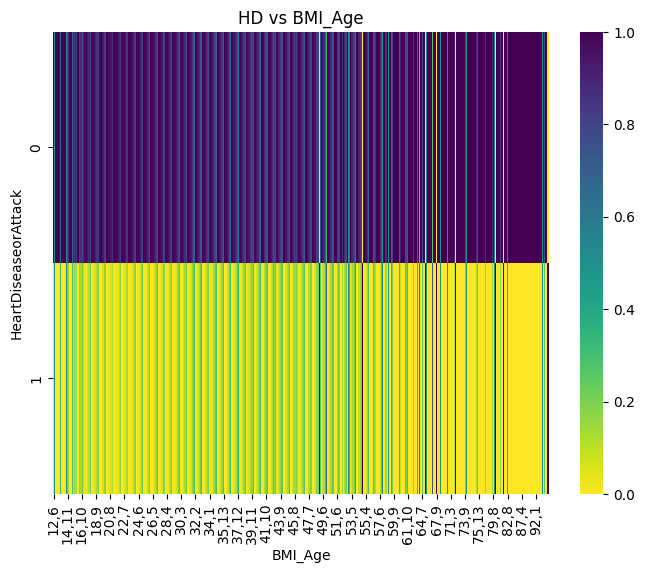

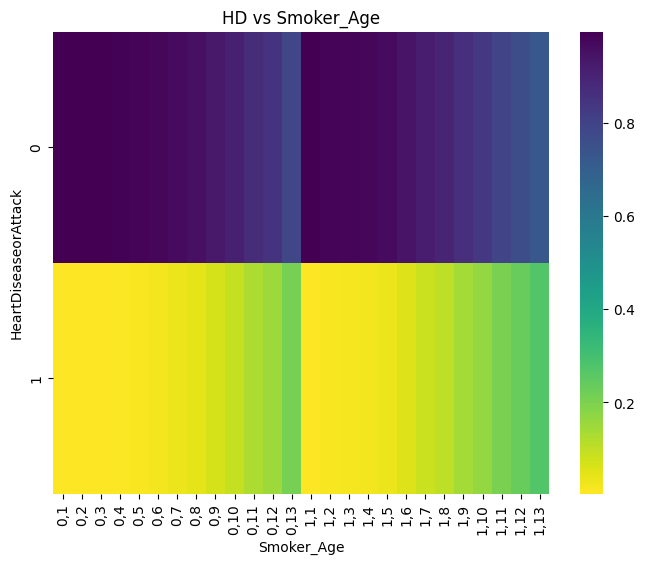

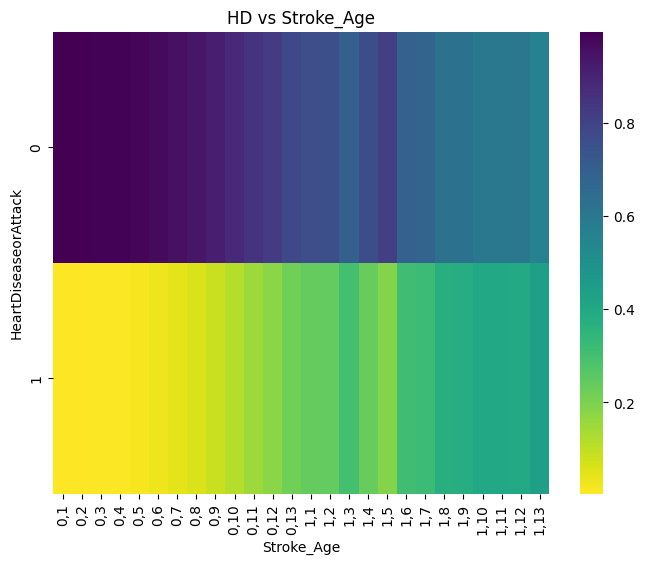

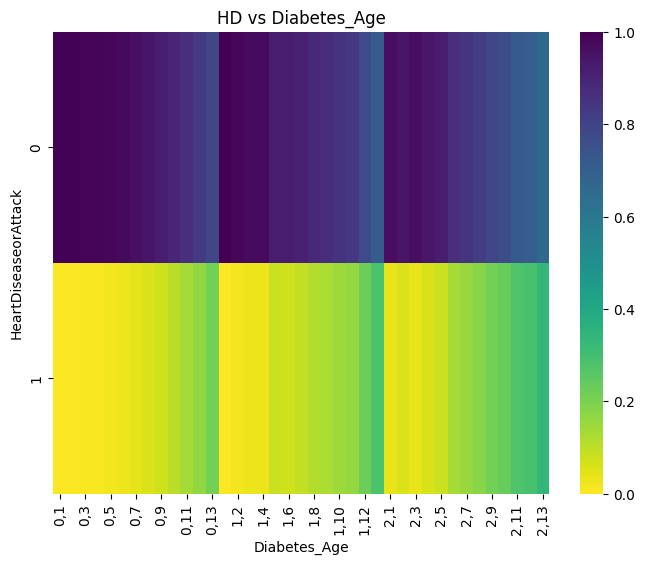

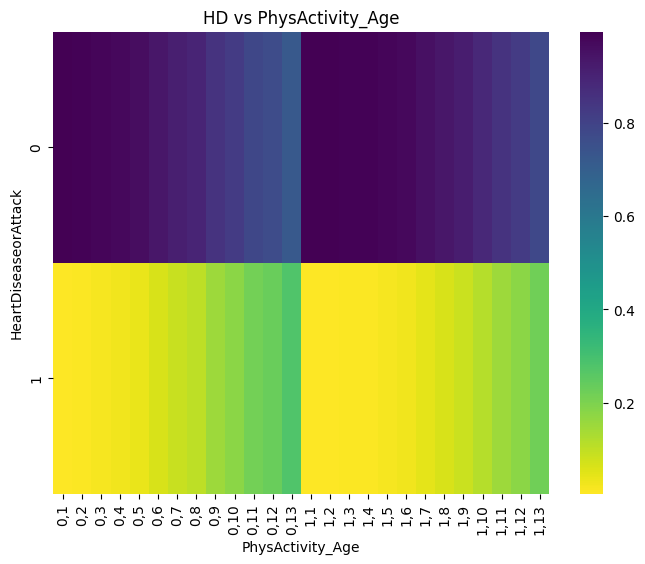

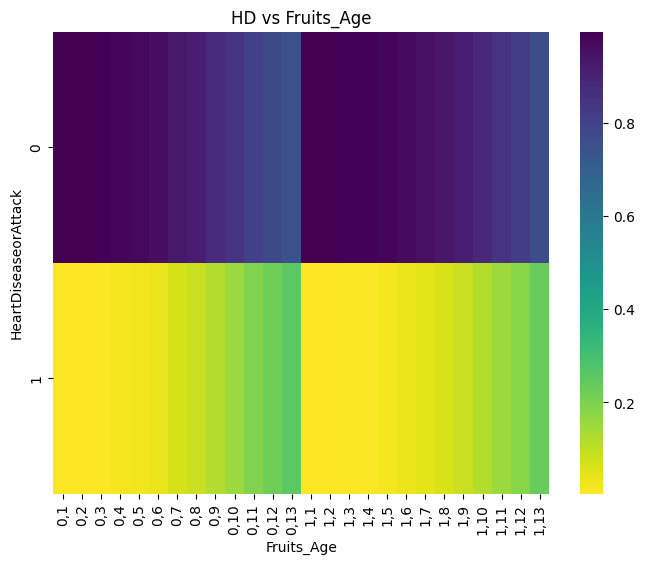

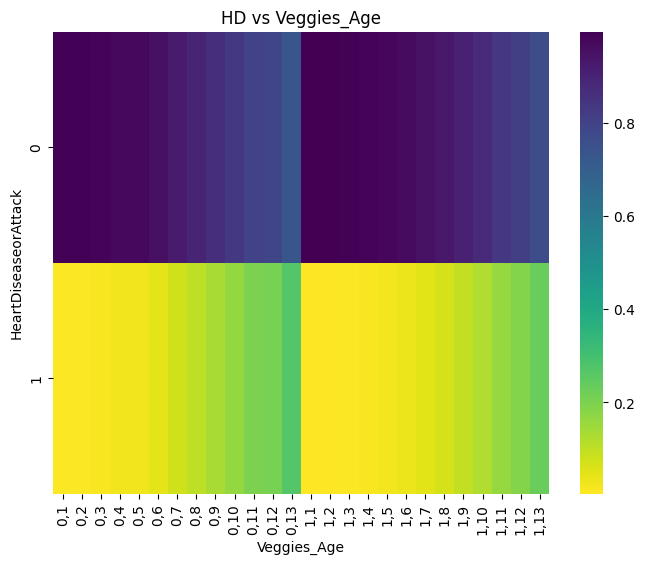

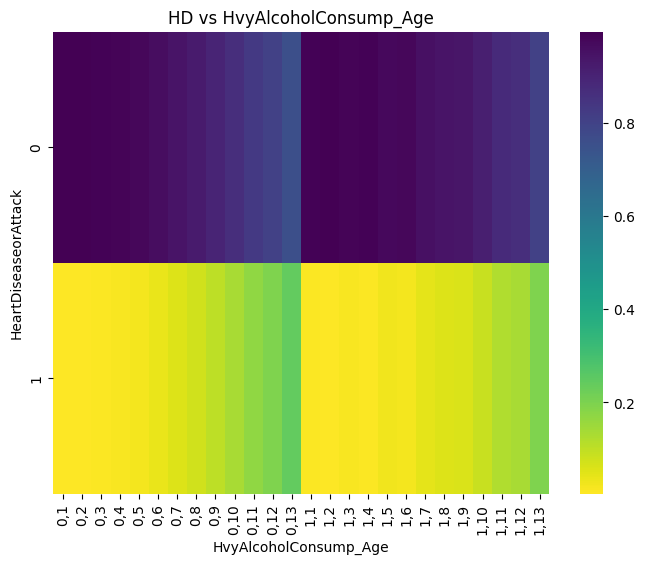

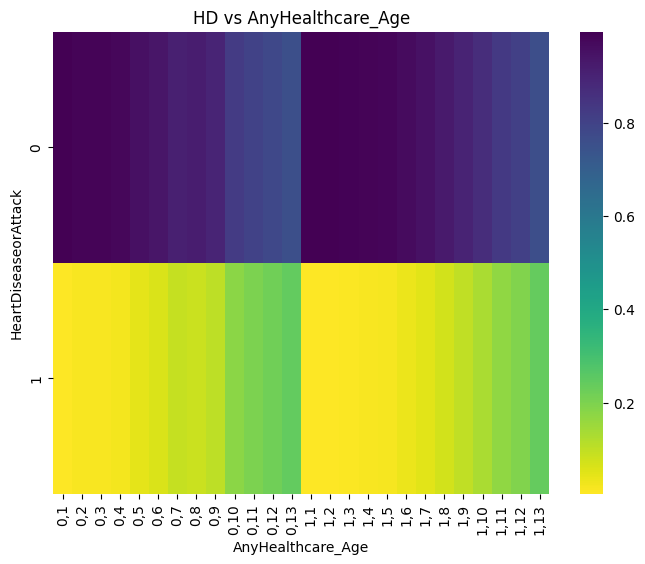

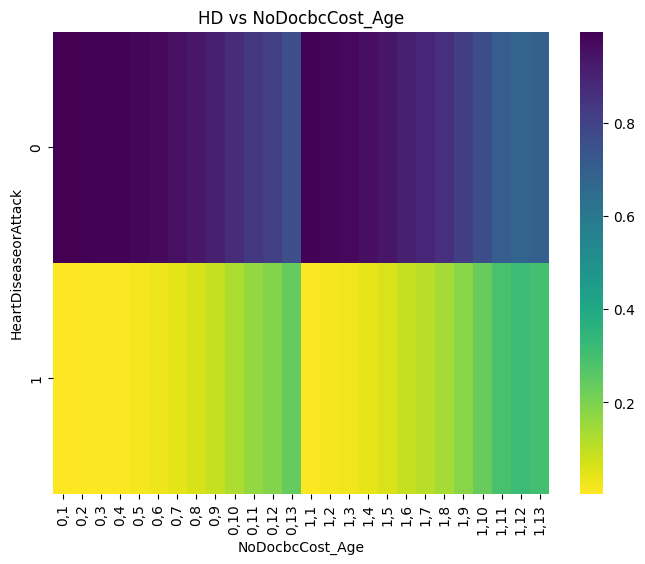

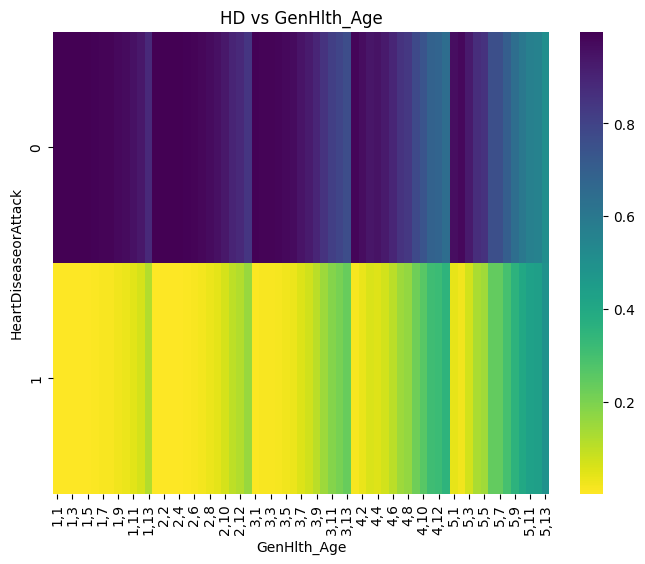

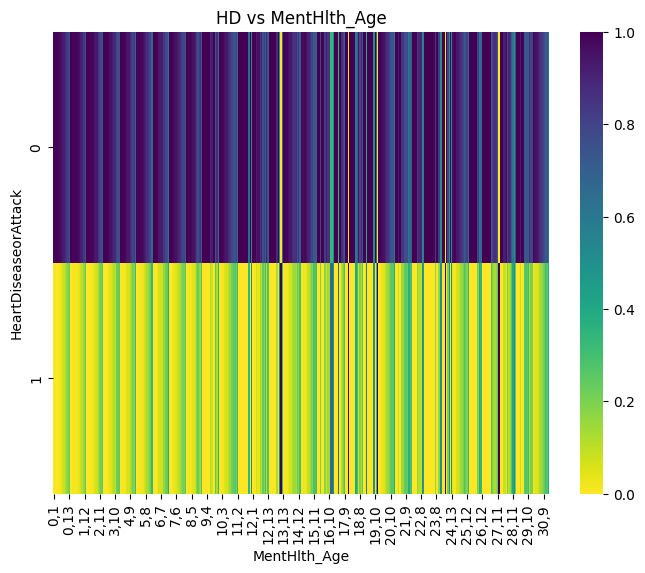

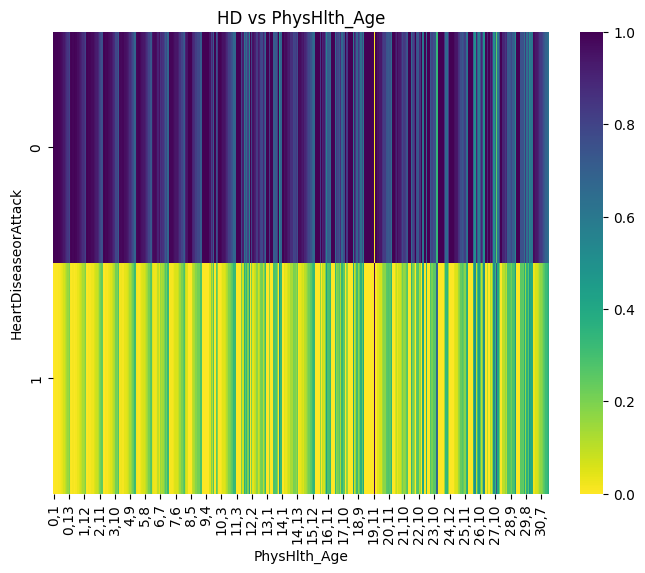

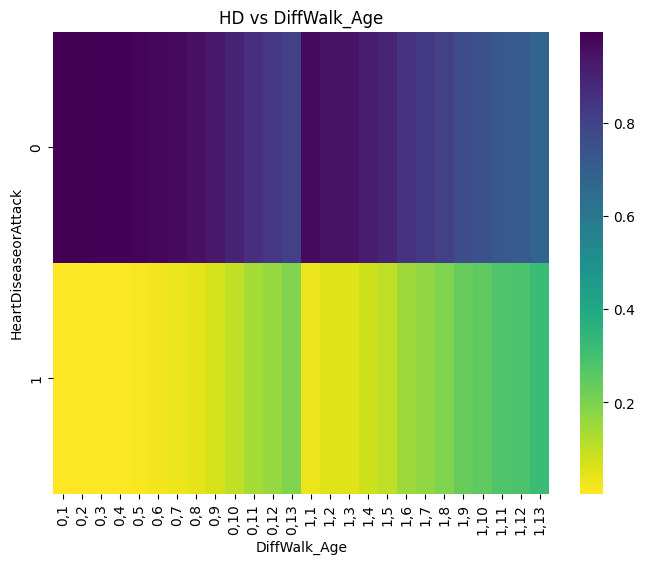

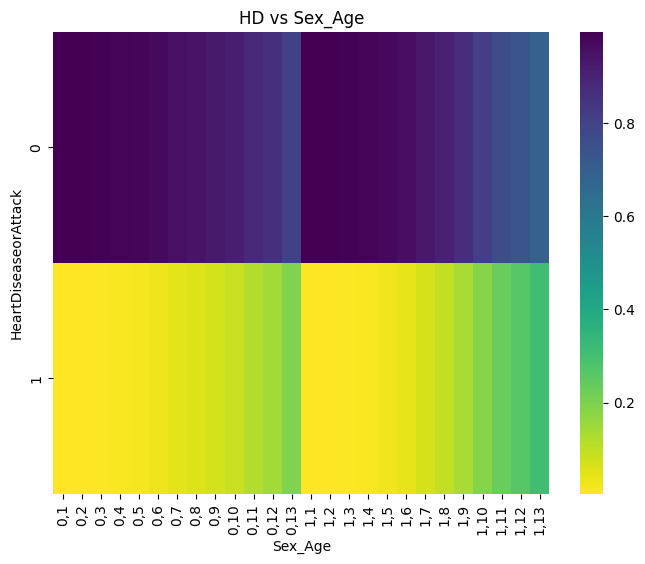

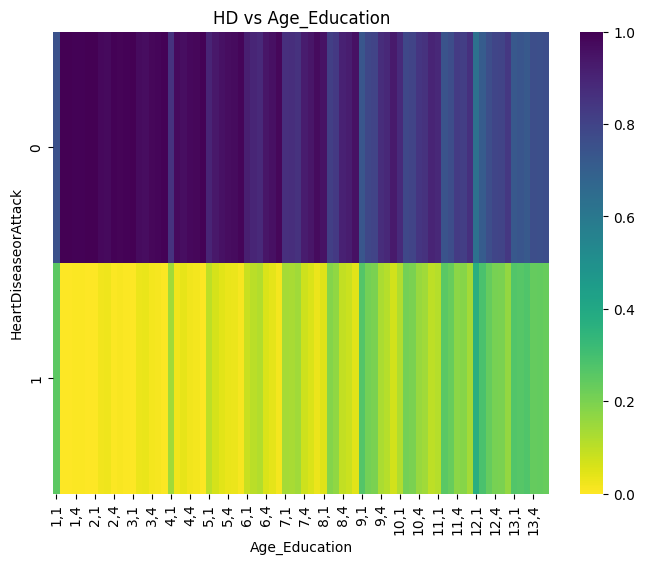

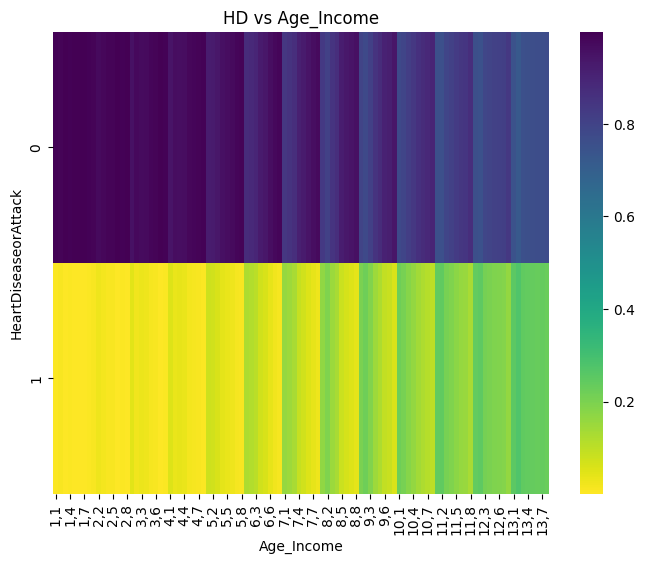

In [83]:
# Loop through each column in Ages and create heatmap
for col in df_age.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df_age[col], df['HeartDiseaseorAttack'], normalize='index')
    
    indname = contingency_table.index.astype(str)
    
    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))
    
    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]
    
    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T

    #sorted_table.T
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD vs " + col)
    plt.show()

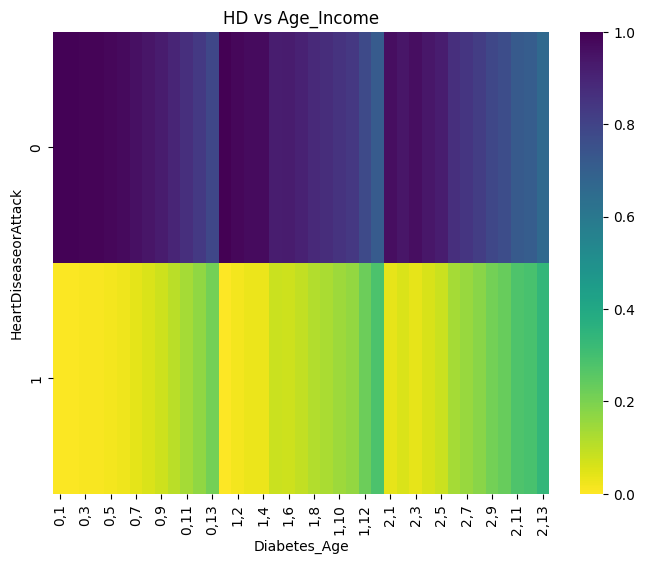

In [68]:
# Create heatmap using seaborn
plt.figure(figsize = (8,6))
sns.heatmap(sorted_table.T, cmap='viridis_r')
plt.title("HD vs " + col)
plt.show()

In [13]:
#Extract BMI groups
df_bmi = n_df.filter(regex='BMI')
df_bmi

HighBP_BMI HighChol_BMI CholCheck_BMI BMI_Smoker BMI_Stroke  \
0             1,4          1,4           1,4        4,1        4,0   
1             0,3          0,3           0,3        3,1        3,0   
2             1,3          1,3           1,3        3,0        3,0   
3             1,3          0,3           1,3        3,0        3,0   
4             1,2          1,2           1,2        2,0        2,0   
...           ...          ...           ...        ...        ...   
253675        1,4          1,4           1,4        4,0        4,0   
253676        1,1          1,1           1,1        1,0        1,0   
253677        0,3          0,3           1,3        3,0        3,0   
253678        1,2          0,2           1,2        2,0        2,0   
253679        1,3          1,3           1,3        3,0        3,0   

       BMI_Diabetes BMI_PhysActivity BMI_Fruits BMI_Veggies  \
0               4,0              4,0        4,0         4,1   
1               3,0              3,1        3,0         3,0   
2               3,0              3,0        3,1         3,0   
3               3,0              3,1        3,1         3,1   
4               2,0              2,1        2,1         2,1   
...             ...              ...        ...         ...   
253675          4,0              4,0        4,1         4,1   
253676          1,2              1,0        1,0         1,0   
253677          3,0              3,1        3,1         3,0   
253678          2,0              2,0        2,1         2,1   
253679          3,2              3,1        3,1         3,0   

       BMI_HvyAlcoholConsump BMI_AnyHealthcare BMI_NoDocbcCost BMI_GenHlth  \
0                        4,0               4,1             4,0         4,5   
1                        3,0               3,0             3,1         3,3   
2                        3,0               3,1             3,1         3,5   
3                        3,0               3,1             3,0         3,2   
4                        2,0               2,1             2,0         2,2   
...                      ...               ...             ...         ...   
253675                   4,0               4,1             4,0         4,3   
253676                   1,0               1,1             1,0         1,4   
253677                   3,0               3,1             3,0         3,1   
253678                   2,0               2,1             2,0         2,3   
253679                   3,0               3,1             3,0         3,2   

       BMI_MentHlth BMI_PhysHlth BMI_DiffWalk BMI_Sex BMI_Age BMI_Education  \
0              4,18         4,15          4,1     4,0     4,9           4,4   
1               3,0          3,0          3,0     3,0     3,7           3,6   
2              3,30         3,30          3,1     3,0     3,9           3,4   
3               3,0          3,0          3,0     3,0    3,11           3,3   
4               2,3          2,0          2,0     2,0    2,11           2,5   
...             ...          ...          ...     ...     ...           ...   
253675          4,0          4,5          4,0     4,1     4,5           4,6   
253676          1,0          1,0          1,1     1,0    1,11           1,2   
253677          3,0          3,0          3,0     3,0     3,2           3,5   
253678          2,0          2,0          2,0     2,1     2,7           2,5   
253679          3,0          3,0          3,0     3,0     3,9           3,6   

       BMI_Income  
0             4,3  
1             3,1  
2             3,8  
3             3,6  
4             2,4  
...           ...  
253675        4,7  
253676        1,4  
253677        3,2  
253678        2,1  
253679        3,2  

[253680 rows x 20 columns]

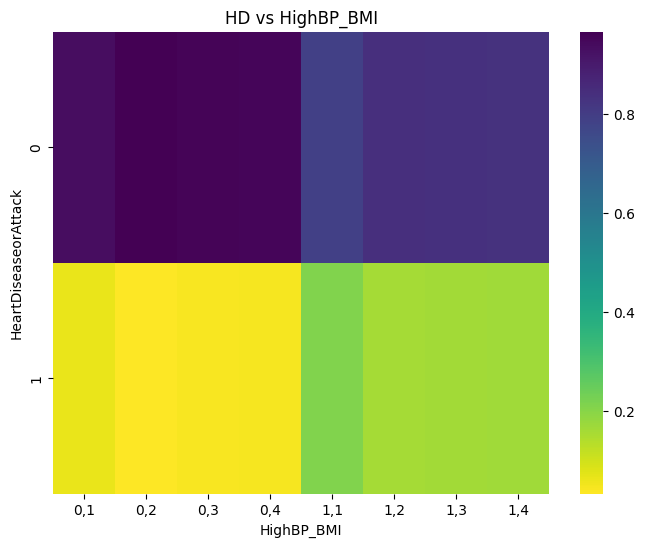

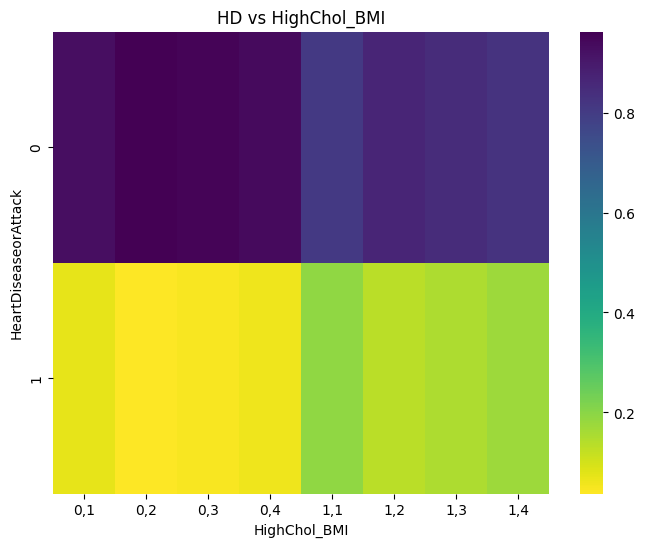

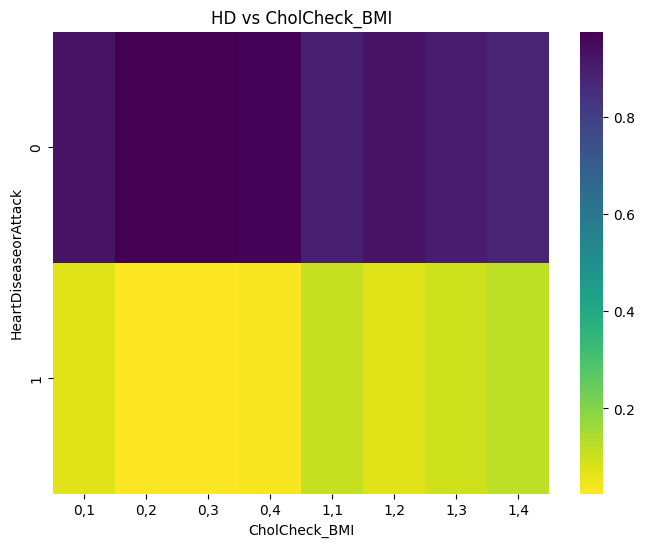

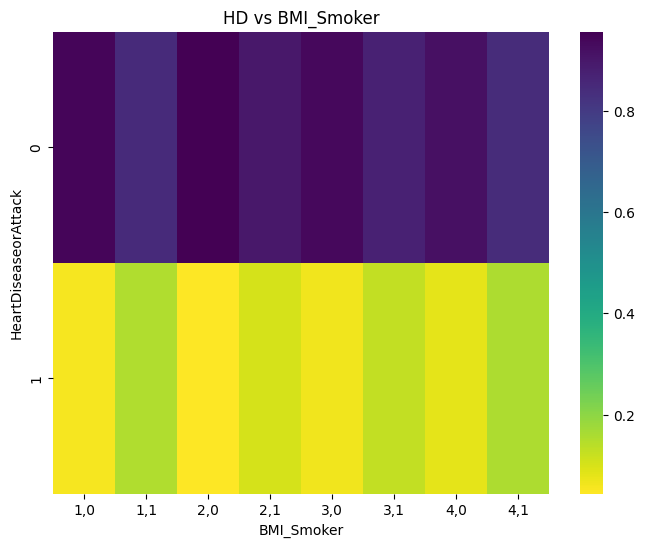

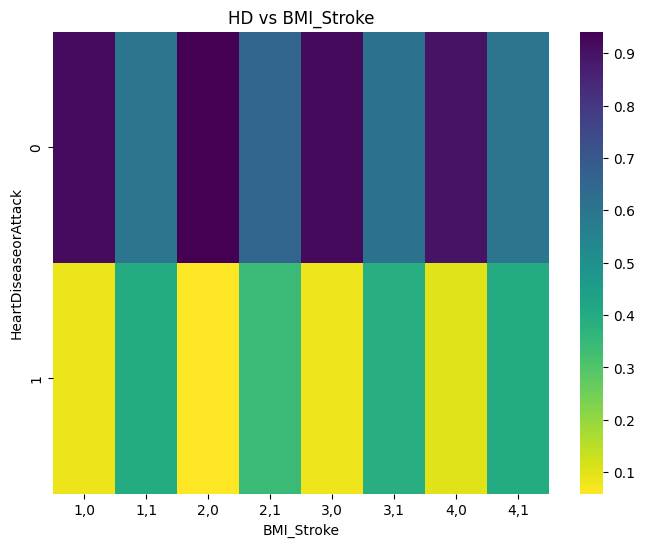

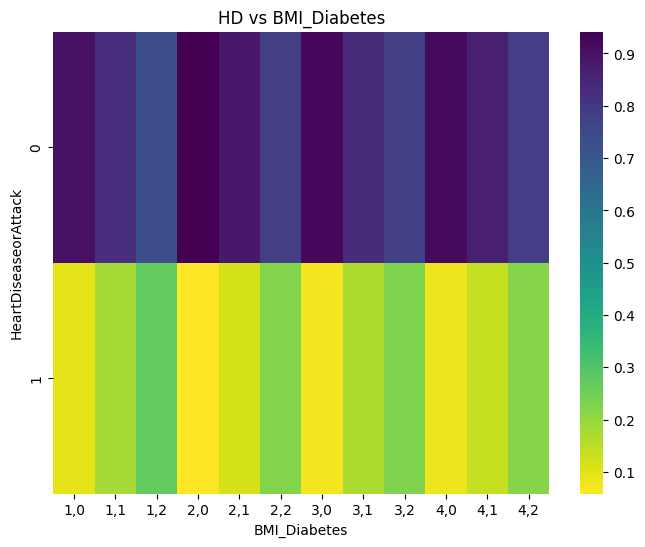

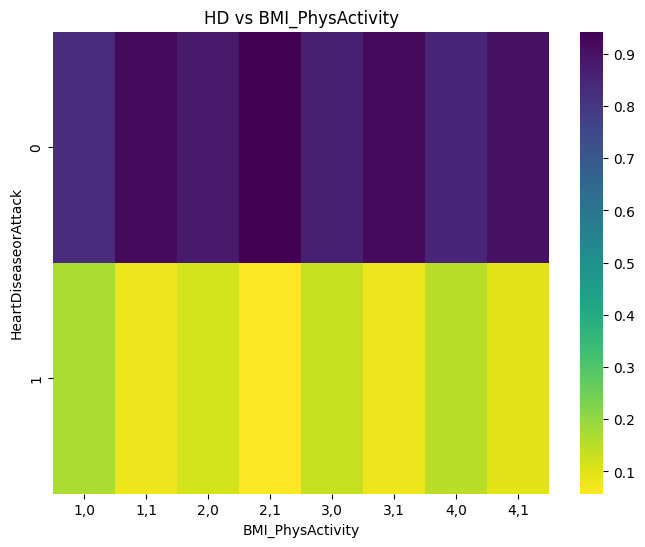

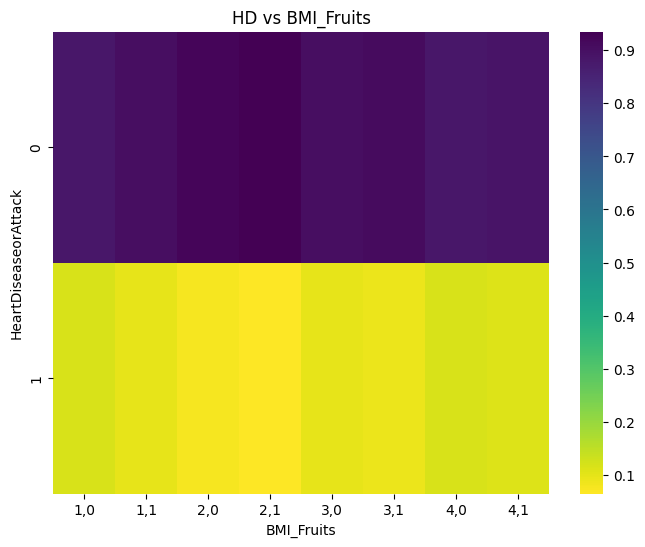

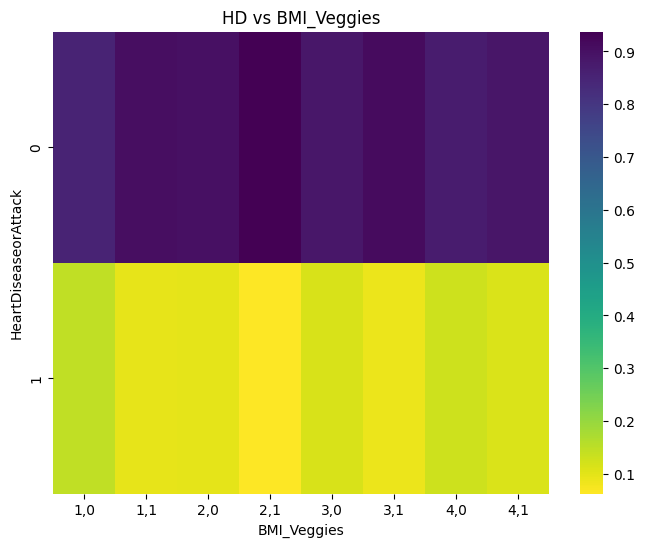

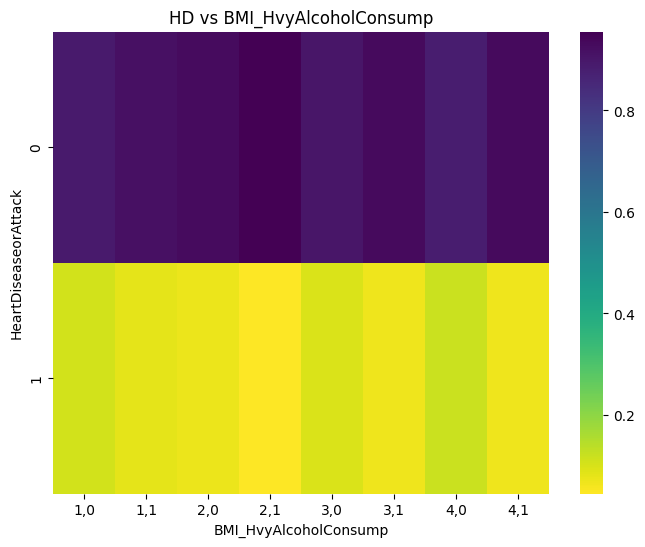

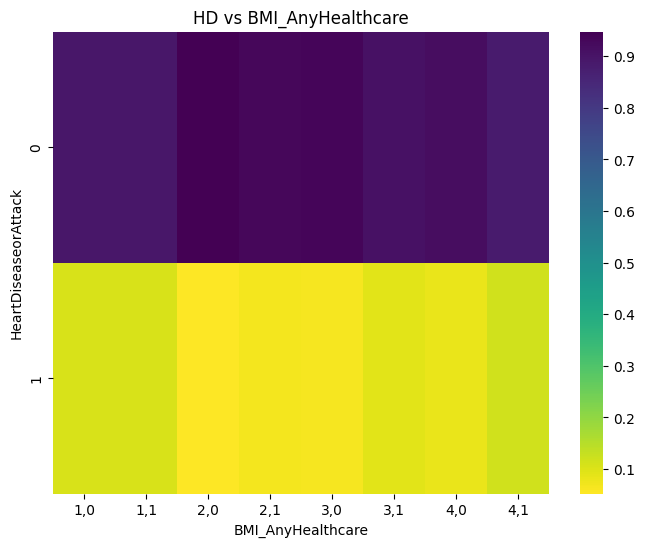

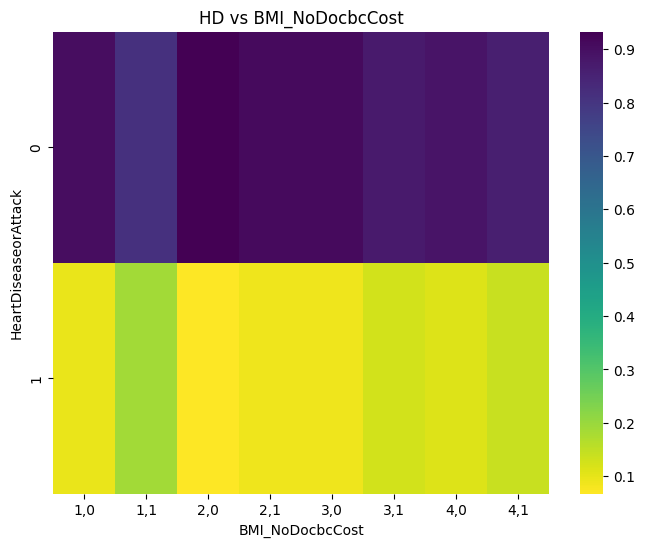

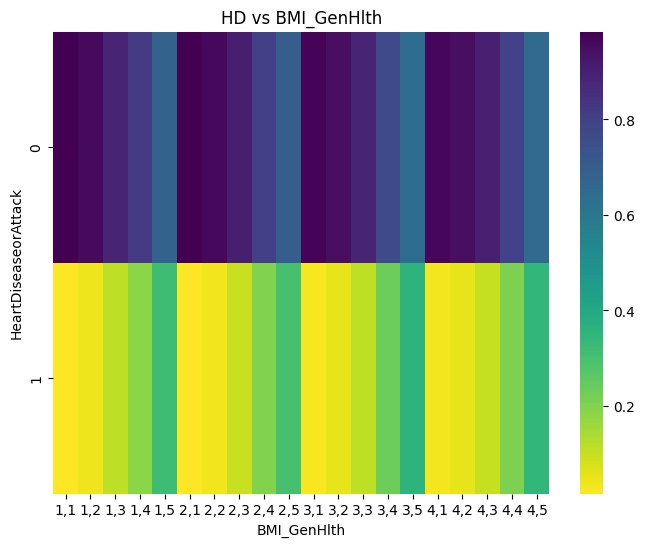

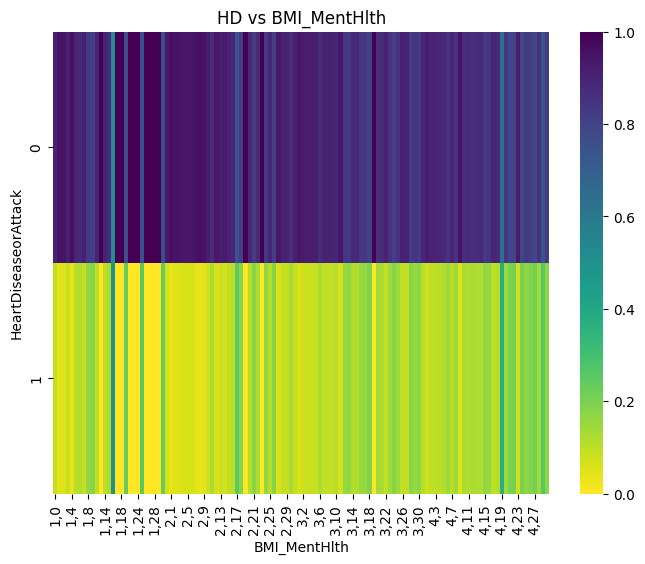

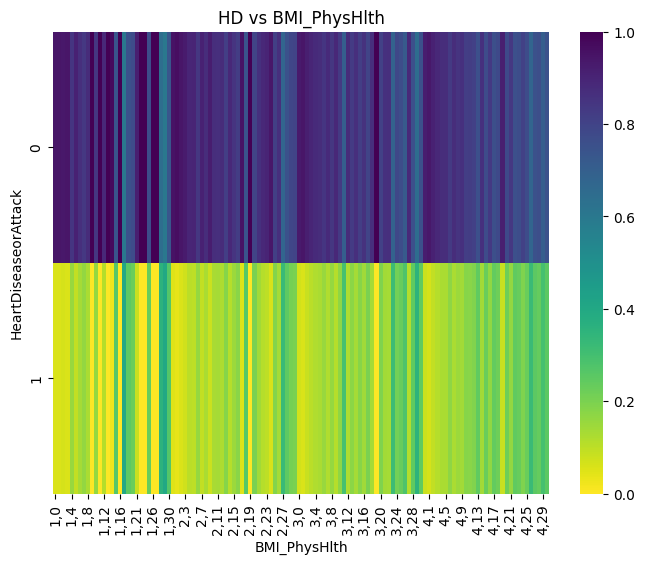

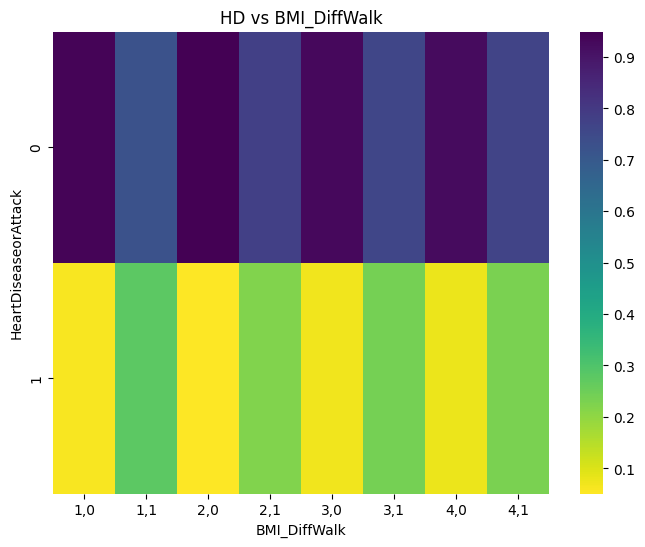

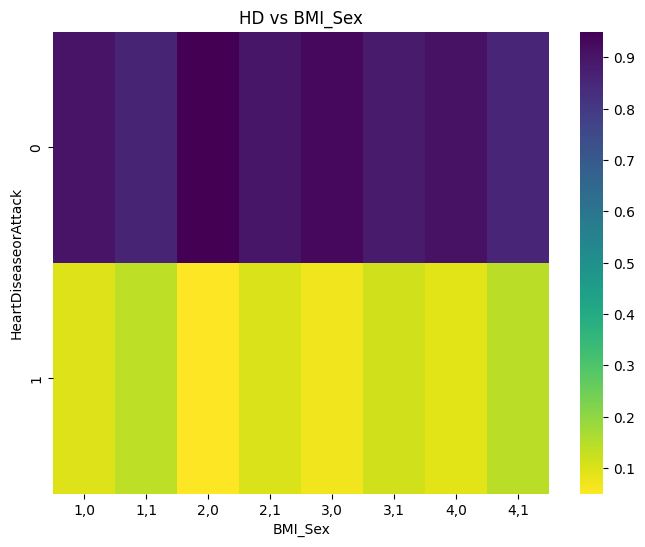

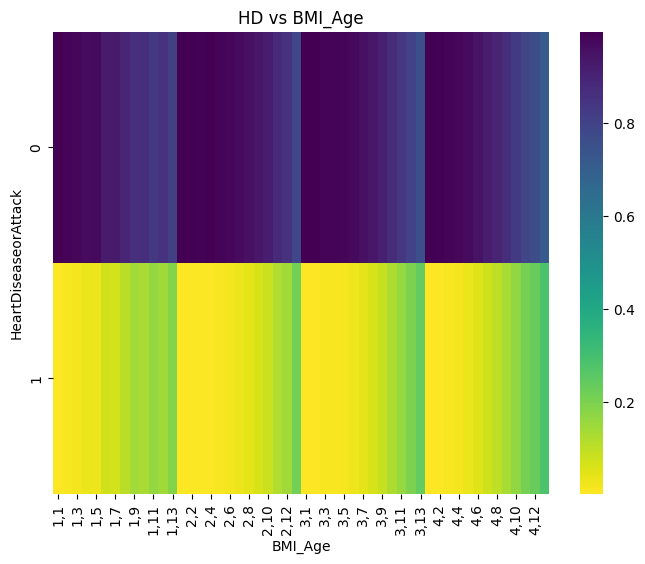

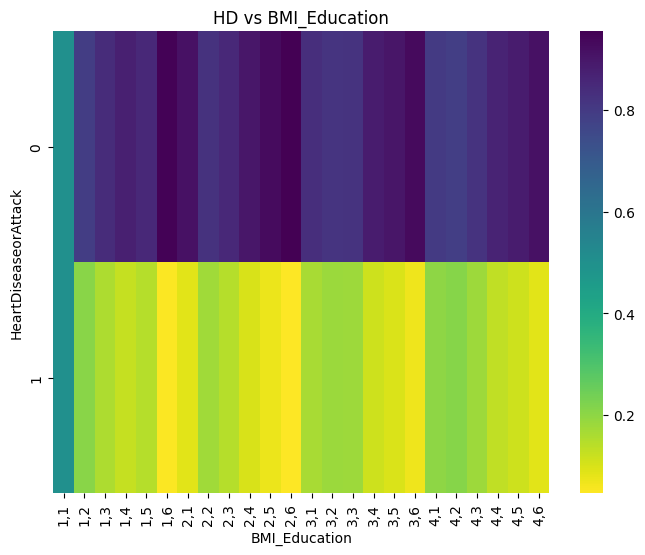

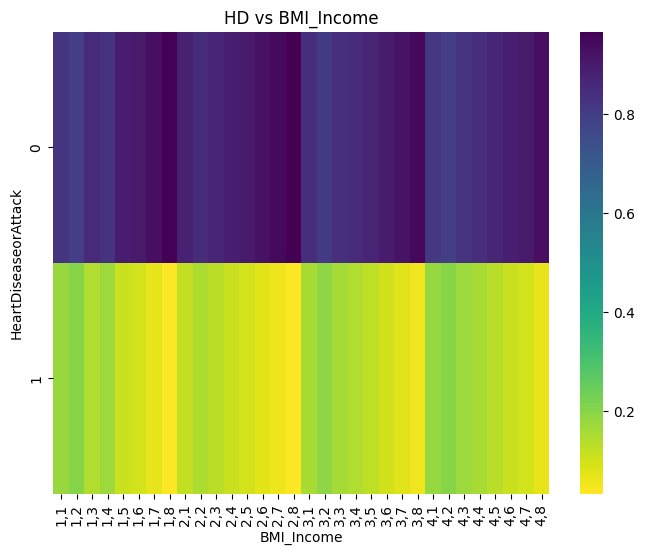

In [14]:
# Loop through each column in BMI and create heatmap
for col in df_bmi.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df_bmi[col], df['HeartDiseaseorAttack'], normalize='index')
    
    indname = contingency_table.index.astype(str)
    
    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))
    
    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]
    
    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T

    #sorted_table.T
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD vs " + col)
    plt.show()

In [9]:
#Extract Menthlth groups
df_men = n_df.filter(regex='MentHlth')
df_men.head()

HighBP_MentHlth HighChol_MentHlth CholCheck_MentHlth BMI_MentHlth  \
0             1,3               1,3                1,3          4,3   
1             0,0               0,0                0,0          3,0   
2             1,4               1,4                1,4          3,4   
3             1,0               0,0                1,0          3,0   
4             1,1               1,1                1,1          2,1   

  Smoker_MentHlth Stroke_MentHlth Diabetes_MentHlth PhysActivity_MentHlth  \
0             1,3             0,3               0,3                   0,3   
1             1,0             0,0               0,0                   1,0   
2             0,4             0,4               0,4                   0,4   
3             0,0             0,0               0,0                   1,0   
4             0,1             0,1               0,1                   1,1   

  Fruits_MentHlth Veggies_MentHlth HvyAlcoholConsump_MentHlth  \
0             0,3              1,3                        0,3   
1             0,0              0,0                        0,0   
2             1,4              0,4                        0,4   
3             1,0              1,0                        0,0   
4             1,1              1,1                        0,1   

  AnyHealthcare_MentHlth NoDocbcCost_MentHlth GenHlth_MentHlth  \
0                    1,3                  0,3              5,3   
1                    0,0                  1,0              3,0   
2                    1,4                  1,4              5,4   
3                    1,0                  0,0              2,0   
4                    1,1                  0,1              2,1   

  MentHlth_PhysHlth MentHlth_DiffWalk MentHlth_Sex MentHlth_Age  \
0               3,3               3,1          3,0          3,9   
1               0,0               0,0          0,0          0,7   
2               4,4               4,1          4,0          4,9   
3               0,0               0,0          0,0         0,11   
4               1,0               1,0          1,0         1,11   

  MentHlth_Education MentHlth_Income  
0                3,4             3,3  
1                0,6             0,1  
2                4,4             4,8  
3                0,3             0,6  
4                1,5             1,4

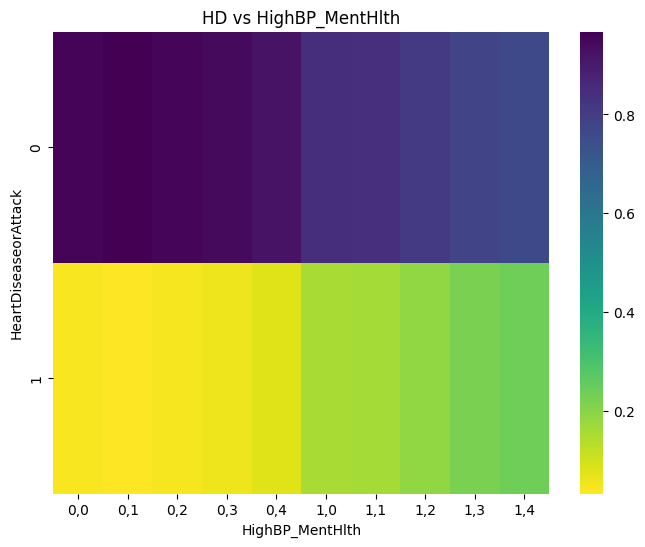

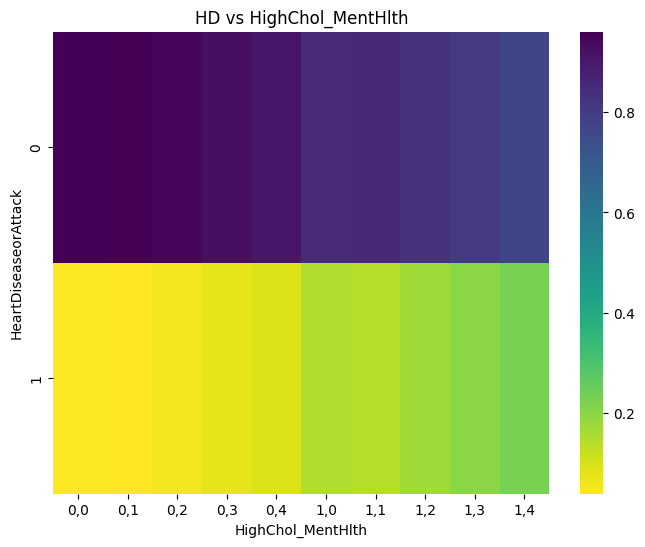

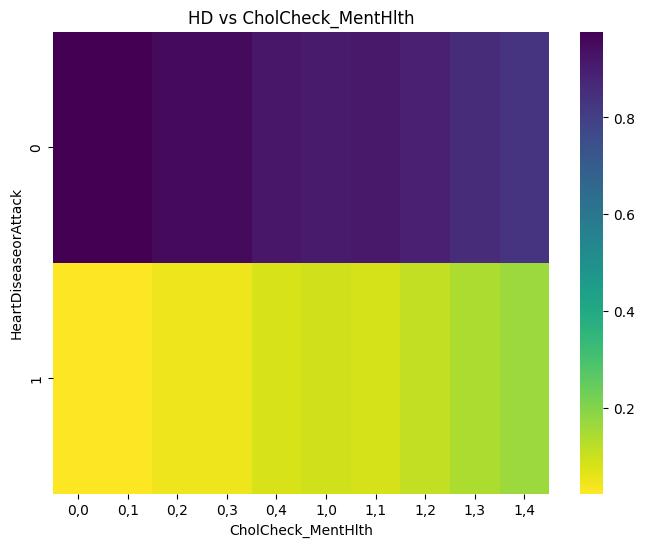

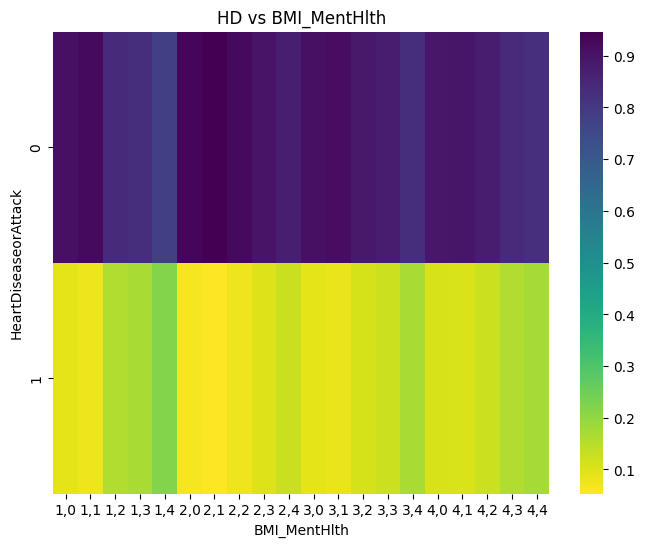

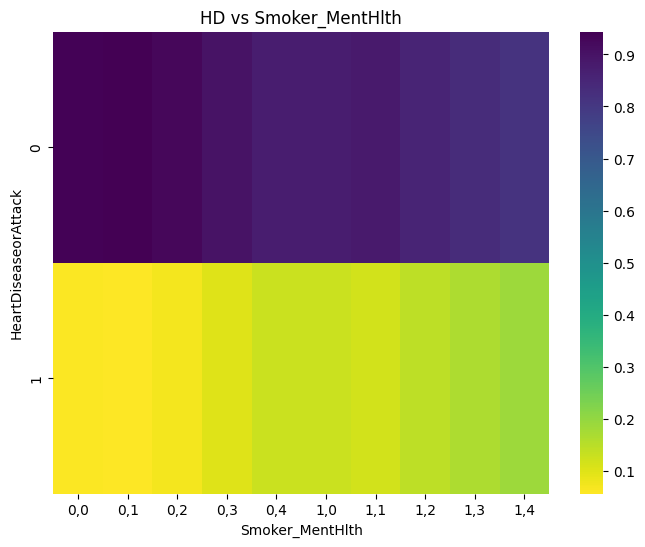

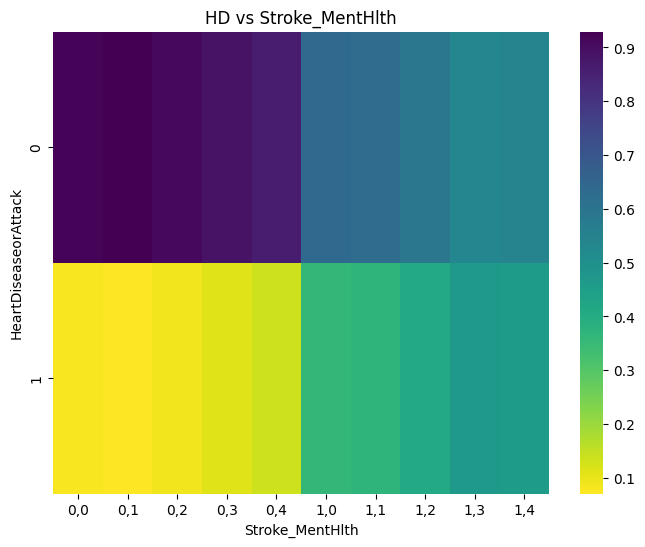

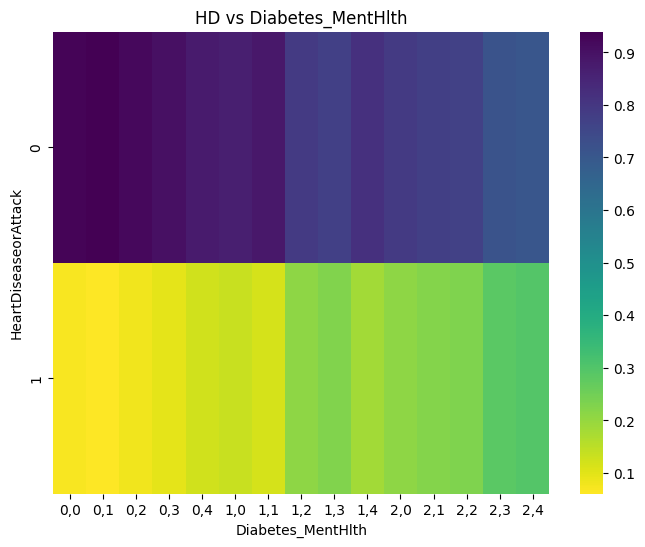

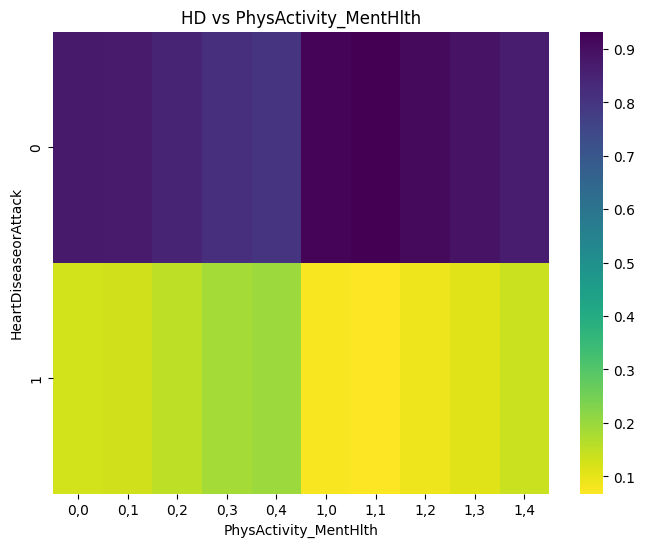

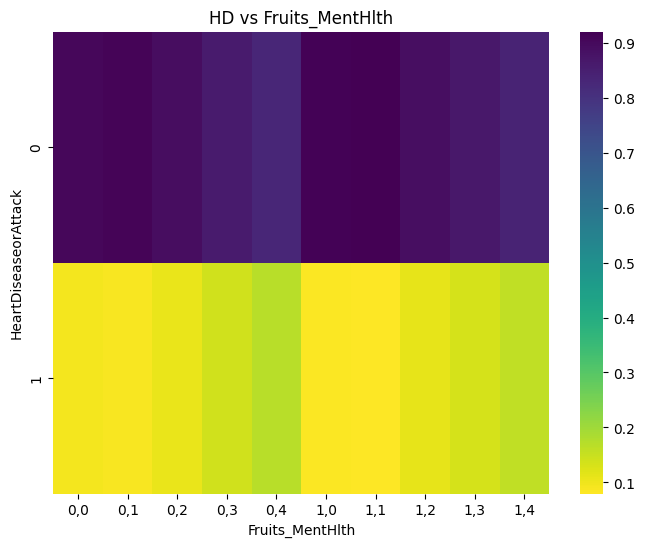

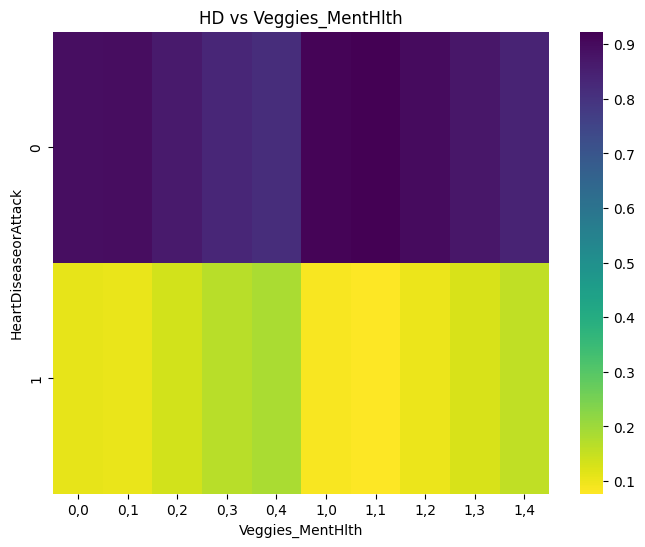

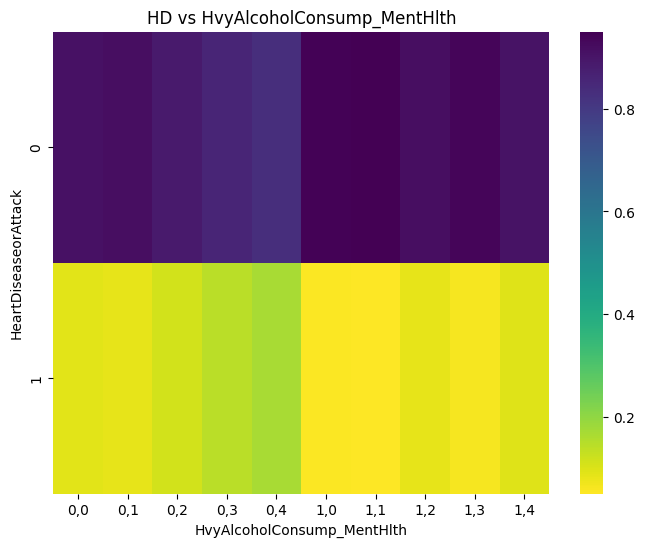

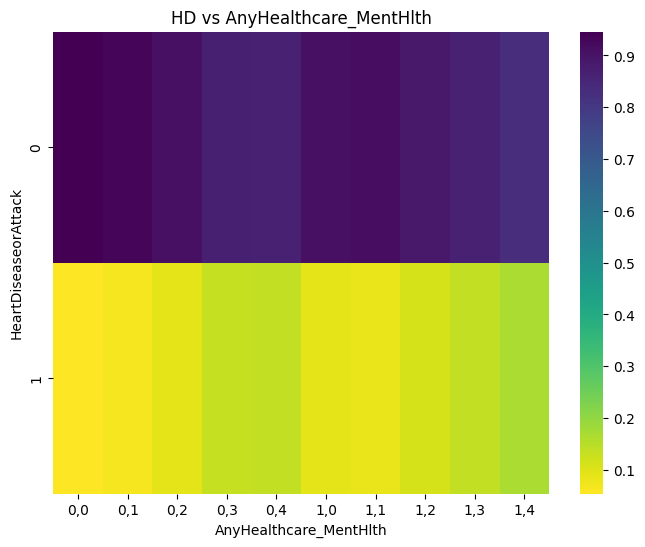

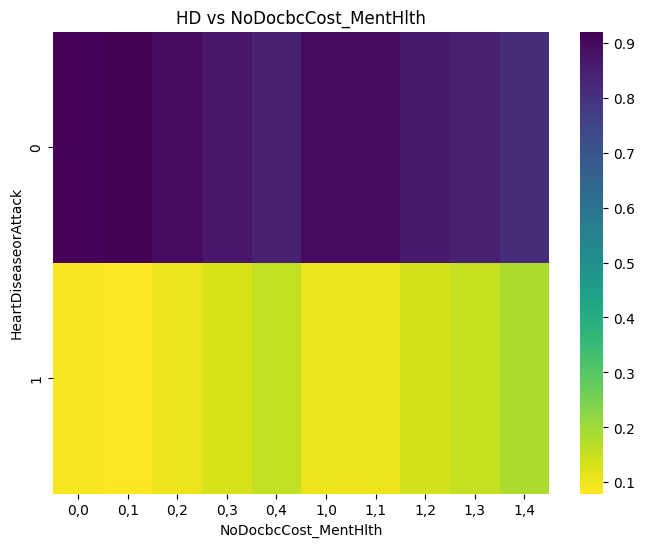

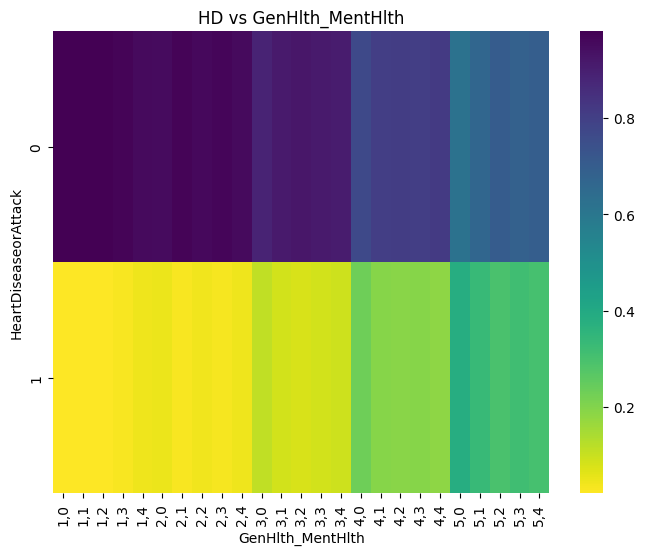

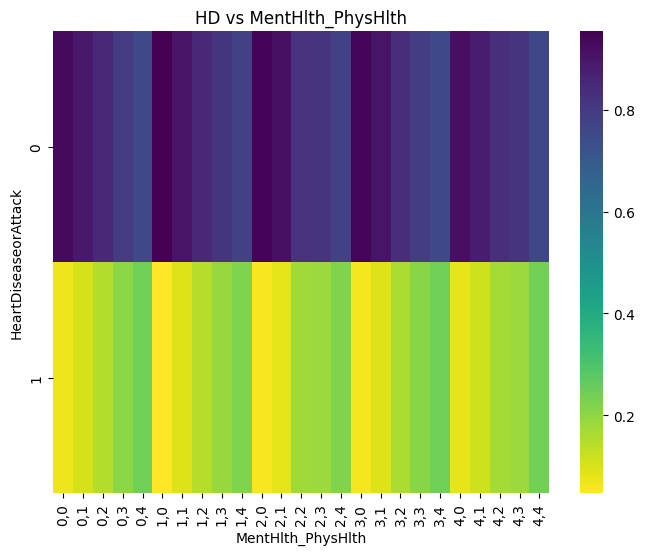

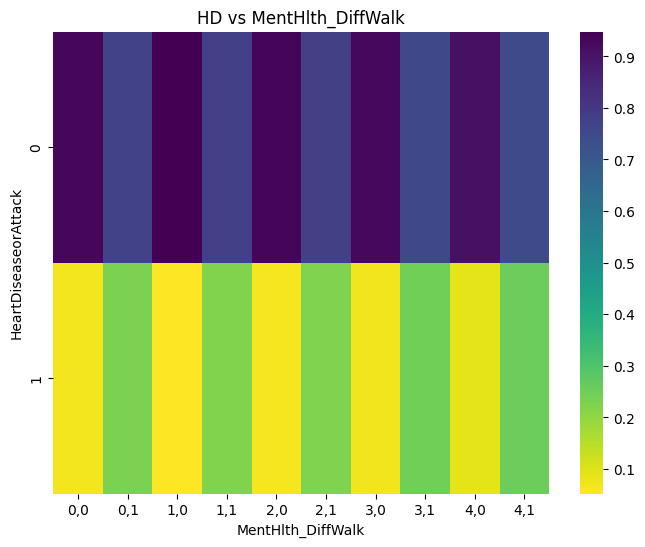

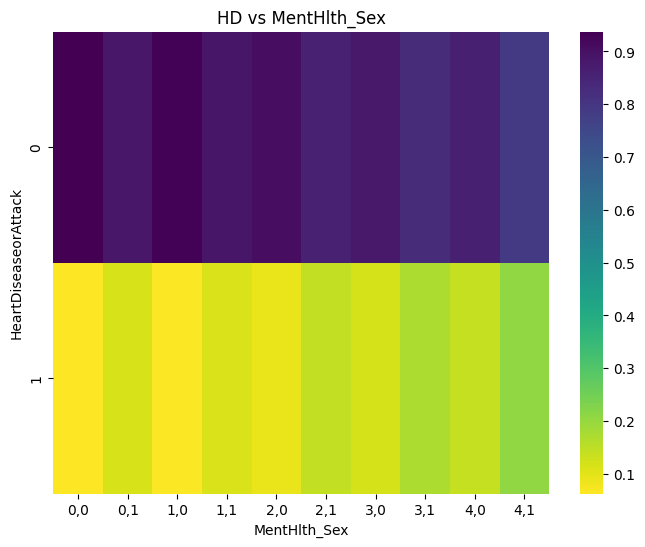

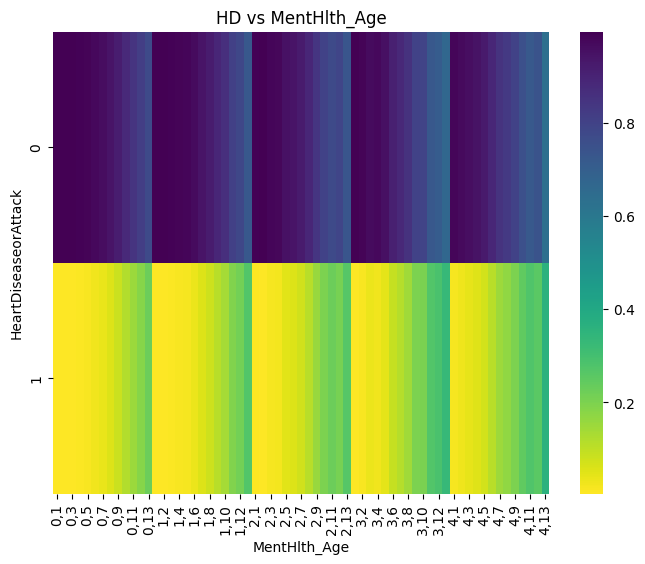

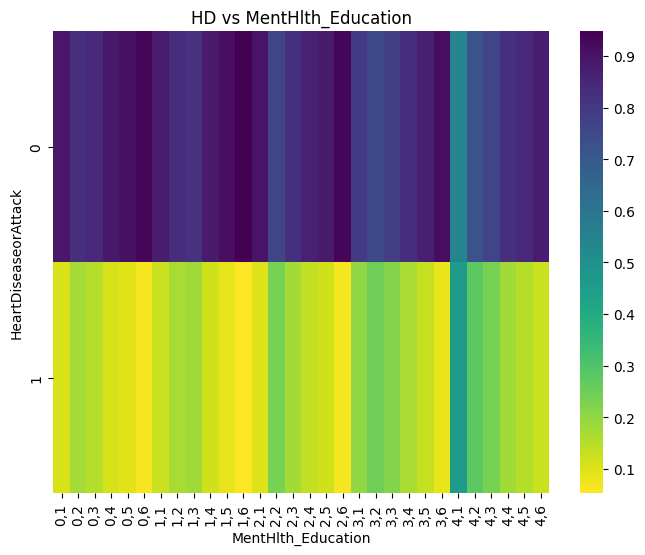

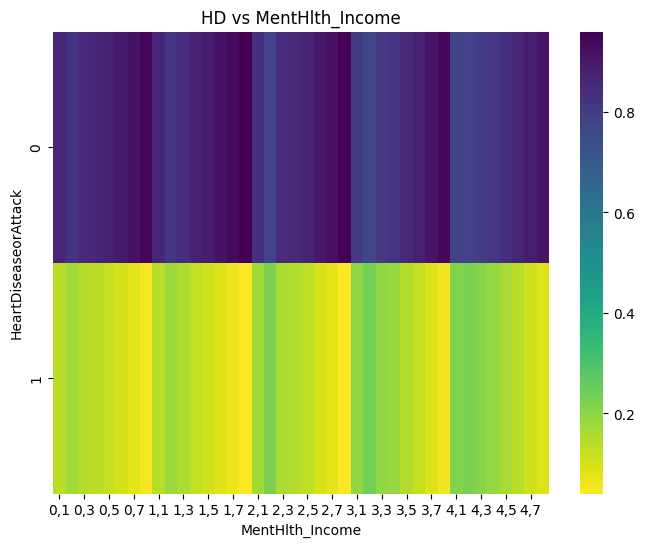

In [10]:
# Loop through each column in menthlth and create heatmap
for col in df_men.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df_men[col], df['HeartDiseaseorAttack'], normalize='index')
    
    indname = contingency_table.index.astype(str)
    
    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))
    
    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]
    
    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T

    #sorted_table.T
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD vs " + col)
    plt.show()

In [11]:
#Extract PhysHlth groups
df_phy = n_df.filter(regex='PhysHlth')
df_phy.head()

HighBP_PhysHlth HighChol_PhysHlth CholCheck_PhysHlth BMI_PhysHlth  \
0             1,3               1,3                1,3          4,3   
1             0,0               0,0                0,0          3,0   
2             1,4               1,4                1,4          3,4   
3             1,0               0,0                1,0          3,0   
4             1,0               1,0                1,0          2,0   

  Smoker_PhysHlth Stroke_PhysHlth Diabetes_PhysHlth PhysActivity_PhysHlth  \
0             1,3             0,3               0,3                   0,3   
1             1,0             0,0               0,0                   1,0   
2             0,4             0,4               0,4                   0,4   
3             0,0             0,0               0,0                   1,0   
4             0,0             0,0               0,0                   1,0   

  Fruits_PhysHlth Veggies_PhysHlth HvyAlcoholConsump_PhysHlth  \
0             0,3              1,3                        0,3   
1             0,0              0,0                        0,0   
2             1,4              0,4                        0,4   
3             1,0              1,0                        0,0   
4             1,0              1,0                        0,0   

  AnyHealthcare_PhysHlth NoDocbcCost_PhysHlth GenHlth_PhysHlth  \
0                    1,3                  0,3              5,3   
1                    0,0                  1,0              3,0   
2                    1,4                  1,4              5,4   
3                    1,0                  0,0              2,0   
4                    1,0                  0,0              2,0   

  MentHlth_PhysHlth PhysHlth_DiffWalk PhysHlth_Sex PhysHlth_Age  \
0               3,3               3,1          3,0          3,9   
1               0,0               0,0          0,0          0,7   
2               4,4               4,1          4,0          4,9   
3               0,0               0,0          0,0         0,11   
4               1,0               0,0          0,0         0,11   

  PhysHlth_Education PhysHlth_Income  
0                3,4             3,3  
1                0,6             0,1  
2                4,4             4,8  
3                0,3             0,6  
4                0,5             0,4

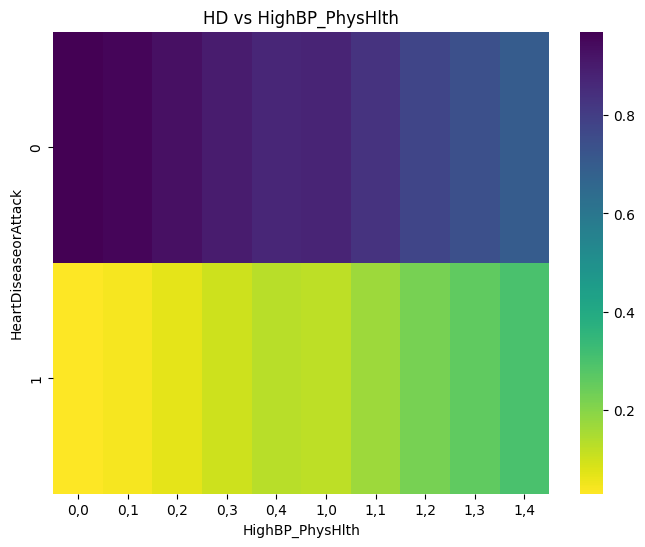

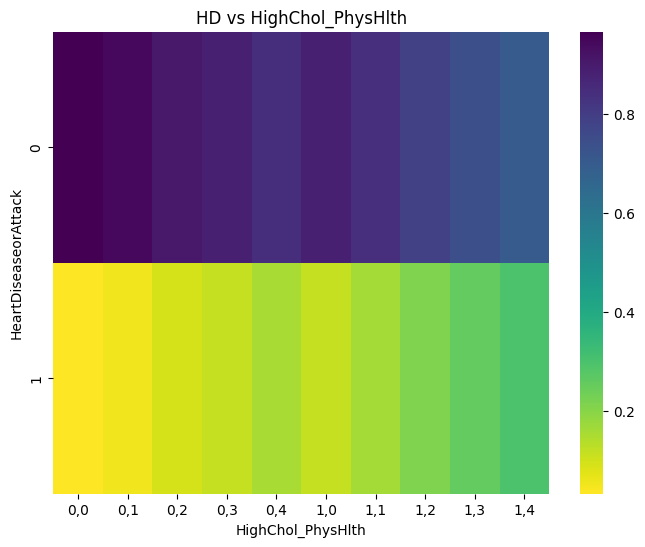

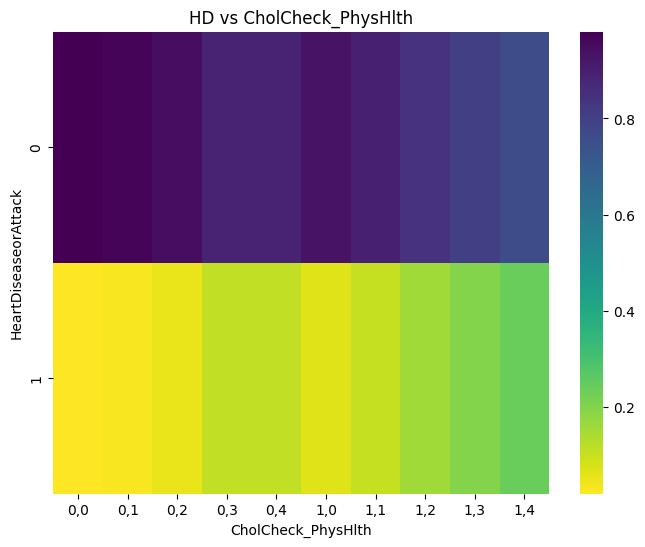

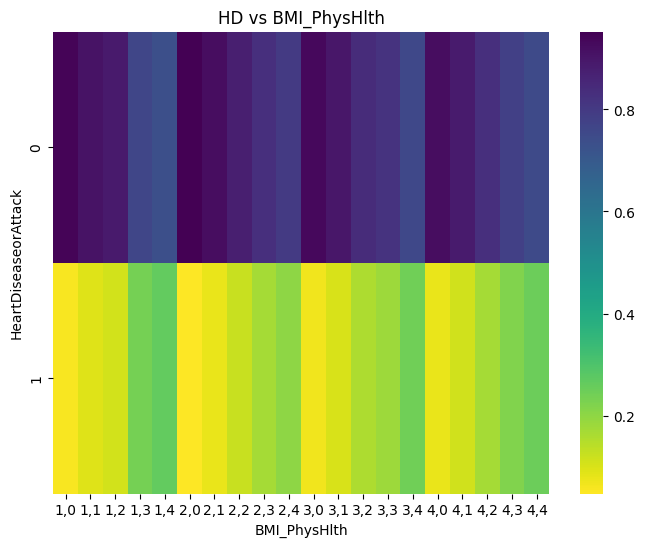

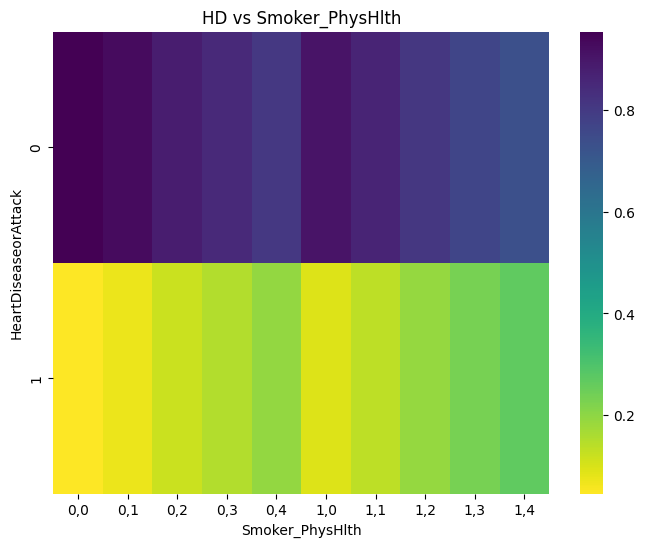

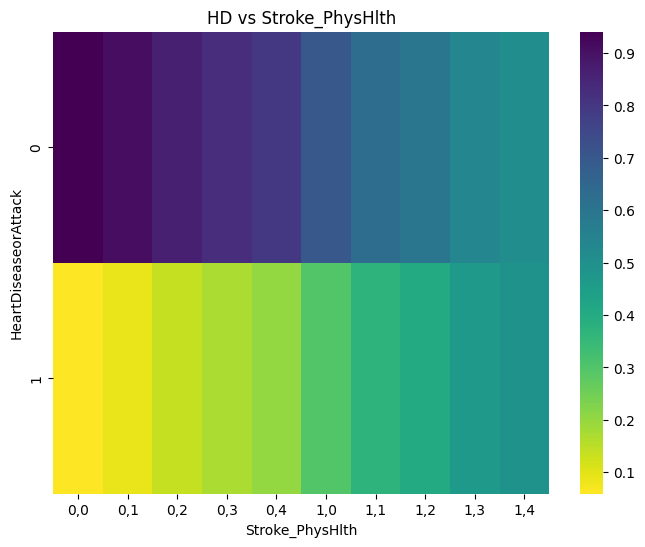

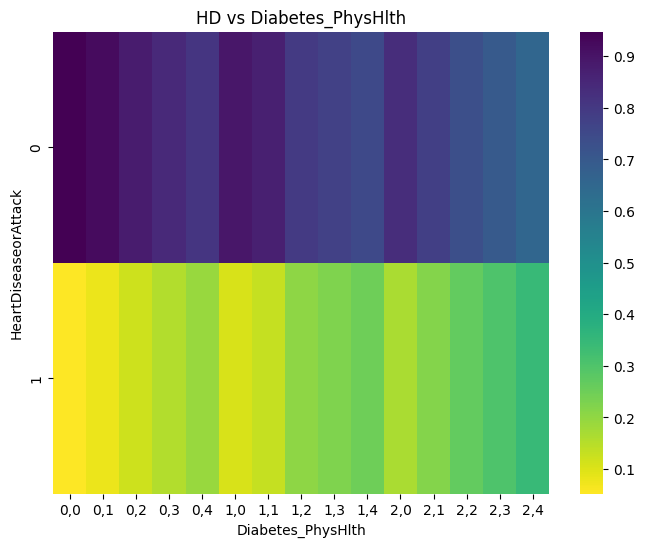

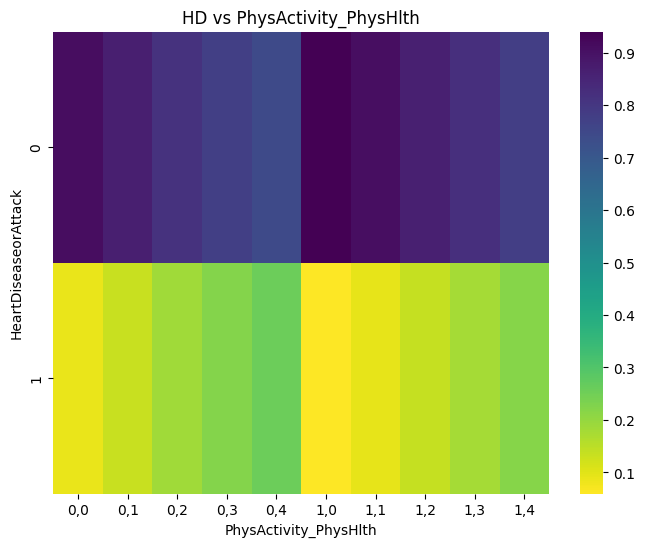

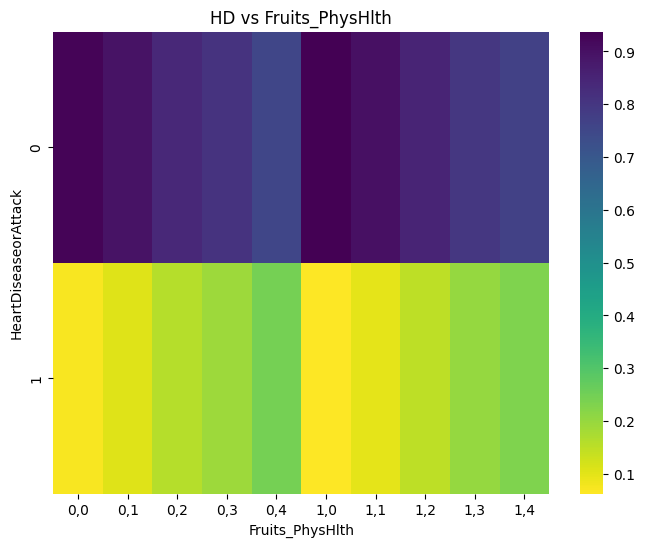

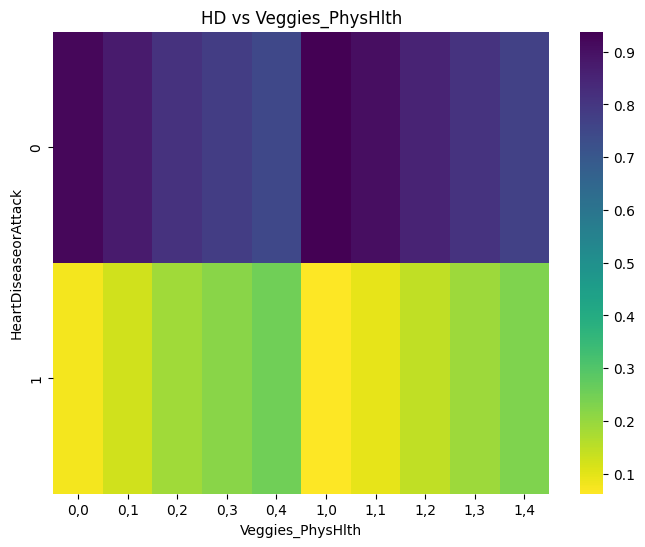

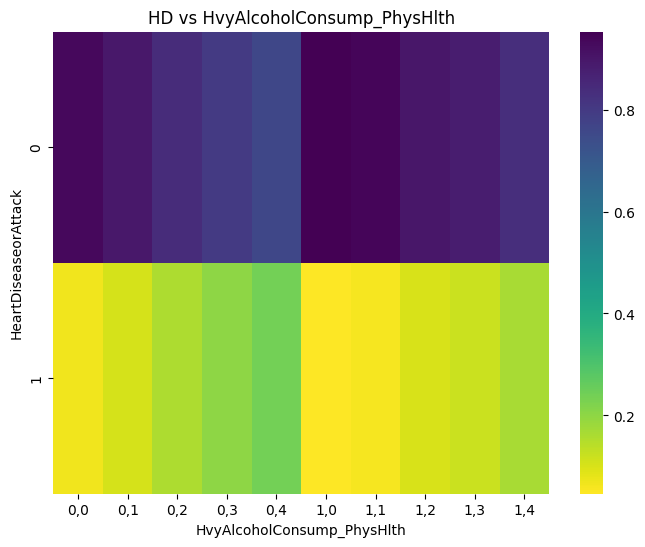

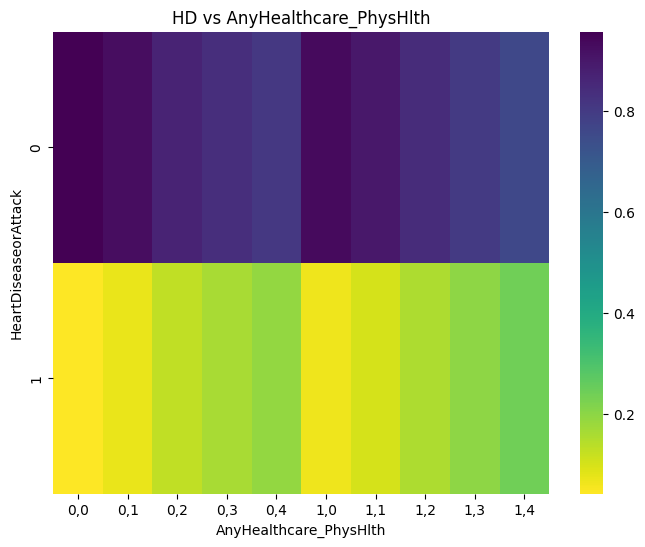

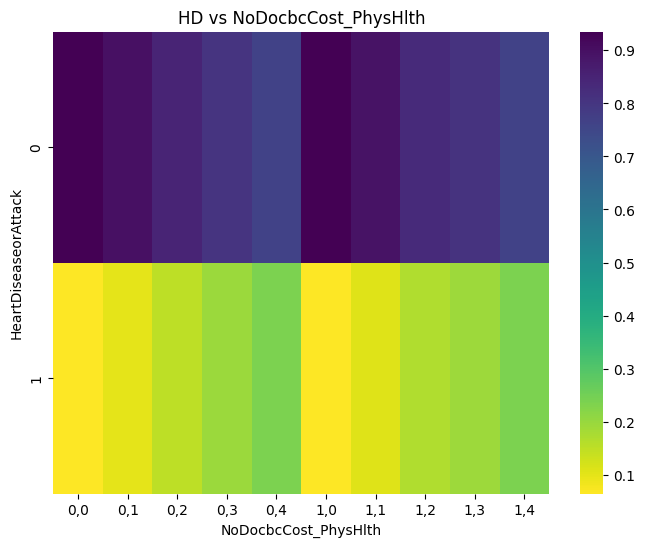

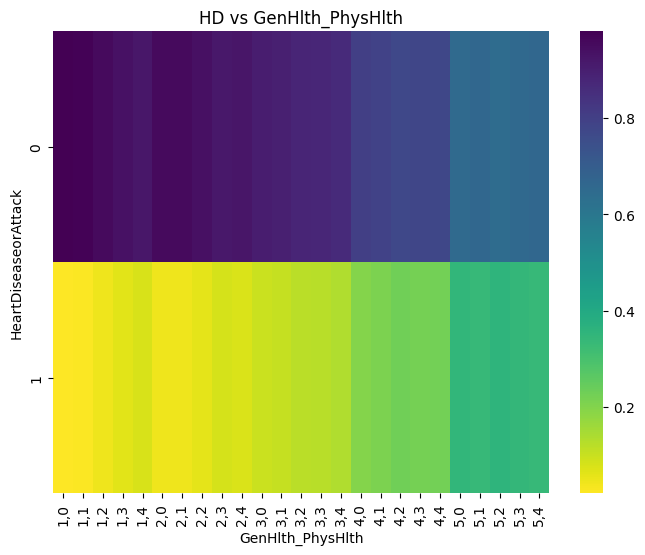

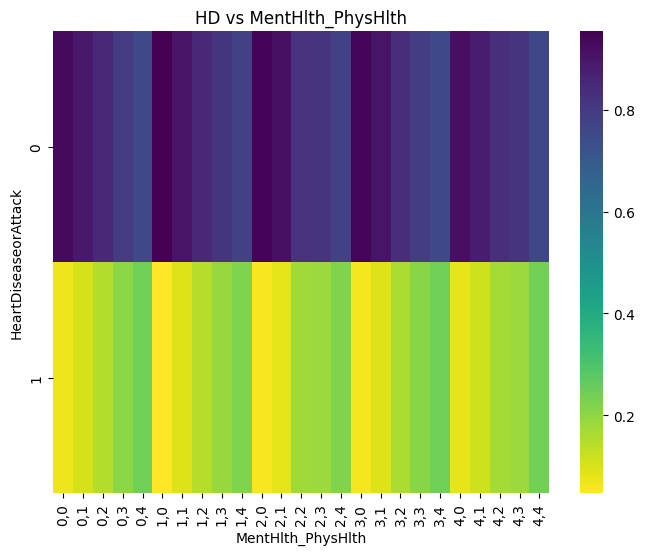

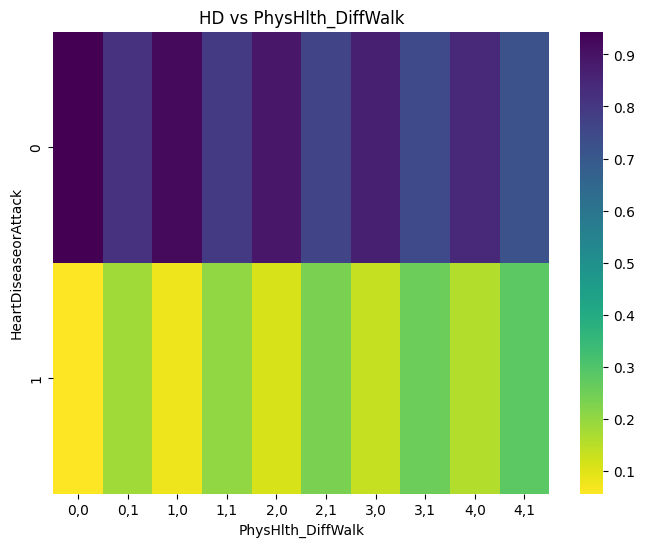

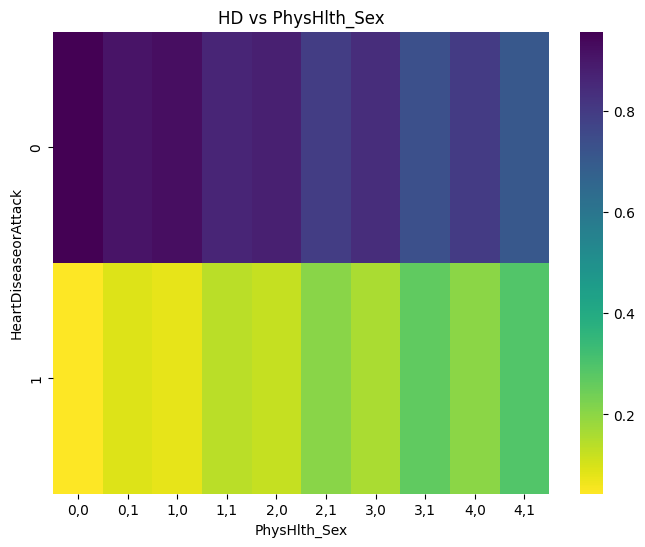

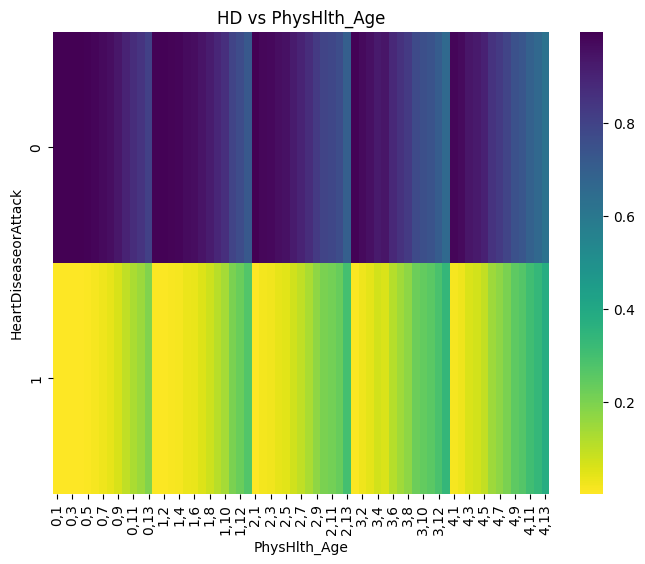

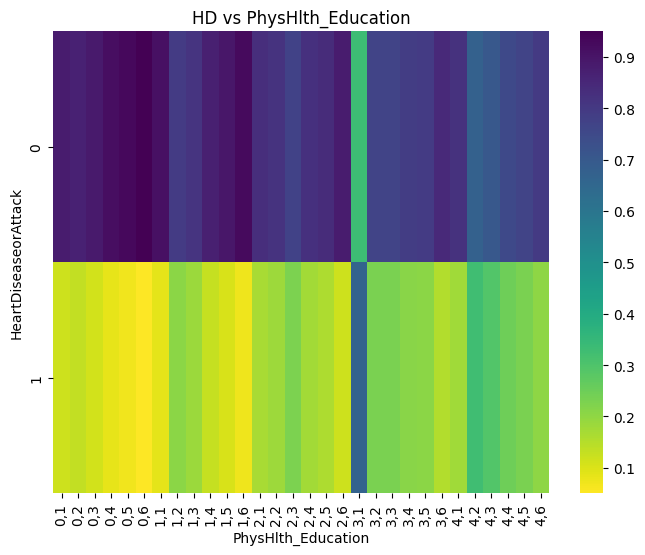

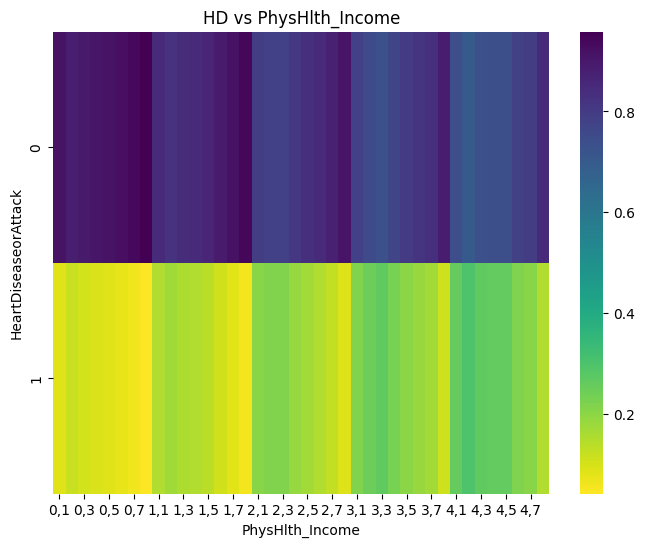

In [12]:
# Loop through each column in phyhlth and create heatmap
for col in df_phy.columns:
    
    # Create contingency table
    contingency_table = pd.crosstab(df_phy[col], df['HeartDiseaseorAttack'], normalize='index')
    
    indname = contingency_table.index.astype(str)
    
    lists = [list(map(int, s.split(","))) for s in indname]

    # Sort the list of lists by the first element and then the second element
    sorted_lists = sorted(lists, key=lambda x: (x[0], x[1]))
    
    # Convert the sorted list of tuples back to a list of lists
    sorted_strings = [list(map(str, t)) for t in sorted_lists]

    # Join each list of strings with a comma to get the final sorted list of strings
    result = [",".join(s) for s in sorted_strings]
    
    # Sort the DataFrame by the desired order of the index
    sorted_table = contingency_table.reindex(result).T

    #sorted_table.T
    # Create heatmap using seaborn
    plt.figure(figsize = (8,6))
    sns.heatmap(sorted_table, cmap='viridis_r')
    plt.title("HD vs " + col)
    plt.show()